# **FLIGHT PRICE PREDICTION**

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

# **DATA UNDERSTANDING**


In [3]:
import pandas as pd
import numpy as np


pd.options.mode.chained_assignment = None  # default='warn'

import warnings
warnings.filterwarnings('ignore')

In [4]:
pathData = 'https://raw.githubusercontent.com/mrazakqq/data-science-learning/main/dataset/flight-price-prediction/Clean_Dataset.csv'
data = pd.read_csv(pathData)

In [5]:
dtype = data.dtypes
missingValue = data.isnull().sum()
memoryUsage = data.memory_usage(deep=True)
columns={
    0:'missing_value',
    1:'memory_usage_bytes',
    2:'dtype'}

print(f'Dataset dimensions\t: {data.shape}')
print(f'Rows duplicated\t\t: {data.duplicated().sum()}')

infoData = pd.concat([missingValue, memoryUsage, dtype], axis=1)
# infoData.rename(columns=columns)
infoData.drop(index='Index').rename(columns=columns)
# memoryUsage

Dataset dimensions	: (300153, 12)
Rows duplicated		: 0


missing_value  memory_usage_bytes    dtype
Unnamed: 0                  0.0             2401224    int64
airline                     0.0            19360640   object
flight                      0.0            18953387   object
source_city                 0.0            19211944   object
departure_time              0.0            19614008   object
stops                       0.0            18151472   object
arrival_time                0.0            19237499   object
destination_city            0.0            19223563   object
class                       0.0            19303279   object
duration                    0.0             2401224  float64
days_left                   0.0             2401224    int64
price                       0.0             2401224    int64

In [6]:
data.head()

Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955

## **Numerical Features**
  - 'Unnamed: 0' tidak berpengaruh terhadap harga tiket.

In [7]:
data.describe()

Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000000      12.221021      26.004751   20889.660523
std     86646.852011       7.191997      13.561004   22697.767366
min         0.000000       0.830000       1.000000    1105.000000
25%     75038.000000       6.830000      15.000000    4783.000000
50%    150076.000000      11.250000      26.000000    7425.000000
75%    225114.000000      16.170000      38.000000   42521.000000
max    300152.000000      49.830000      49.000000  123071.000000

## **Categorical Features**

In [8]:
data.describe(include='object')

airline  flight source_city departure_time   stops arrival_time  \
count    300153  300153      300153         300153  300153       300153   
unique        6    1561           6              6       3            6   
top     Vistara  UK-706       Delhi        Morning     one        Night   
freq     127859    3235       61343          71146  250863        91538   

       destination_city    class  
count            300153   300153  
unique                6        2  
top              Mumbai  Economy  
freq              59097   206666

### **airline**

In [9]:
airline = (pd.DataFrame([data.airline.value_counts(), 
              (round(data.airline.value_counts()*100/len(data.airline), 1))], 
              index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'airline'})
airline

airline     count  percentage
0    Vistara  127859.0        42.6
1  Air_India   80892.0        27.0
2     Indigo   43120.0        14.4
3   GO_FIRST   23173.0         7.7
4    AirAsia   16098.0         5.4
5   SpiceJet    9011.0         3.0

### **flight**

In [10]:
flight = (pd.DataFrame([data.flight.value_counts(), 
              (round(data.flight.value_counts()*100/len(data.flight), 1))], 
              index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'flight'})
flight

flight   count  percentage
0      UK-706  3235.0         1.1
1      UK-772  2741.0         0.9
2      UK-720  2650.0         0.9
3      UK-836  2542.0         0.8
4      UK-822  2468.0         0.8
...       ...     ...         ...
1556  SG-9923     1.0         0.0
1557  6E-6474     1.0         0.0
1558   6E-865     1.0         0.0
1559   G8-705     1.0         0.0
1560   G8-107     1.0         0.0

[1561 rows x 3 columns]

### **source_city**

In [11]:
sourceCity = (pd.DataFrame([data.source_city.value_counts(),(round(data.source_city.value_counts()*100/len(data.source_city), 1))], 
                index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'source_city'})
sourceCity

source_city    count  percentage
0       Delhi  61343.0        20.4
1      Mumbai  60896.0        20.3
2   Bangalore  52061.0        17.3
3     Kolkata  46347.0        15.4
4   Hyderabad  40806.0        13.6
5     Chennai  38700.0        12.9

### **destination_city**

In [12]:
destinationCity = (pd.DataFrame([data.destination_city.value_counts(), (round(data.destination_city.value_counts()*100/len(data.destination_city), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'destination_city'})
destinationCity

destination_city    count  percentage
0           Mumbai  59097.0        19.7
1            Delhi  57360.0        19.1
2        Bangalore  51068.0        17.0
3          Kolkata  49534.0        16.5
4        Hyderabad  42726.0        14.2
5          Chennai  40368.0        13.4

### **departure_time**

---



In [13]:
departureTime = (pd.DataFrame([data.departure_time.value_counts(), 
              (round(data.departure_time.value_counts()*100/len(data.departure_time), 1))], 
              index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'departure_time'})
departureTime

departure_time    count  percentage
0        Morning  71146.0        23.7
1  Early_Morning  66790.0        22.3
2        Evening  65102.0        21.7
3          Night  48015.0        16.0
4      Afternoon  47794.0        15.9
5     Late_Night   1306.0         0.4

### **arrival_time**

In [14]:
arrivalTime = (pd.DataFrame([data.arrival_time.value_counts(), 
              (round(data.arrival_time.value_counts()*100/len(data.arrival_time), 1))], 
              index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'arrival_time'})
arrivalTime

arrival_time    count  percentage
0          Night  91538.0        30.5
1        Evening  78323.0        26.1
2        Morning  62735.0        20.9
3      Afternoon  38139.0        12.7
4  Early_Morning  15417.0         5.1
5     Late_Night  14001.0         4.7

### **stops**

In [15]:
stops = (pd.DataFrame([data.stops.value_counts(), 
              (round(data.stops.value_counts()*100/len(data.stops), 1))], 
              index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'stops'})
stops

stops     count  percentage
0          one  250863.0        83.6
1         zero   36004.0        12.0
2  two_or_more   13286.0         4.4

### **class**

In [16]:
class_ = (pd.DataFrame([data['class'].value_counts(), 
              (round(data['class'].value_counts()*100/len(data['class']), 1))], 
              index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'class'})
class_

class     count  percentage
0   Economy  206666.0        68.9
1  Business   93487.0        31.1

# **EXPLORATORY DATA ANALYSIS**


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={
          'figure.figsize': (18, 8)
        })
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

## **Correlation**
  - 'Unnamed: 0' (unique) didrop karna high correlaty.

<AxesSubplot: >

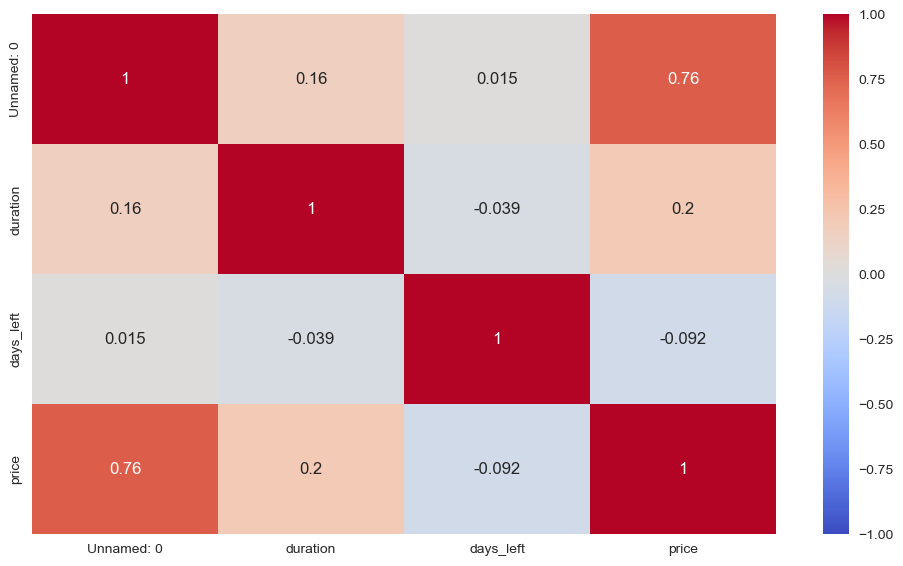

In [159]:
f, ax = plt.subplots(figsize=(12, 6.75))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True, vmin = -1, vmax =1)

### **Categorical ANOVA**
Korelasi dicari menggunakan library dython berbasis feature selection ANOVA untuk menghitung korelasi antara Categorical-Numerical Features karena sebagaian besar features merupakan categorical features.

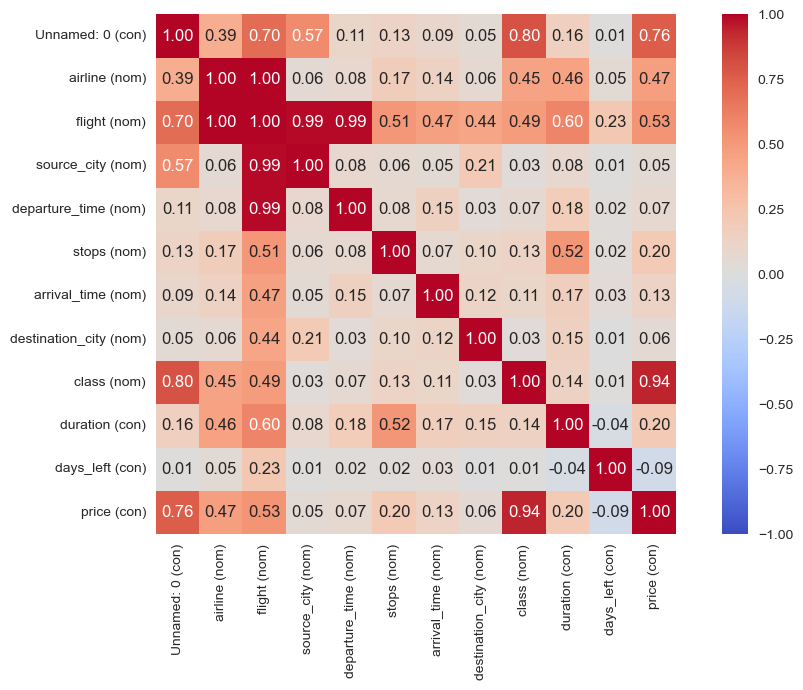

In [160]:
# !pip install dython
from dython import nominal
nominal.associations(data, figsize=(12,6.75), mark_columns=True, cmap='coolwarm');

## **Numerical Features**

### **days_left and price**

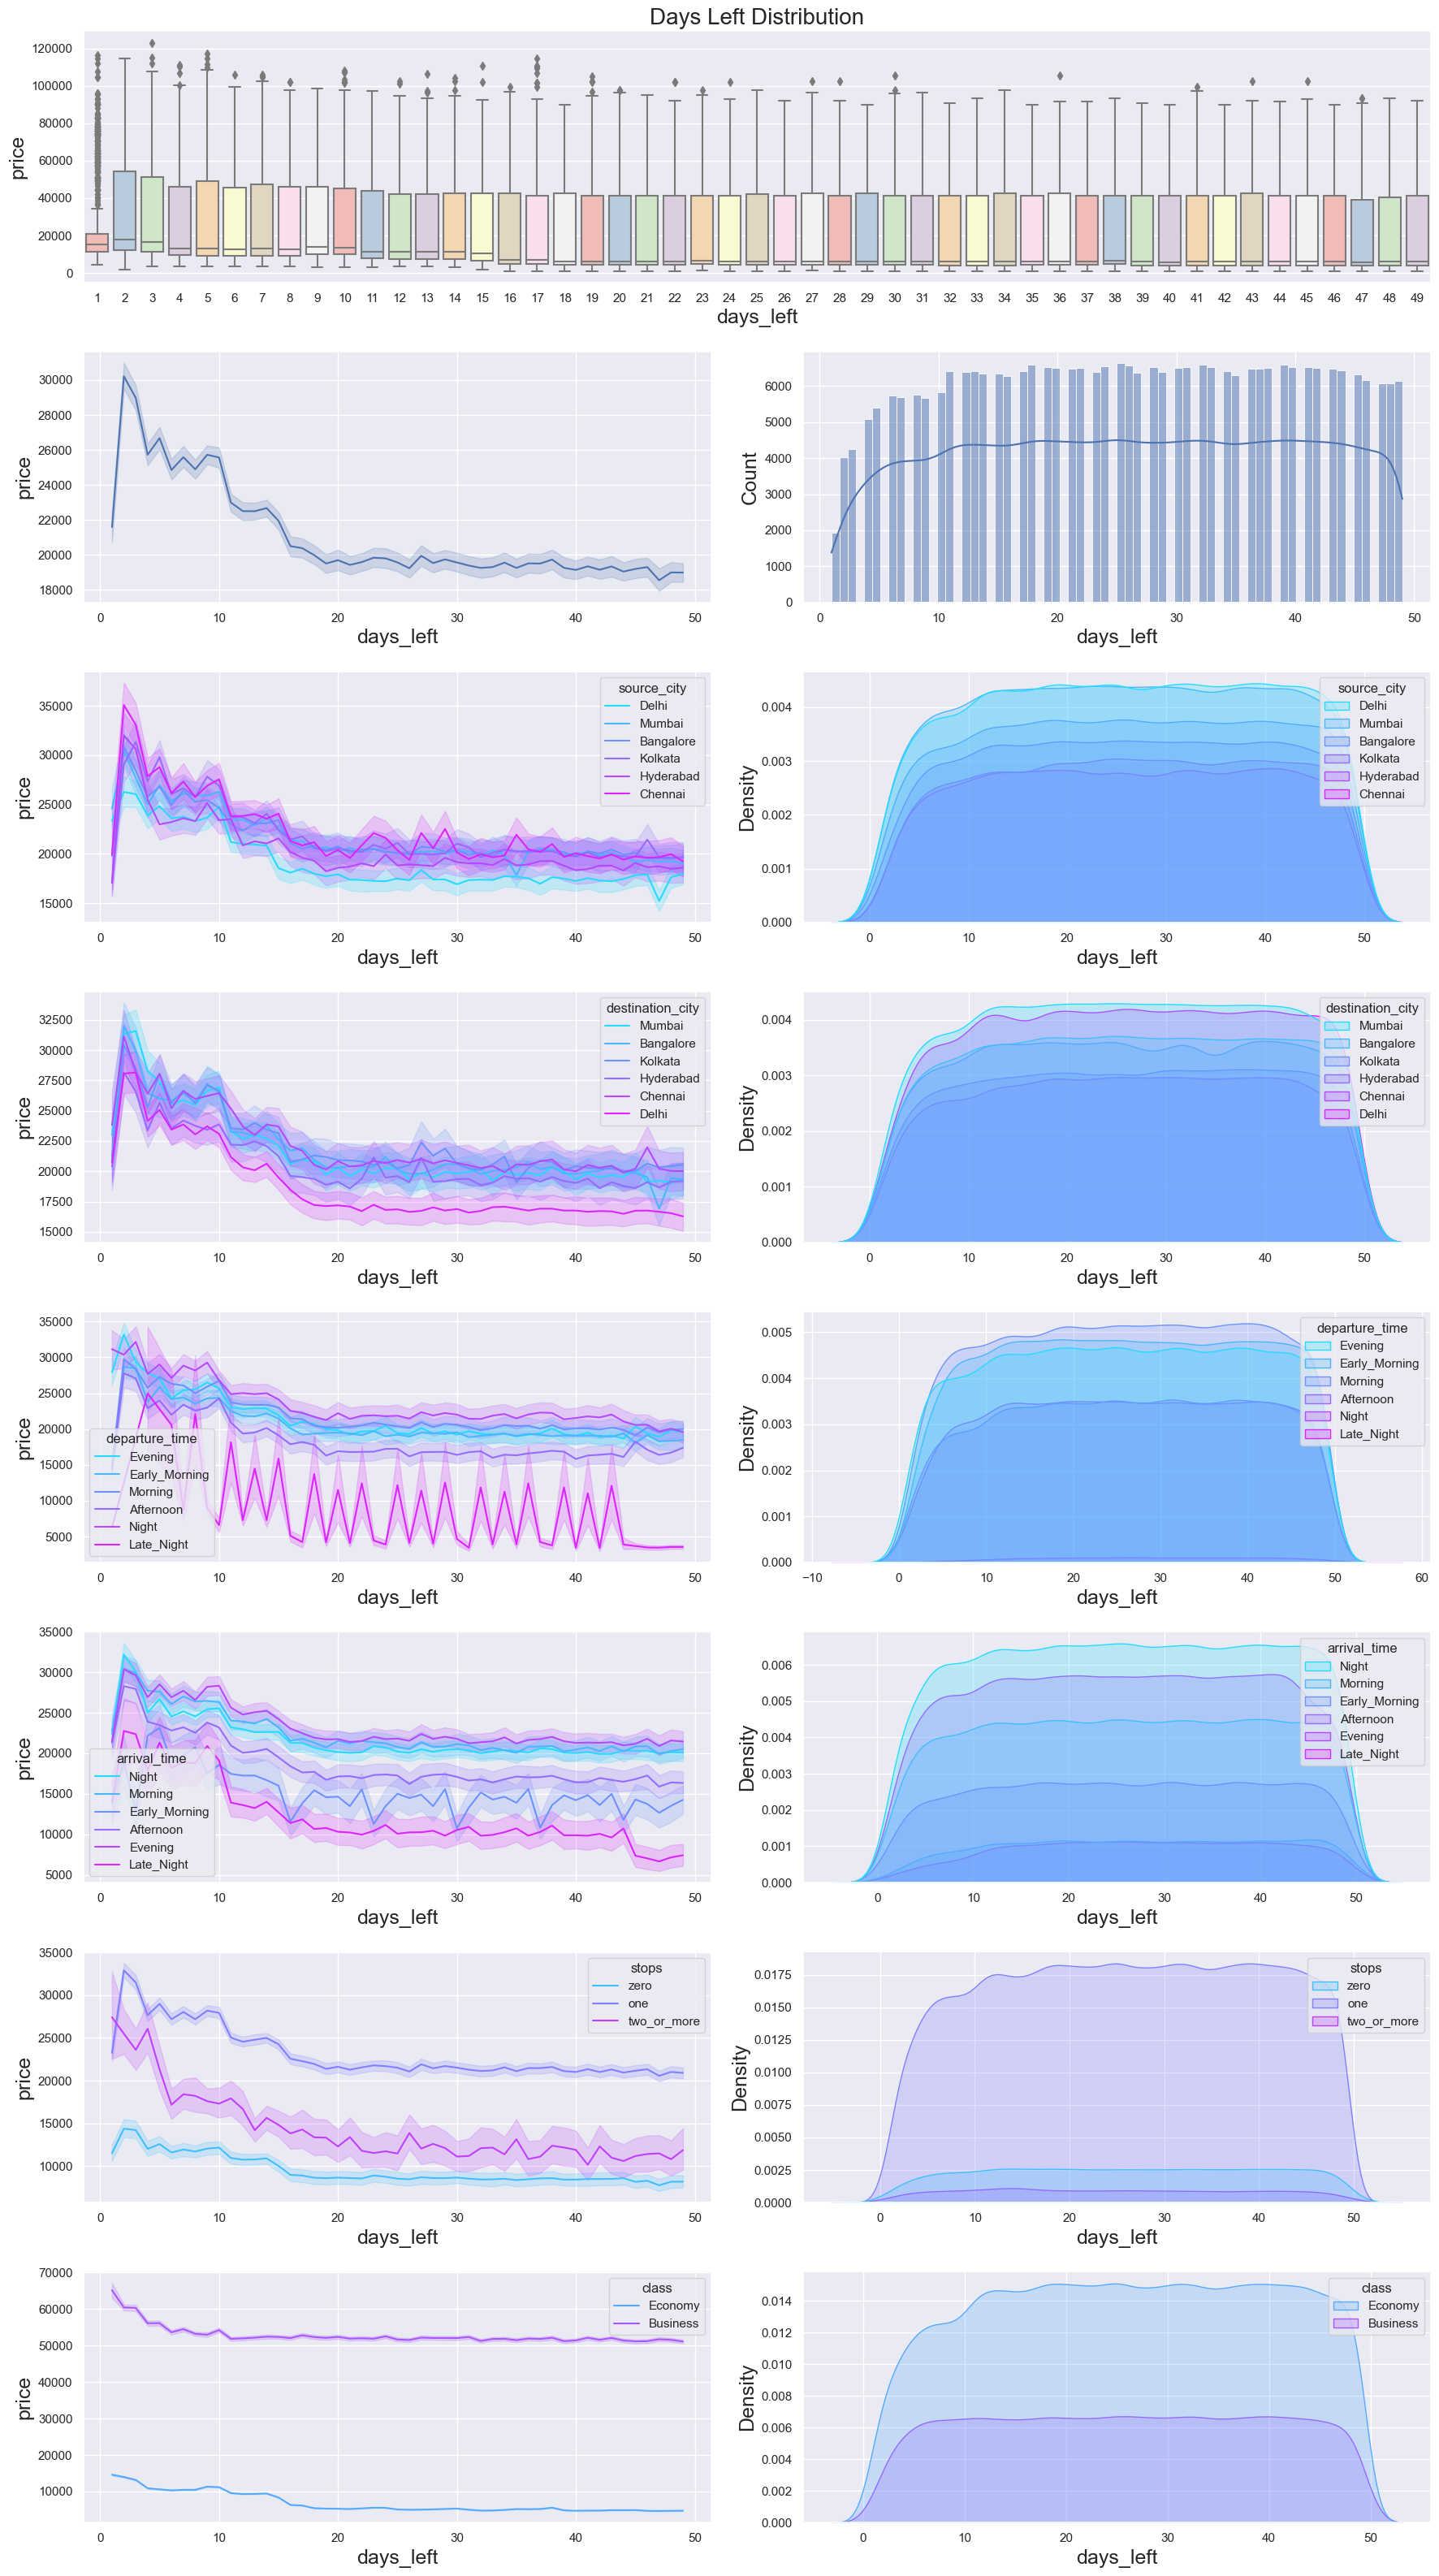

In [20]:
f, ax = plt.subplots(8, 2, figsize=(18,32))
plt.subplot2grid((8,2), (0,0), colspan=2)
plt.title('Days Left Distribution')
sns.boxplot(x='days_left', y='price', data=data, palette='Pastel1')
plt.subplot2grid((8,2), (1,0))
sns.lineplot(x='days_left', y='price', data=data, palette='cool', estimator=np.mean)
plt.subplot2grid((8,2), (1,1))
sns.histplot(x='days_left', data=data, kde=True)
plt.subplot2grid((8,2), (2,0))
sns.lineplot(x='days_left', y='price', data=data, palette='cool', estimator=np.mean, hue='source_city')
plt.subplot2grid((8,2), (2,1))
sns.kdeplot(x='days_left', data=data, palette='cool', shade=True, hue='source_city')
plt.subplot2grid((8,2), (3,0))
sns.lineplot(x='days_left', y='price', data=data, palette='cool', estimator=np.mean, hue='destination_city')
plt.subplot2grid((8,2), (3,1))
sns.kdeplot(x='days_left', data=data, palette='cool', shade=True, hue='destination_city')
plt.subplot2grid((8,2), (4,0))
sns.lineplot(x='days_left', y='price', data=data, palette='cool', estimator=np.mean, hue='departure_time')
plt.subplot2grid((8,2), (4,1))
sns.kdeplot(x='days_left', data=data, palette='cool', shade=True, hue='departure_time')
plt.subplot2grid((8,2), (5,0))
sns.lineplot(x='days_left', y='price', data=data, palette='cool', estimator=np.mean, hue='arrival_time')
plt.subplot2grid((8,2), (5,1))
sns.kdeplot(x='days_left', data=data, palette='cool', shade=True, hue='arrival_time')
plt.subplot2grid((8,2), (6,0))
sns.lineplot(x='days_left', y='price', data=data, palette='cool', estimator=np.mean, hue='stops')
plt.subplot2grid((8,2), (6,1))
sns.kdeplot(x='days_left', data=data, palette='cool', shade=True, hue='stops')
plt.subplot2grid((8,2), (7,0))
sns.lineplot(x='days_left', y='price', data=data, palette='cool', estimator=np.mean, hue='class')
plt.subplot2grid((8,2), (7,1))
sns.kdeplot(x='days_left', data=data, palette='cool', shade=True, hue='class')
plt.tight_layout()

### **duration and price**

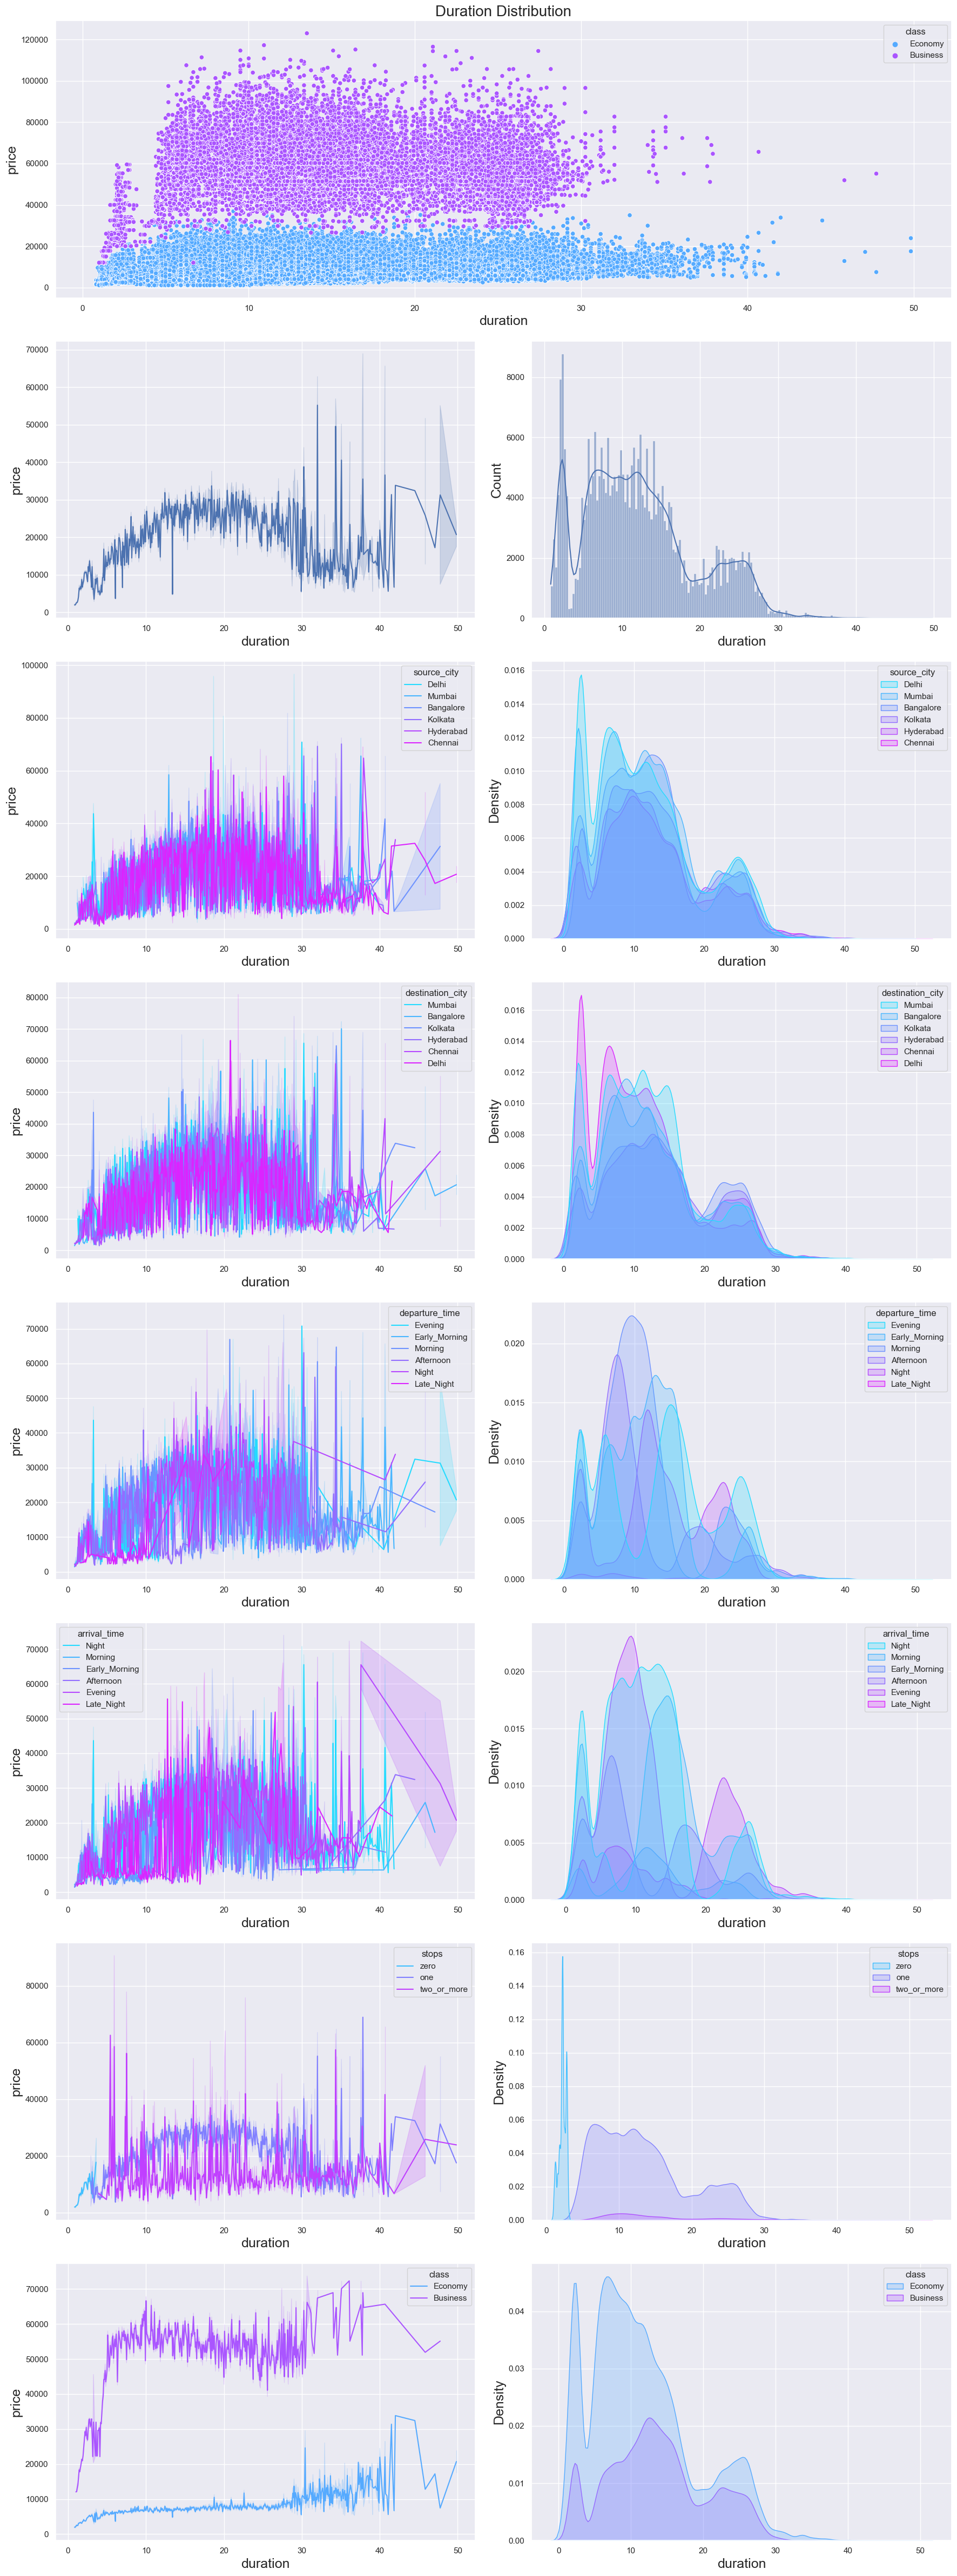

In [21]:
f, ax = plt.subplots(8, 2, figsize=(18,48))
plt.subplot2grid((8,2), (0,0), colspan=2)
plt.title('Duration Distribution')
sns.scatterplot(x='duration', y='price', data=data, palette='cool', hue='class')
plt.subplot2grid((8,2), (1,0))
sns.lineplot(x='duration', y='price', data=data, palette='cool', estimator=np.mean)
plt.subplot2grid((8,2), (1,1))
sns.histplot(x='duration', data=data, kde=True)
plt.subplot2grid((8,2), (2,0))
sns.lineplot(x='duration', y='price', data=data, palette='cool', estimator=np.mean, hue='source_city')
plt.subplot2grid((8,2), (2,1))
sns.kdeplot(x='duration', data=data, palette='cool', shade=True, hue='source_city')
plt.subplot2grid((8,2), (3,0))
sns.lineplot(x='duration', y='price', data=data, palette='cool', estimator=np.mean, hue='destination_city')
plt.subplot2grid((8,2), (3,1))
sns.kdeplot(x='duration', data=data, palette='cool', shade=True, hue='destination_city')
plt.subplot2grid((8,2), (4,0))
sns.lineplot(x='duration', y='price', data=data, palette='cool', estimator=np.mean, hue='departure_time')
plt.subplot2grid((8,2), (4,1))
sns.kdeplot(x='duration', data=data, palette='cool', shade=True, hue='departure_time')
plt.subplot2grid((8,2), (5,0))
sns.lineplot(x='duration', y='price', data=data, palette='cool', estimator=np.mean, hue='arrival_time')
plt.subplot2grid((8,2), (5,1))
sns.kdeplot(x='duration', data=data, palette='cool', shade=True, hue='arrival_time')
plt.subplot2grid((8,2), (6,0))
sns.lineplot(x='duration', y='price', data=data, palette='cool', estimator=np.mean, hue='stops')
plt.subplot2grid((8,2), (6,1))
sns.kdeplot(x='duration', data=data, palette='cool', shade=True, hue='stops')
plt.subplot2grid((8,2), (7,0))
sns.lineplot(x='duration', y='price', data=data, palette='cool', estimator=np.mean, hue='class')
plt.subplot2grid((8,2), (7,1))
sns.kdeplot(x='duration', data=data, palette='cool', shade=True, hue='class')
plt.tight_layout()

## **Categorical Features**

### **class and price**

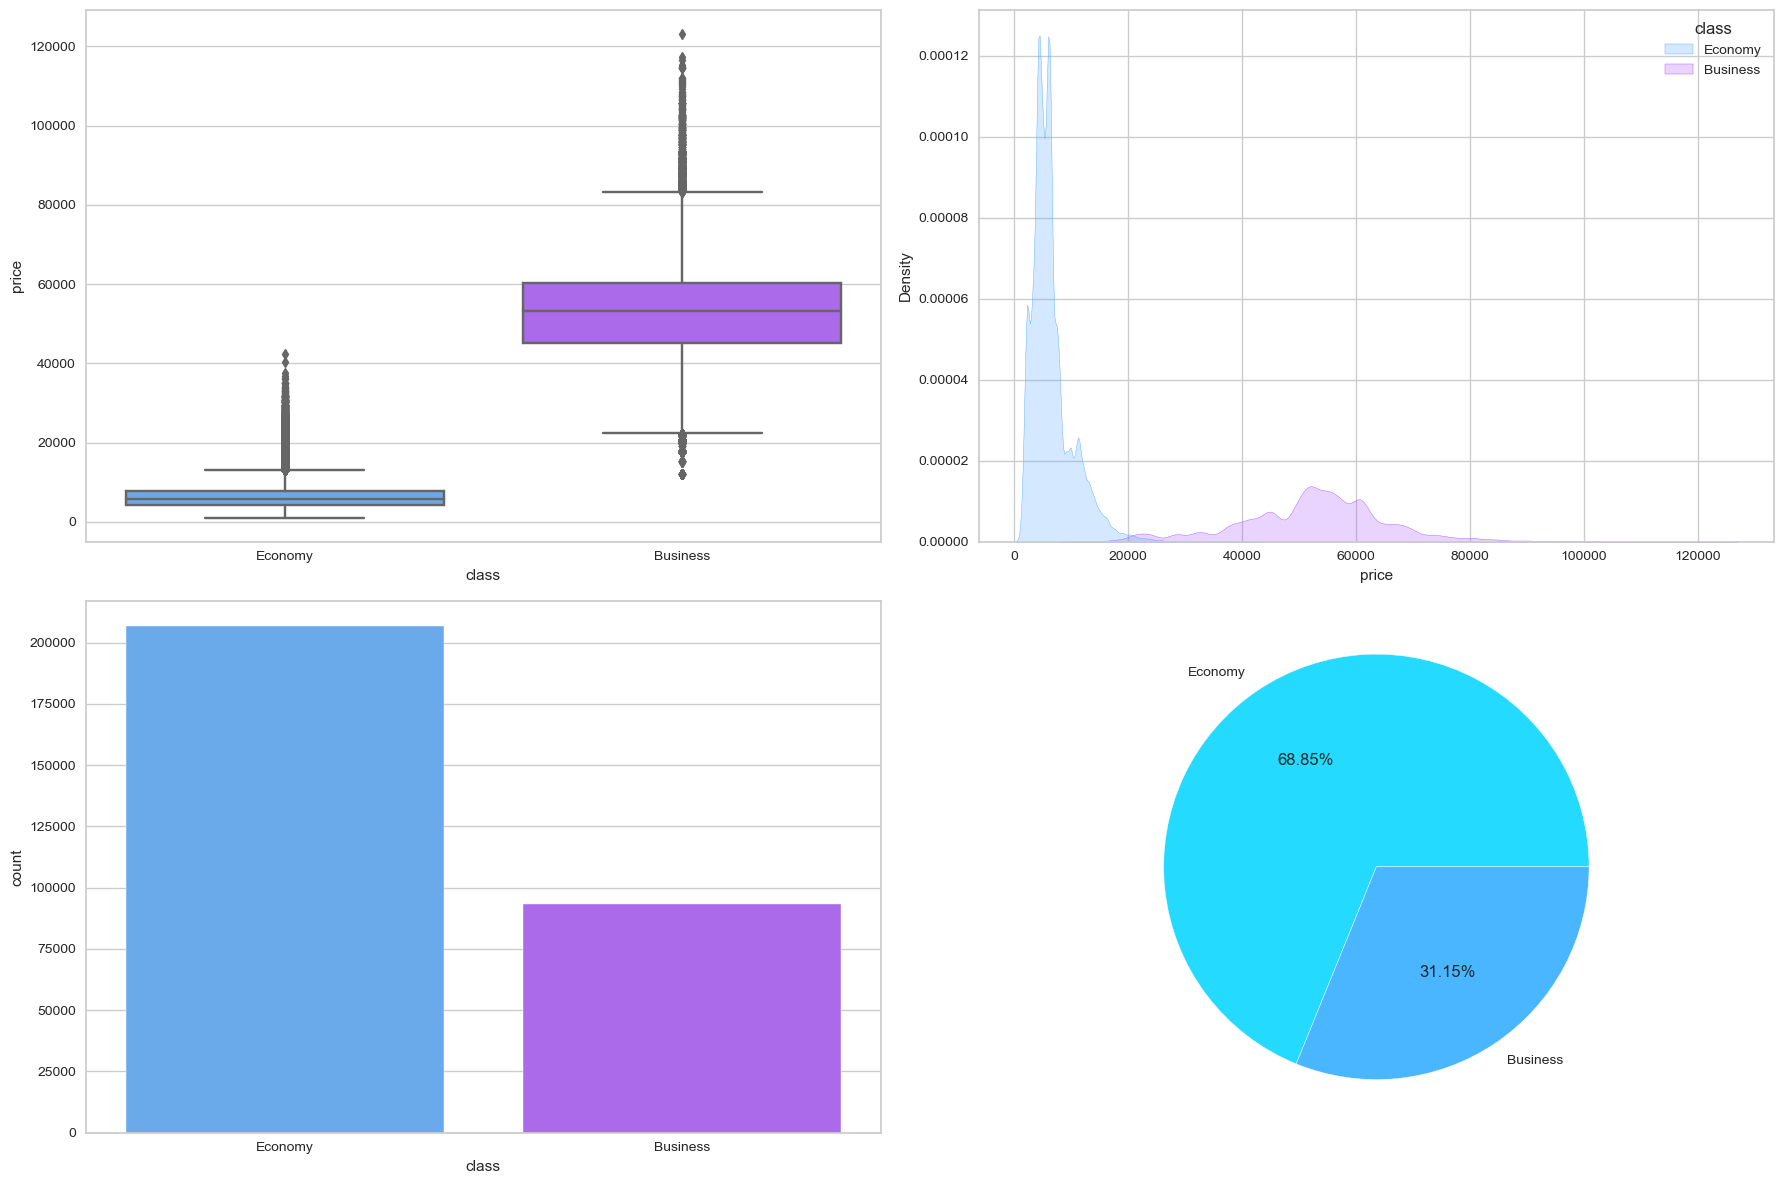

In [161]:
f, ax = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(ax=ax[0,0], y='price', x='class', data=data, palette='cool')
sns.kdeplot(ax=ax[0,1], x='price', hue='class', data=data, palette='cool', shade=True)
sns.countplot(ax=ax[1,0], x='class', data=data, palette='cool', orient='h')
plt.pie(class_['count'], labels=class_['class'], autopct='%.2f%%', colors=sns.color_palette('cool'))
plt.tight_layout()

### **airline and price**

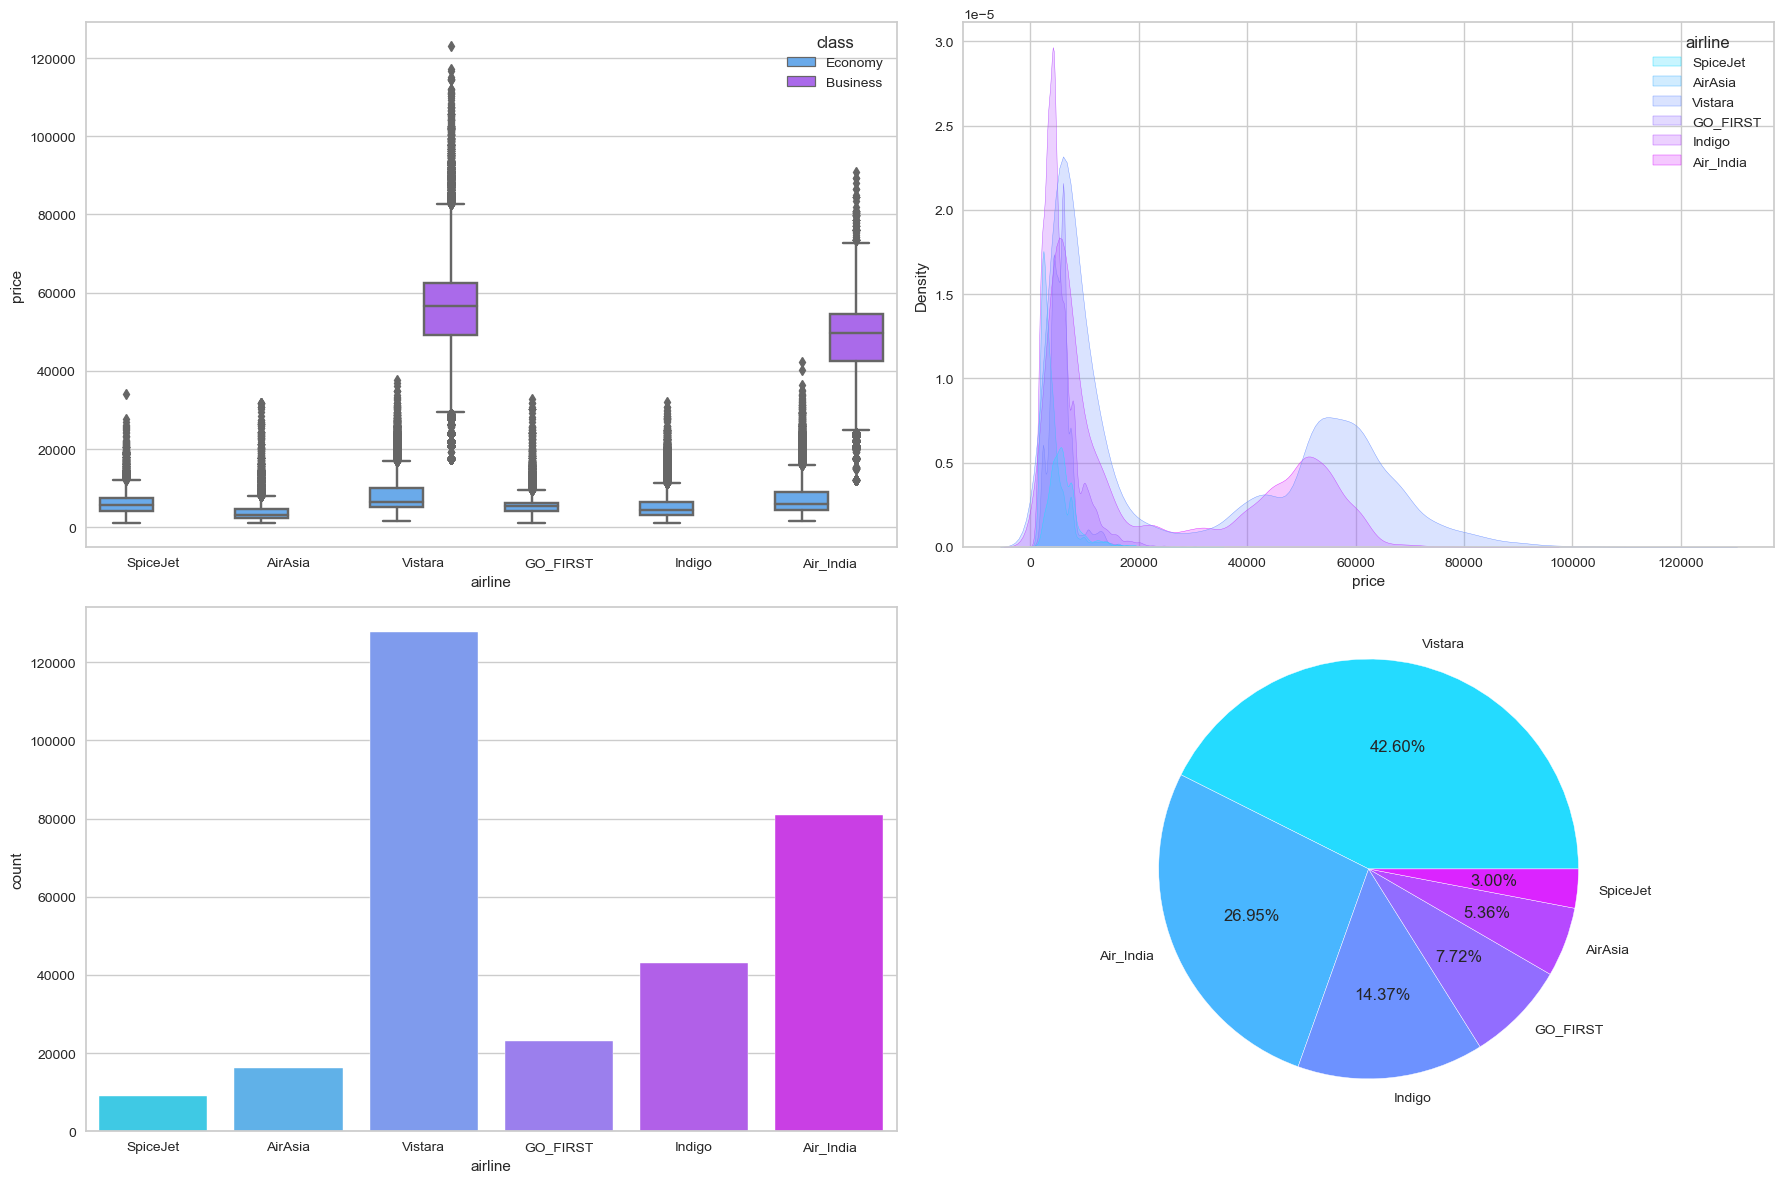

In [163]:
f, ax = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(ax=ax[0,0], y='price', x='airline', hue='class', data=data, palette='cool')
sns.kdeplot(ax=ax[0,1], x='price', hue='airline', data=data, palette='cool', shade=True)
sns.countplot(ax=ax[1,0], x='airline', data=data, palette='cool', orient='h')
plt.pie(airline['count'], labels=airline.airline, autopct='%.2f%%', colors=sns.color_palette('cool'))
plt.tight_layout()

### **stops and price**

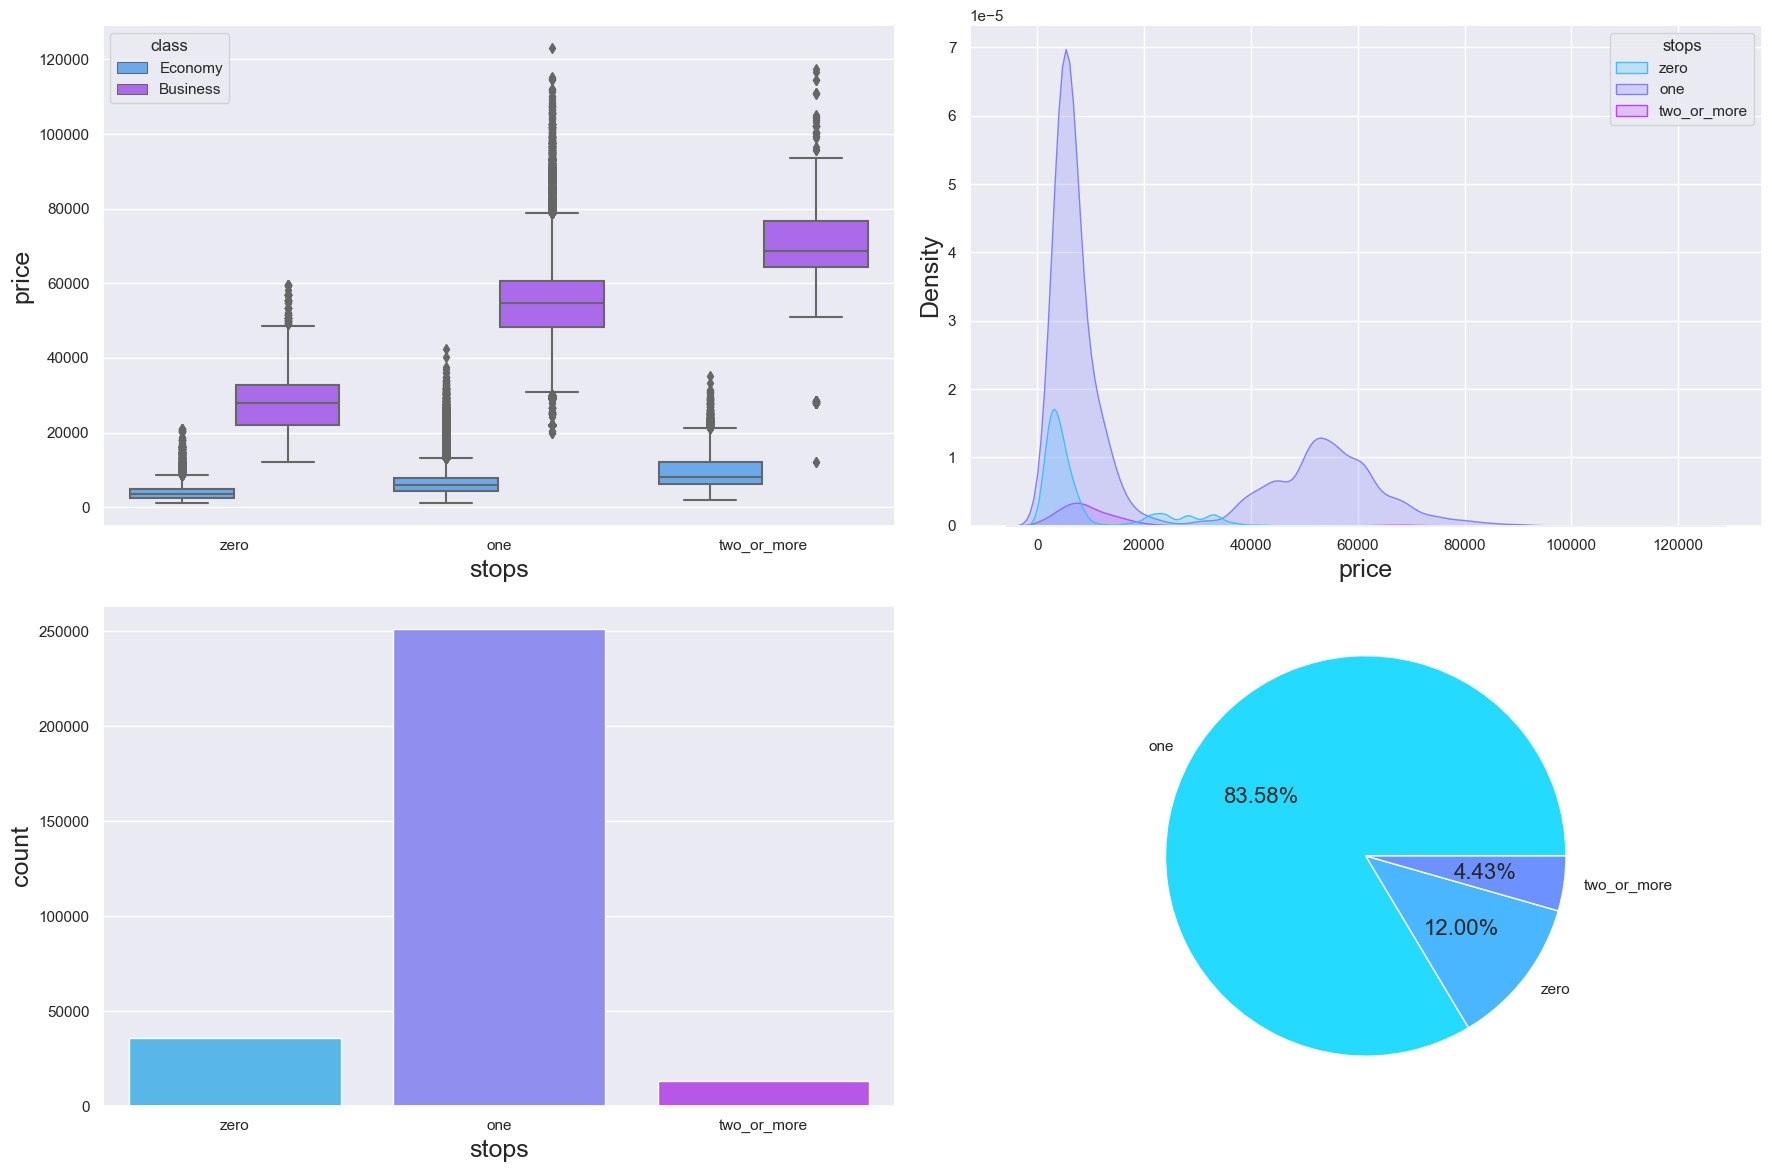

In [24]:
f, ax = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(ax=ax[0,0], y='price', x='stops', hue='class', data=data, palette='cool')
sns.kdeplot(ax=ax[0,1], x='price', hue='stops', data=data, palette='cool', shade=True)
sns.countplot(ax=ax[1,0], x='stops', data=data, palette='cool', orient='h')
plt.pie(stops['count'], labels=stops.stops, autopct='%.2f%%', colors=sns.color_palette('cool'))
plt.tight_layout()

### **source_city and price**

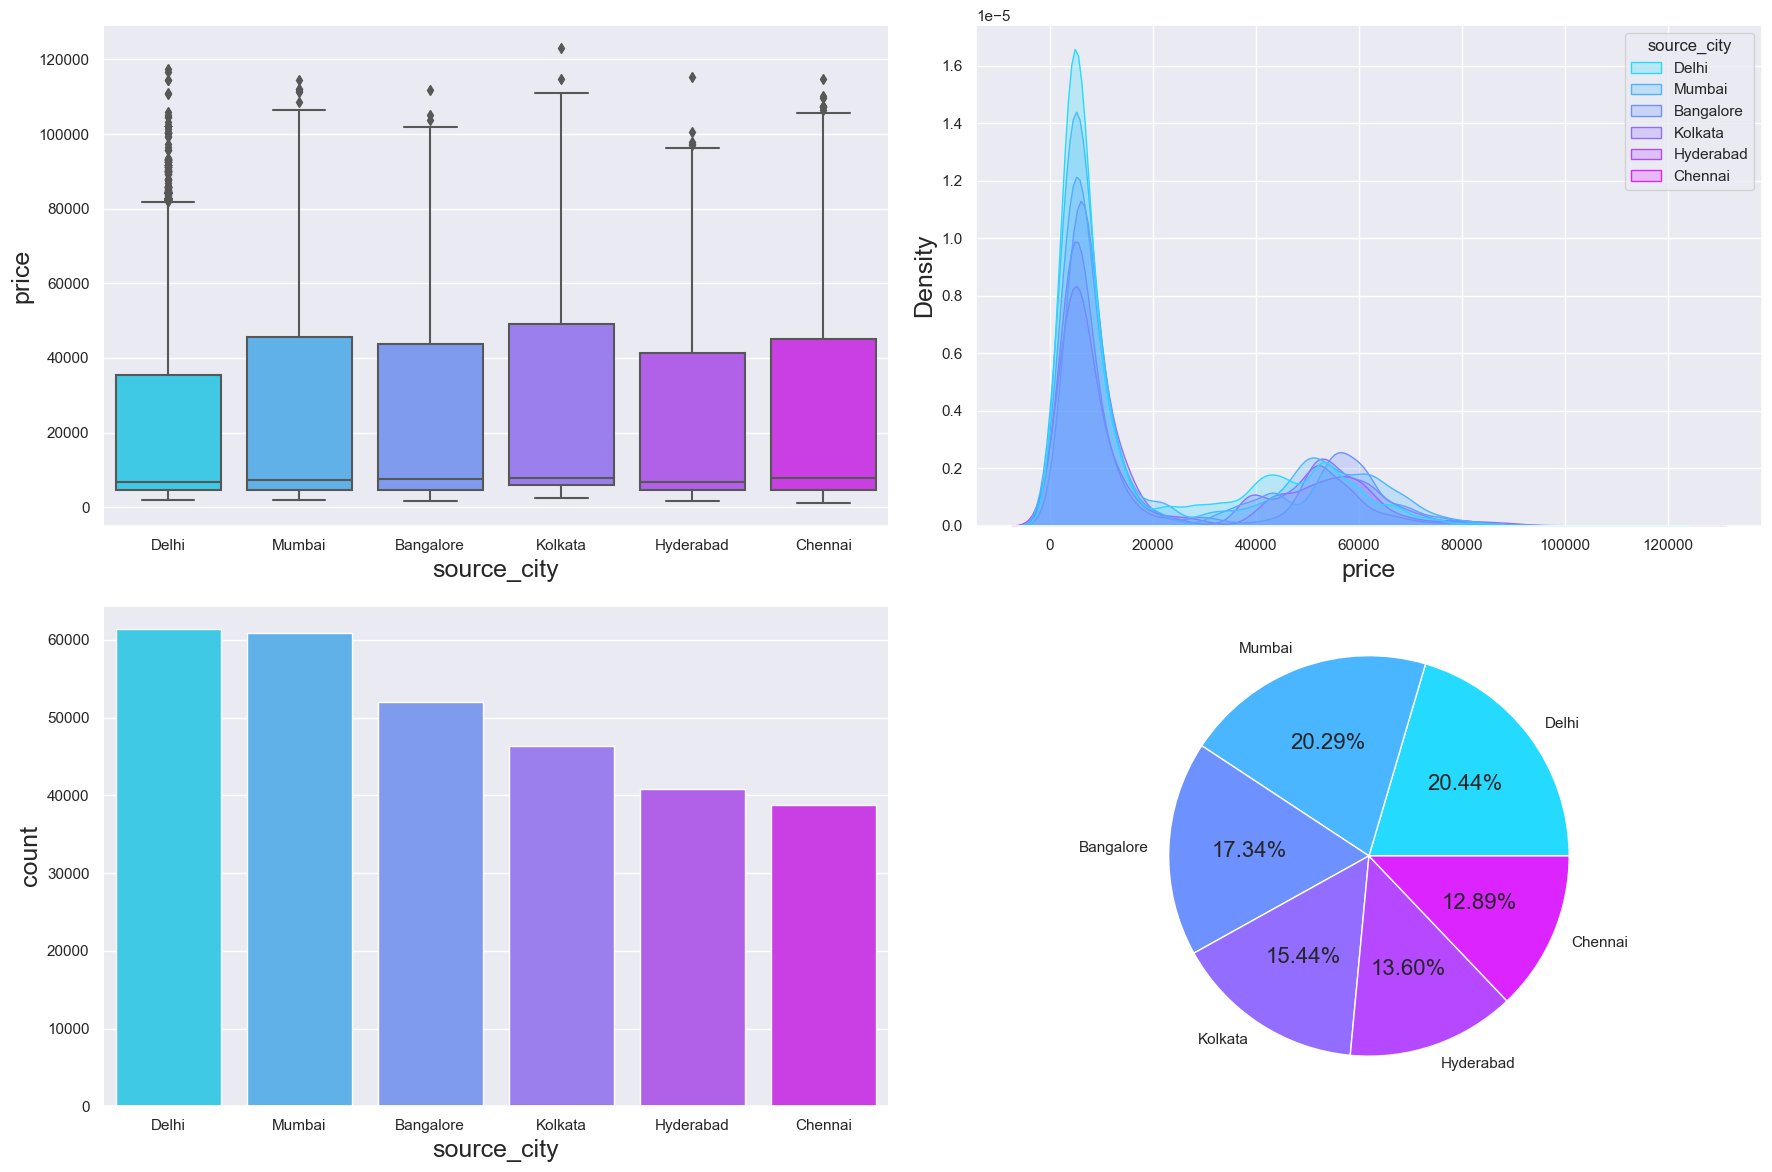

In [25]:
f, ax = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(ax=ax[0,0], y='price', x='source_city', data=data, palette='cool')
sns.kdeplot(ax=ax[0,1], x='price', hue='source_city', data=data, palette='cool', shade=True)
sns.countplot(ax=ax[1,0], x='source_city', data=data, palette='cool', orient='h')
plt.pie(sourceCity['count'], labels=sourceCity.source_city, autopct='%.2f%%', colors=sns.color_palette('cool'))
plt.tight_layout()

### **destination_city and price**

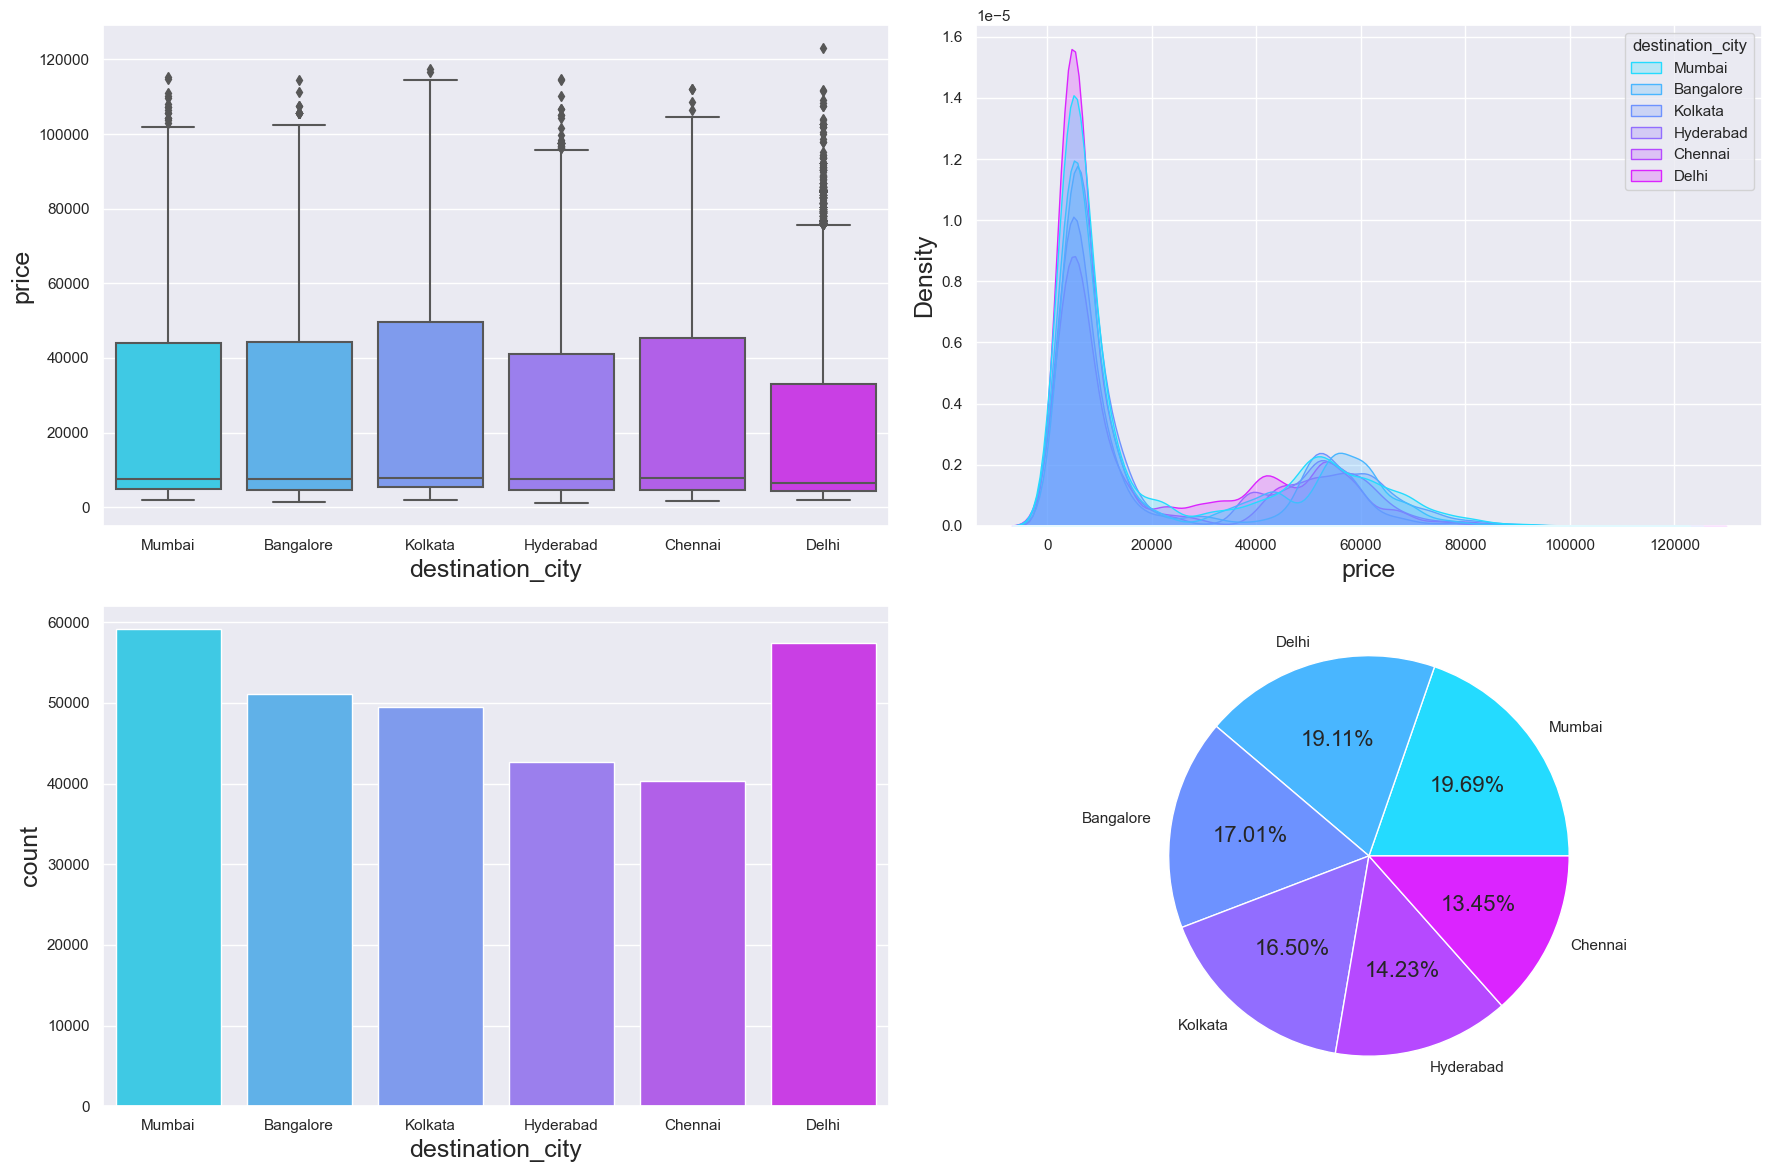

In [26]:
f, ax = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(ax=ax[0,0], y='price', x='destination_city', data=data, palette='cool')
sns.kdeplot(ax=ax[0,1], x='price', hue='destination_city', data=data, palette='cool', shade=True)
sns.countplot(ax=ax[1,0], x='destination_city', data=data, palette='cool', orient='h')
plt.pie(destinationCity['count'], labels=destinationCity.destination_city, autopct='%.2f%%', colors=sns.color_palette('cool'))
plt.tight_layout()

### **departure_time and price**

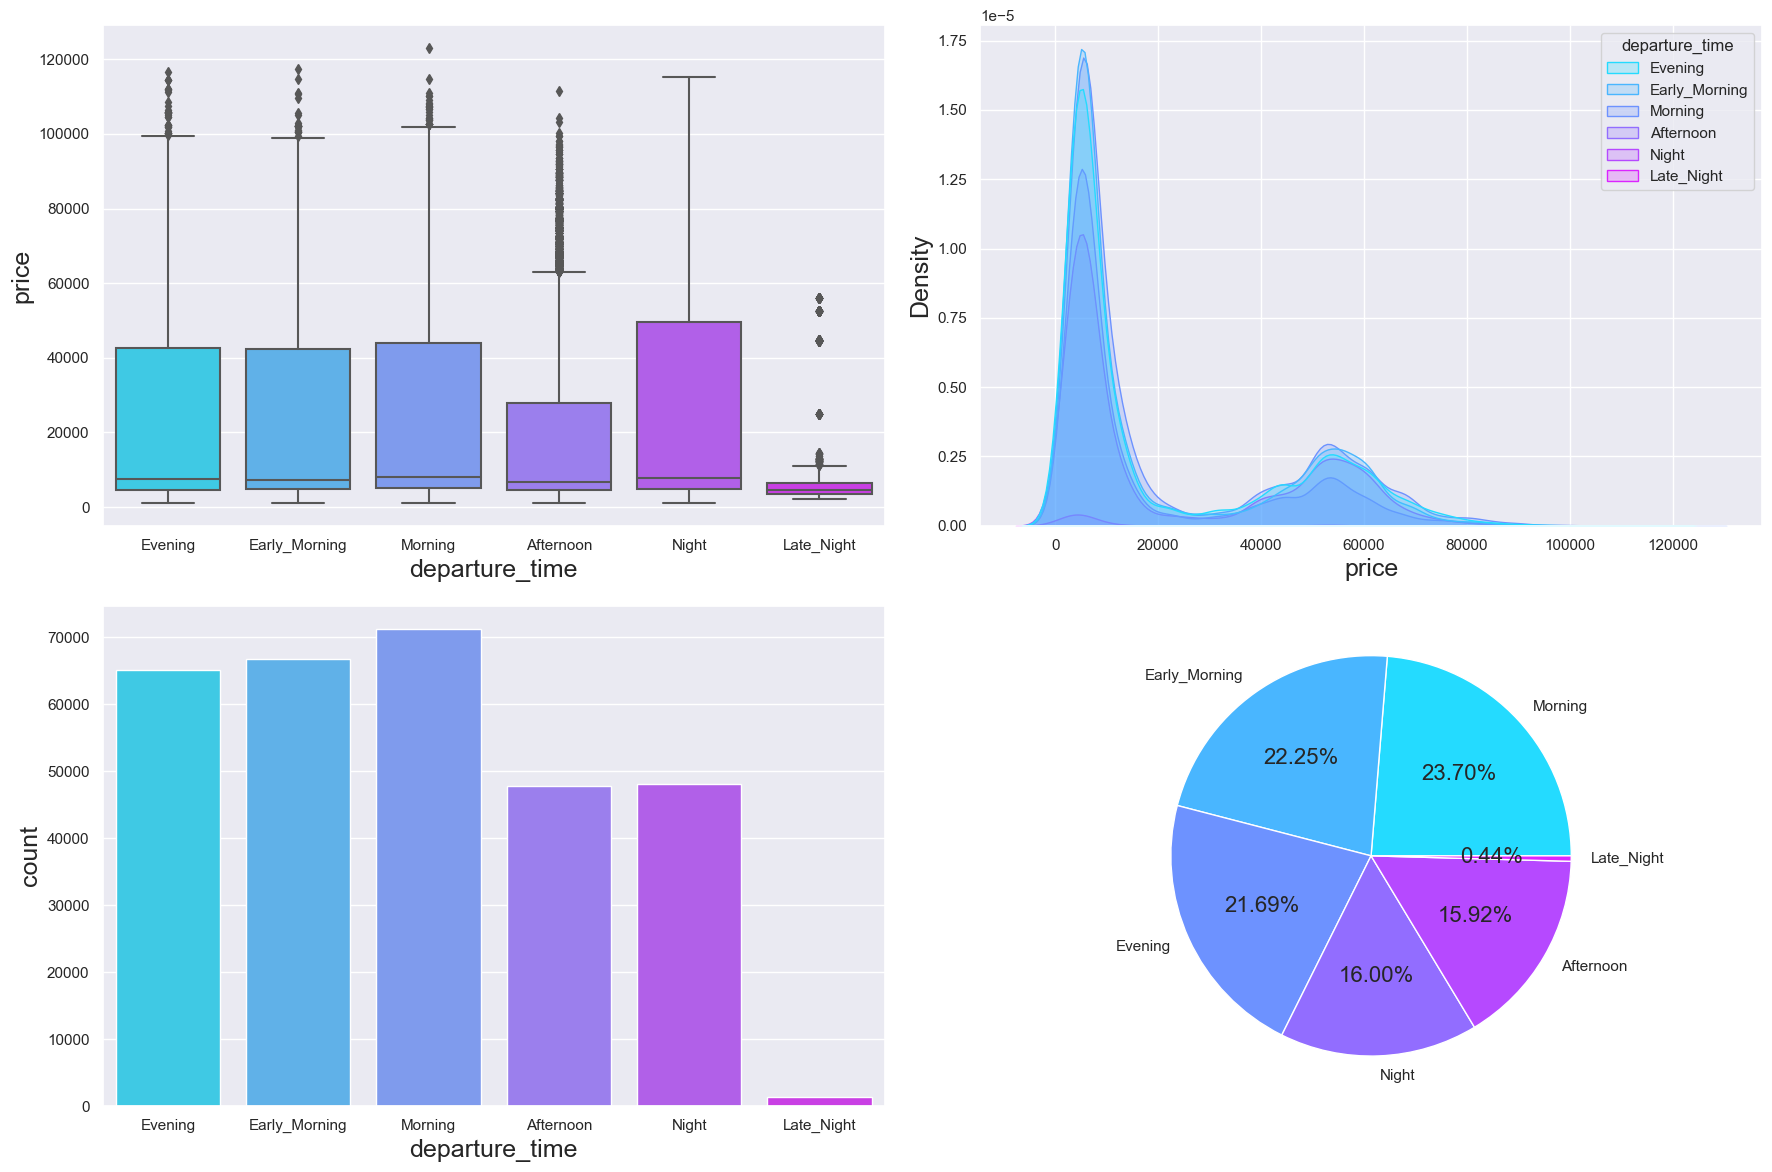

In [27]:
f, ax = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(ax=ax[0,0], y='price', x='departure_time', data=data, palette='cool')
sns.kdeplot(ax=ax[0,1], x='price', hue='departure_time', data=data, palette='cool', shade=True)
sns.countplot(ax=ax[1,0], x='departure_time', data=data, palette='cool', orient='h')
plt.pie(departureTime['count'], labels=departureTime.departure_time, autopct='%.2f%%', colors=sns.color_palette('cool'))
plt.tight_layout()

### **arrival_time and price**

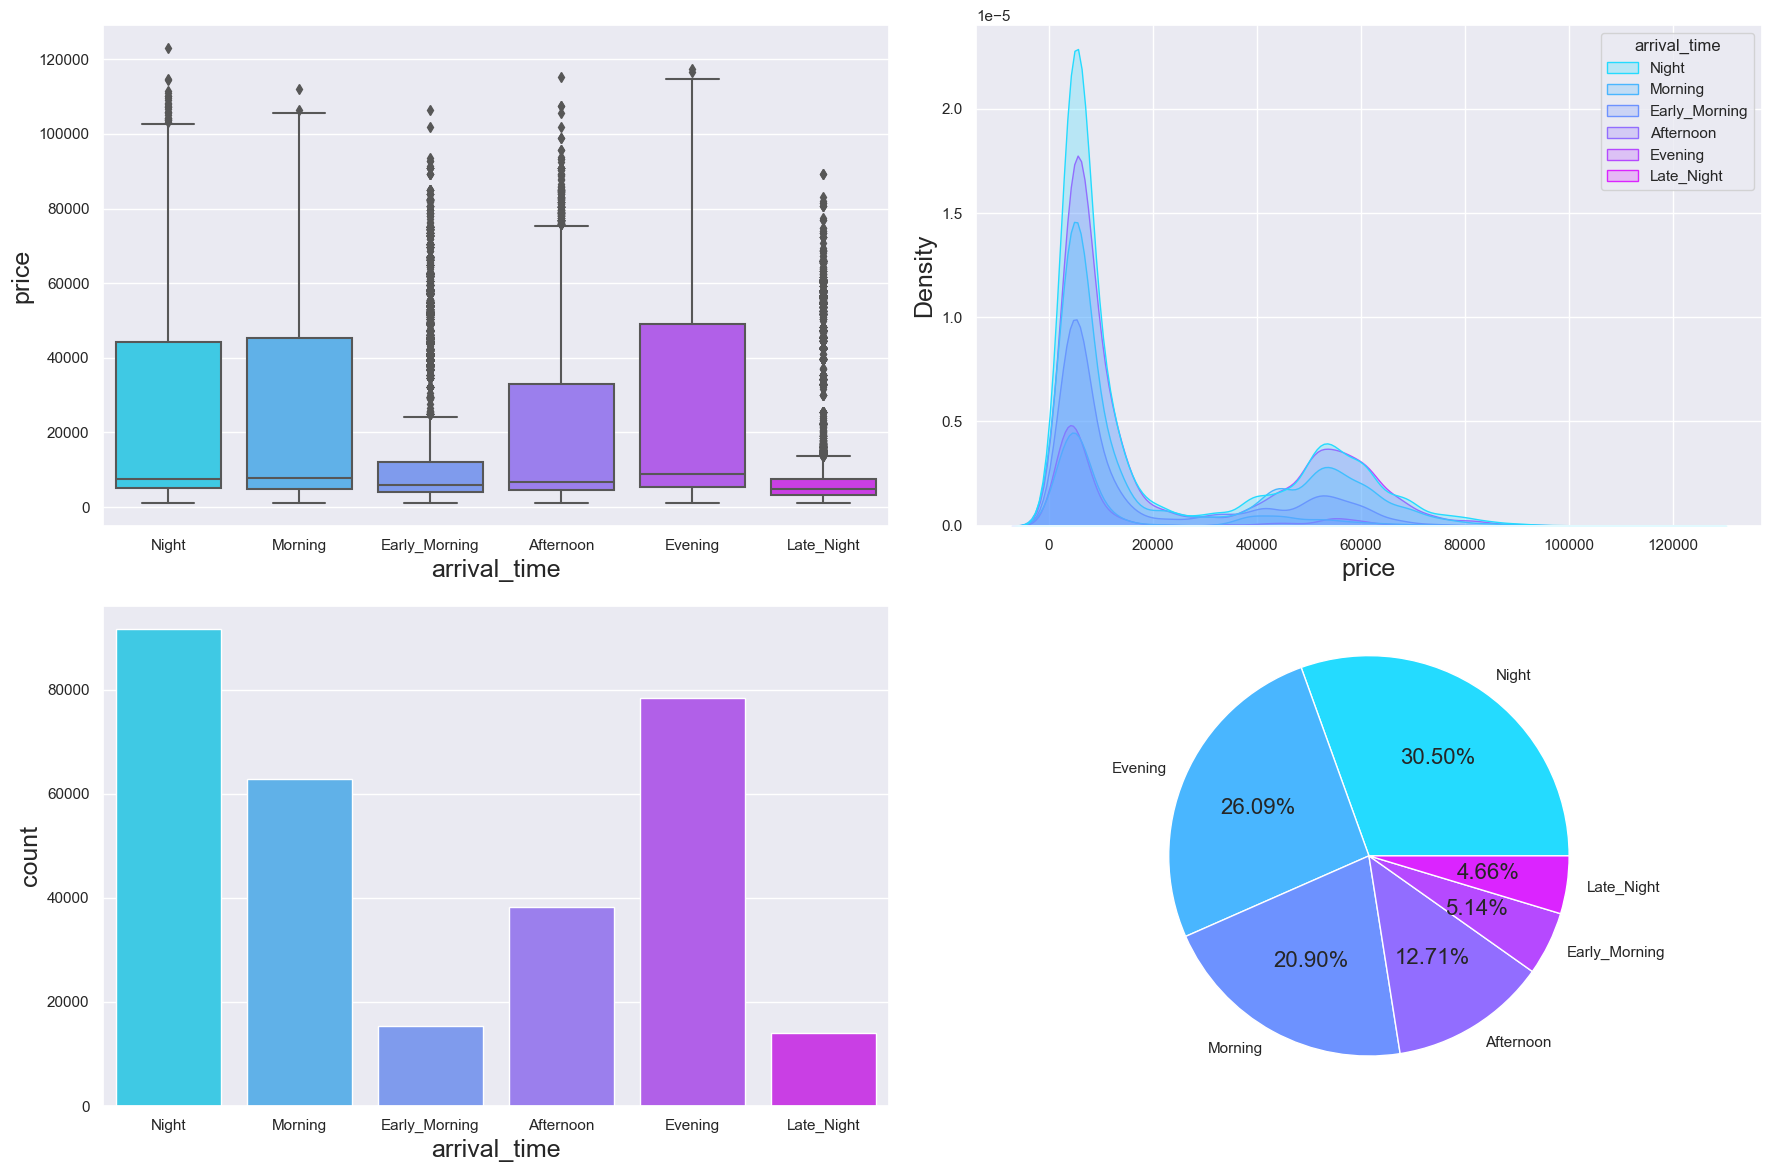

In [28]:
f, ax = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(ax=ax[0,0], y='price', x='arrival_time', data=data, palette='cool')
sns.kdeplot(ax=ax[0,1], x='price', hue='arrival_time', data=data, palette='cool', shade=True)
sns.countplot(ax=ax[1,0], x='arrival_time', data=data, palette='cool', orient='h')
plt.pie(arrivalTime['count'], labels=arrivalTime.arrival_time, autopct='%.2f%%', colors=sns.color_palette('cool'))
plt.tight_layout()

## **Outliers**

In [29]:
def findOutliers(df, dfColumn):
    q1 = np.quantile(df[dfColumn], 0.25)
    q3 = np.quantile(df[dfColumn], 0.75)
    iqr = q3 - q1
    cutOffWhisker = iqr * 1.5
    lowerWhisker = q1 - cutOffWhisker
    upperWhisker = q3 + cutOffWhisker
    outliersUpperDf = df[df[dfColumn] > upperWhisker]
    outliersLowerDf = df[df[dfColumn] < lowerWhisker]
    outliers = {
      'lowerWhisker': lowerWhisker,
      'upperWhisker': upperWhisker,
      'outliersUpperDf': outliersUpperDf,
      'outliersLowerDf': outliersLowerDf,
    }
    return outliers
    # return q1,q3

### **Duration**

In [30]:
durationOutliers = findOutliers(data, 'duration')

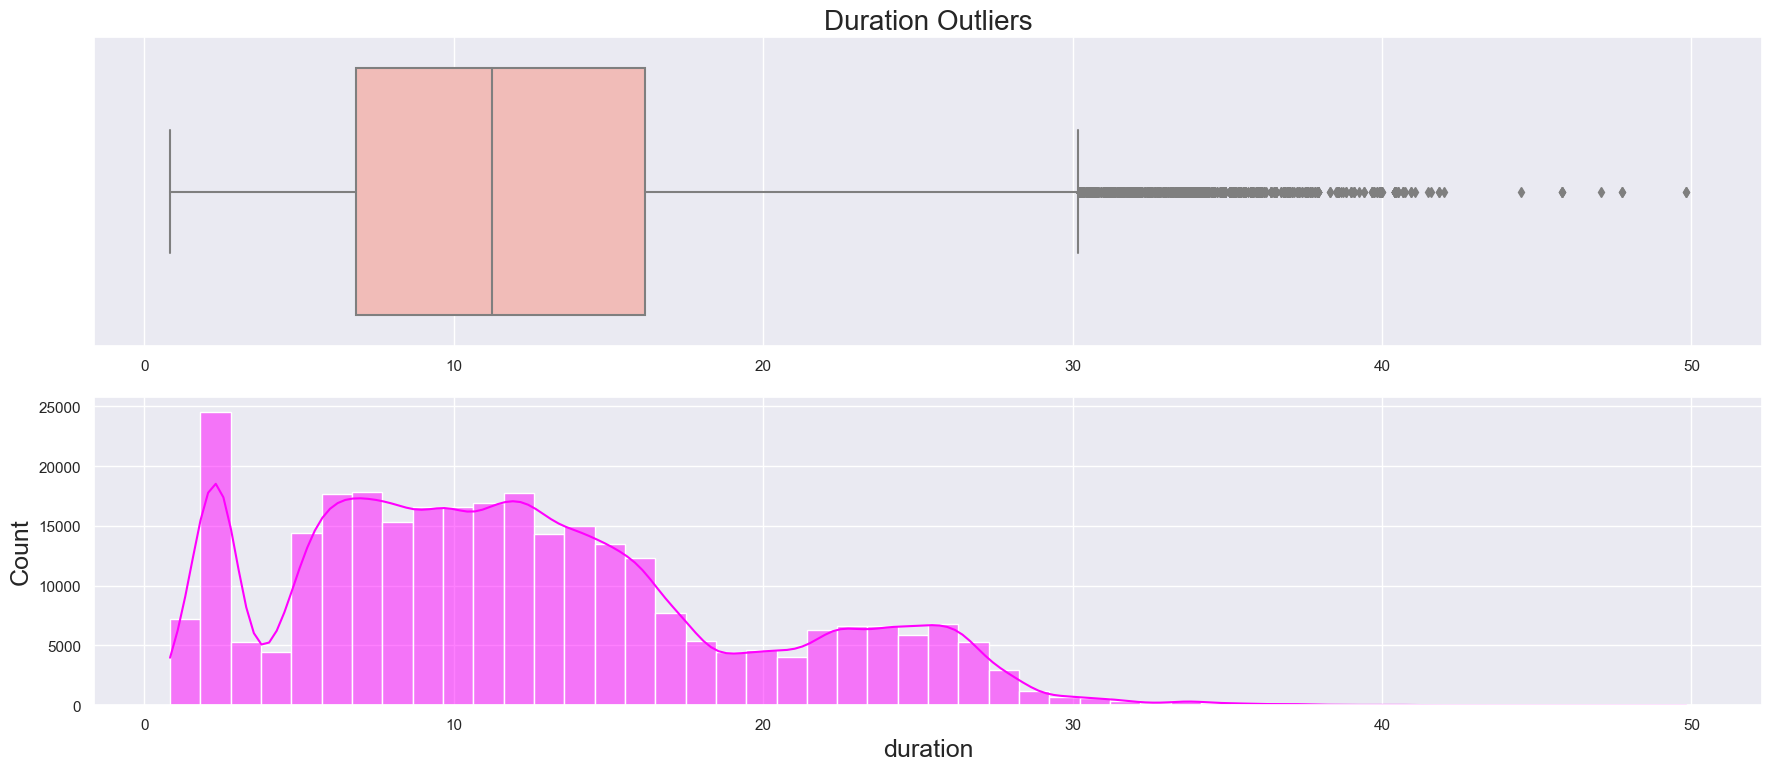

In [31]:
f, ax = plt.subplots(2, 1)
sns.boxplot(x='duration', data=data, palette='Pastel1', ax=ax[0])
sns.histplot(x='duration', data=data, color='magenta', bins=50, kde=True, ax=ax[1])

ax[0].set_title('Duration Outliers')
ax[0].set_xlabel('')

f.tight_layout()

Text(0.5, 1.0, 'Outliers Detection (Duration)')

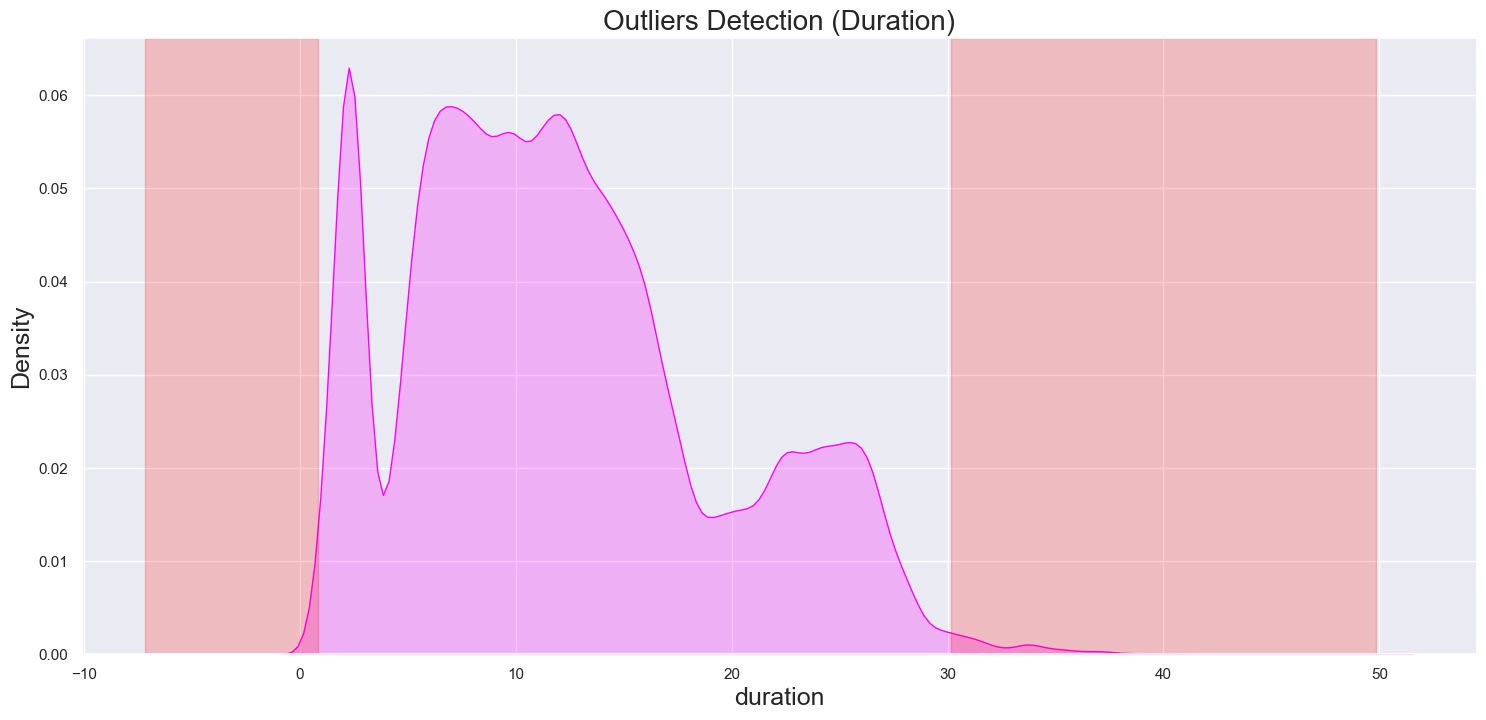

In [32]:
f, ax = plt.subplots()
sns.kdeplot(x=data.duration, color='magenta', shade=True)
plt.axvspan(xmin=durationOutliers['lowerWhisker'], xmax=data.duration.min(), alpha=0.2, color='red')
plt.axvspan(xmin=durationOutliers['upperWhisker'], xmax=data.duration.max(), alpha=0.2, color='red')

plt.title('Outliers Detection (Duration)')

### **Days Left**

In [33]:
daysLeftOurliers = findOutliers(data, 'days_left')

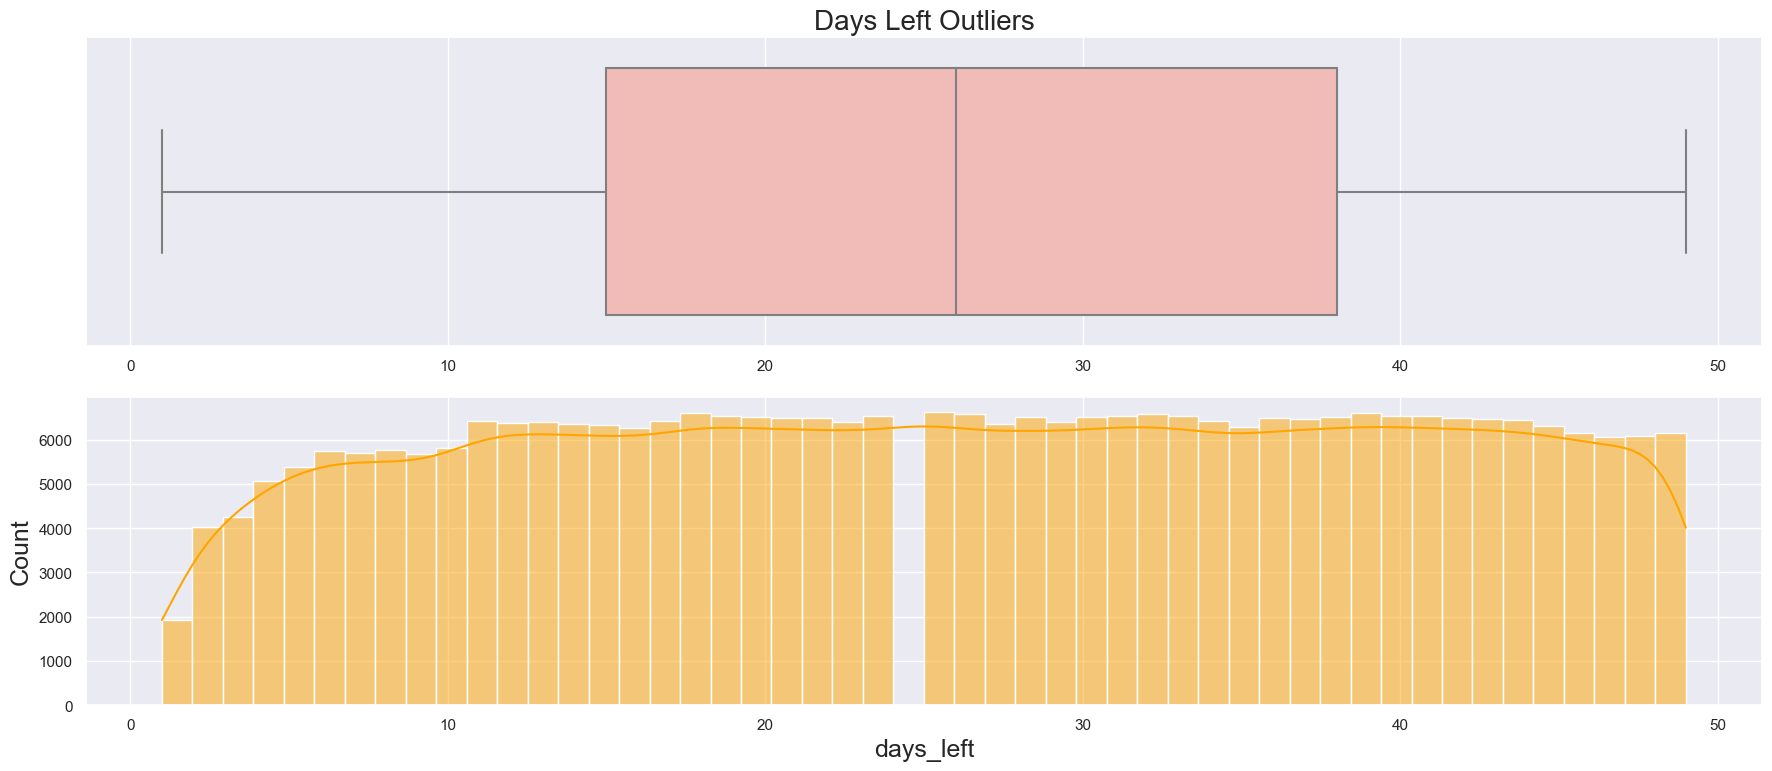

In [34]:
f, ax = plt.subplots(2, 1)
sns.boxplot(x='days_left', data=data, palette='Pastel1', ax=ax[0])
sns.histplot(x='days_left', data=data, color='orange', bins=50, kde=True, ax=ax[1])

ax[0].set_title('Days Left Outliers')
ax[0].set_xlabel('')

f.tight_layout()

Text(0.5, 1.0, 'Outliers Detection (Days Left)')

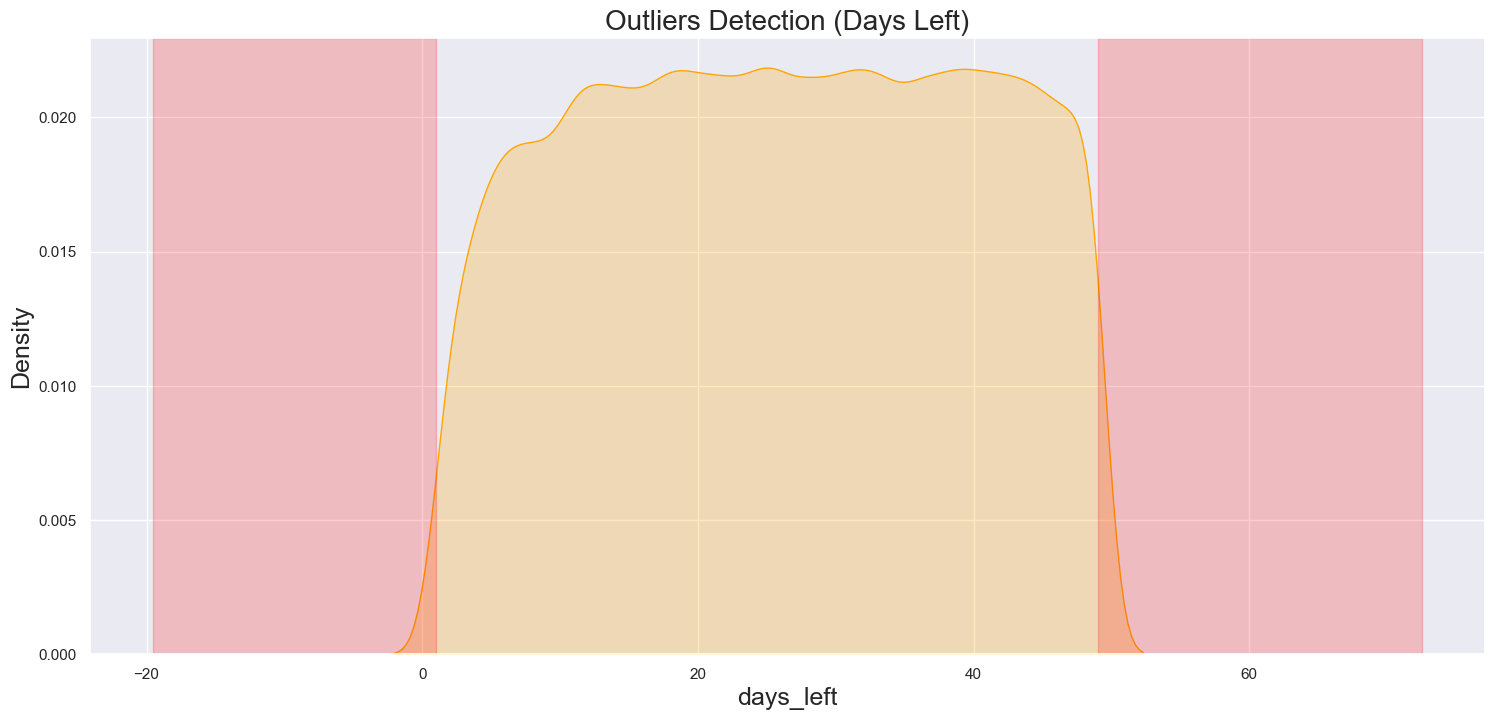

In [35]:
f, ax = plt.subplots()
sns.kdeplot(x=data.days_left, color='orange', shade=True)
plt.axvspan(xmin=daysLeftOurliers['lowerWhisker'], xmax=data.days_left.min(), alpha=0.2, color='red')
plt.axvspan(xmin=daysLeftOurliers['upperWhisker'], xmax=data.days_left.max(), alpha=0.2, color='red')

plt.title('Outliers Detection (Days Left)')

### **Price**

In [36]:
priceOutliers = findOutliers(data, 'price')

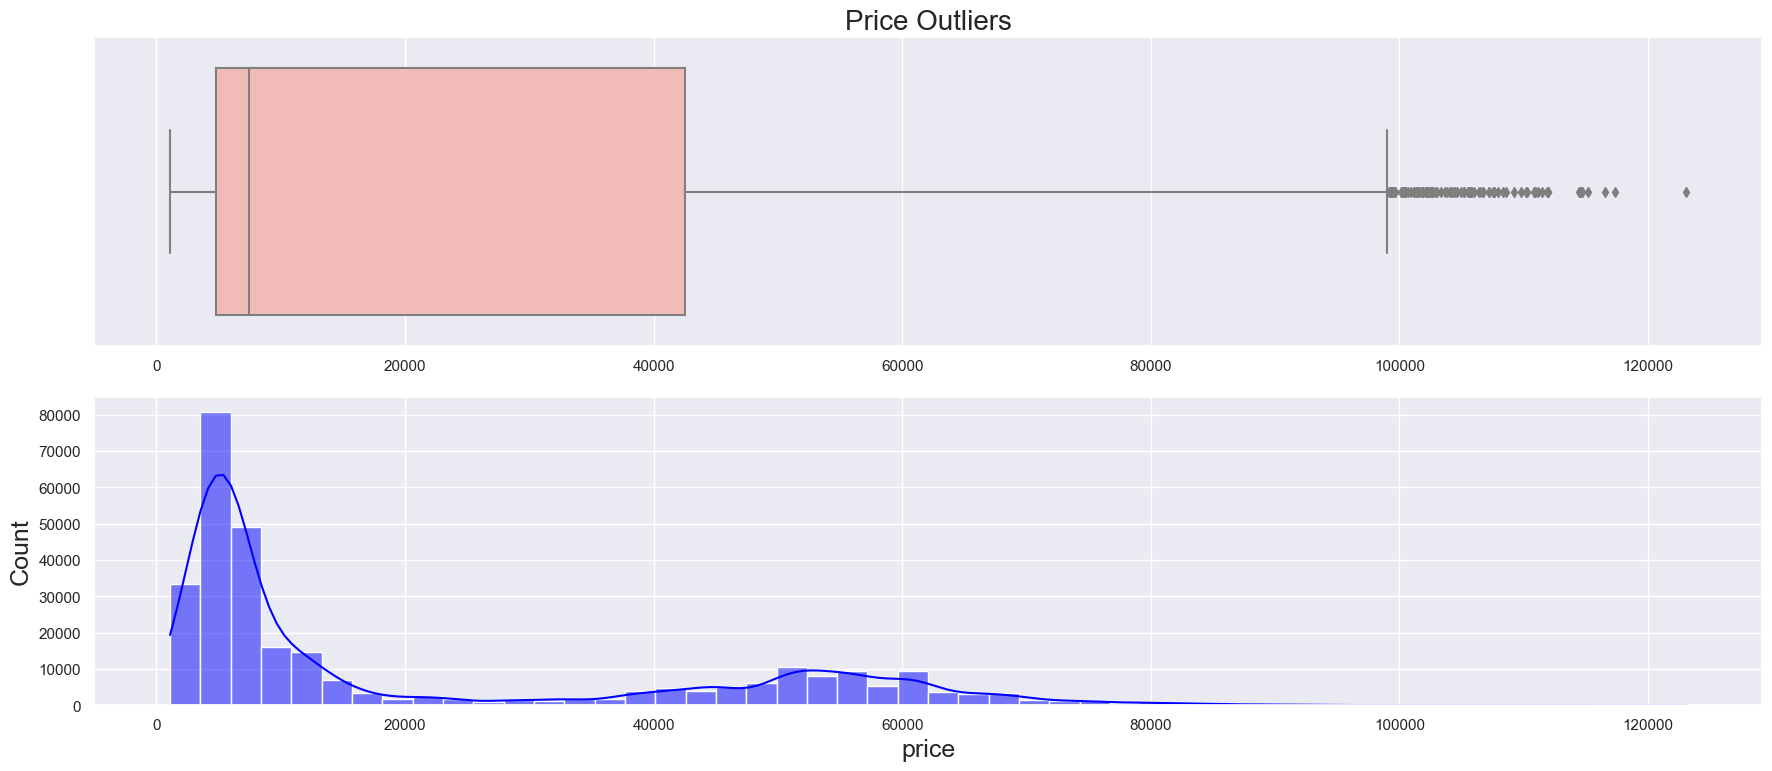

In [37]:
f, ax = plt.subplots(2, 1)
sns.boxplot(x='price', data=data, palette='Pastel1', ax=ax[0])
sns.histplot(x='price', data=data, color='blue', bins=50, kde=True, ax=ax[1])

ax[0].set_title('Price Outliers')
ax[0].set_xlabel('')

f.tight_layout()

Text(0.5, 1.0, 'Outliers Detection (Price)')

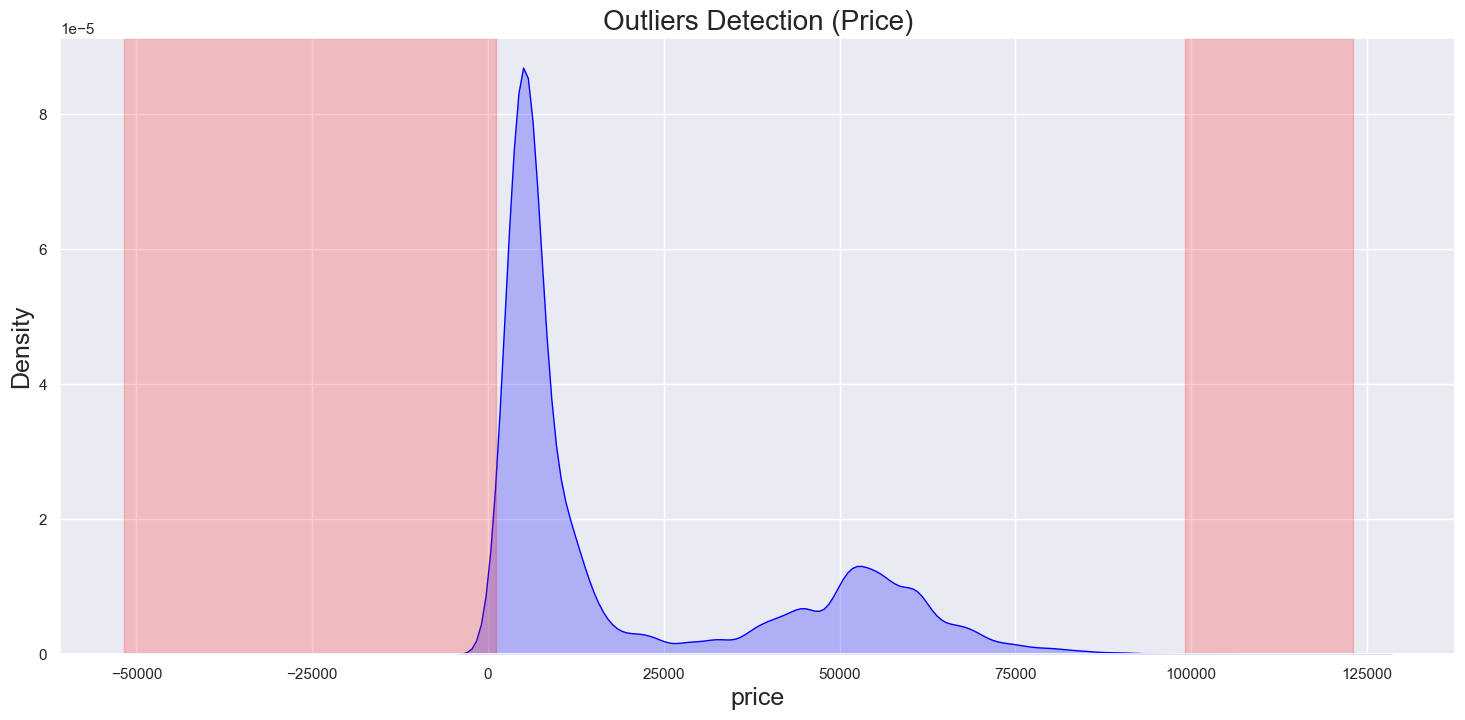

In [38]:
f, ax = plt.subplots()
sns.kdeplot(x=data.price, color='blue', shade=True)
plt.axvspan(xmin=priceOutliers['lowerWhisker'], xmax=data.price.min(), alpha=0.2, color='red')
plt.axvspan(xmin=priceOutliers['upperWhisker'], xmax=data.price.max(), alpha=0.2, color='red')

plt.title('Outliers Detection (Price)')

# **MODEL PREPARATION**

In [39]:
dfModel = data.copy()
dfModel.drop(['Unnamed: 0','flight'], axis=1, inplace=True)
dfModel.head(5)

airline source_city departure_time stops   arrival_time destination_city  \
0  SpiceJet       Delhi        Evening  zero          Night           Mumbai   
1  SpiceJet       Delhi  Early_Morning  zero        Morning           Mumbai   
2   AirAsia       Delhi  Early_Morning  zero  Early_Morning           Mumbai   
3   Vistara       Delhi        Morning  zero      Afternoon           Mumbai   
4   Vistara       Delhi        Morning  zero        Morning           Mumbai   

     class  duration  days_left  price  
0  Economy      2.17          1   5953  
1  Economy      2.33          1   5953  
2  Economy      2.17          1   5956  
3  Economy      2.25          1   5955  
4  Economy      2.33          1   5955

## **Reduce Size --> Convert to Categorical**

In [40]:
dfModel.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 134.8 MB


In [41]:
categoryColumns = []
for x in dfModel.columns:
  if dfModel[x].dtype == 'object':
    dfModel[x] = dfModel[x].astype('category')
    categoryColumns.append(x)
categoryColumns   

['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [42]:
dfModel.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   airline           300153 non-null  category
 1   source_city       300153 non-null  category
 2   departure_time    300153 non-null  category
 3   stops             300153 non-null  category
 4   arrival_time      300153 non-null  category
 5   destination_city  300153 non-null  category
 6   class             300153 non-null  category
 7   duration          300153 non-null  float64 
 8   days_left         300153 non-null  int64   
 9   price             300153 non-null  int64   
dtypes: category(7), float64(1), int64(2)
memory usage: 8.9 MB


## **Feature Preprocessing**

In [43]:
dfModel['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [44]:
def dfPreprocessing1Func(df, cols): 
  for value in cols:
    df[value] = df[value].str.replace('_', '').str.replace(' ', '').str.lower()
  return df

In [45]:
dfModel = dfPreprocessing1Func(dfModel, categoryColumns)
dfModel.head()

airline source_city departure_time stops  arrival_time destination_city  \
0  spicejet       delhi        evening  zero         night           mumbai   
1  spicejet       delhi   earlymorning  zero       morning           mumbai   
2   airasia       delhi   earlymorning  zero  earlymorning           mumbai   
3   vistara       delhi        morning  zero     afternoon           mumbai   
4   vistara       delhi        morning  zero       morning           mumbai   

     class  duration  days_left  price  
0  economy      2.17          1   5953  
1  economy      2.33          1   5953  
2  economy      2.17          1   5956  
3  economy      2.25          1   5955  
4  economy      2.33          1   5955

## **Feature Encoding**

In [46]:
# Label --> stops, class || sisanya one-hot
oneHotColumns = []
labelColumns = []

for x in categoryColumns:
  if x in ['stops', 'class']: labelColumns.append(x)
  else: oneHotColumns.append(x)

print(f'ohe: {oneHotColumns}')
print(f'label: {labelColumns}')

ohe: ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']
label: ['stops', 'class']


In [123]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import OrdinalEncoder

def labelEncoderFunc(data, cols):
  for value in cols:
    data[value] = LabelEncoder().fit_transform(data[value])
  return data

def oheFunc(data, cols):
  ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
  ohe.fit(data[cols])
  dfOhe = pd.DataFrame(ohe.transform(data[cols]), columns=ohe.get_feature_names_out())
  data = pd.concat([data.reset_index(drop=True), dfOhe], axis=1).drop(columns=cols)
  return data

def ordinalEncoderFunc(data, cols, mapping):
  oe = OrdinalEncoder(cols=cols, mapping=mapping)
  oe.fit(data[cols])
  dfOe = pd.DataFrame(oe.transform(data[cols]), columns=oe.get_feature_names())
  data = data.drop(columns=cols)
  data = pd.concat([data.reset_index(drop=True), dfOe.reset_index(drop=True)], axis=1)
  return data


In [48]:
#label encoding
mappingLabel = [
  {
    'col': 'stops', 
    'mapping': {
      'zero': 0, 
      'one': 1, 
      'twoormore': 2
  }}, {
    'col': 'class', 
    'mapping': {
      'economy': 0,
      'business': 1
  }}]
dfModel = ordinalEncoderFunc(dfModel, labelColumns, mappingLabel)

#one-hot encoding
dfModel = oheFunc(dfModel, oneHotColumns)

In [49]:
print(f'Dimensions: {dfModel.shape}')
dfModel

Dimensions: (300153, 35)


duration  days_left  price  stops  class  airline_airasia  \
0           2.17          1   5953      0      0              0.0   
1           2.33          1   5953      0      0              0.0   
2           2.17          1   5956      0      0              1.0   
3           2.25          1   5955      0      0              0.0   
4           2.33          1   5955      0      0              0.0   
...          ...        ...    ...    ...    ...              ...   
300148     10.08         49  69265      1      1              0.0   
300149     10.42         49  77105      1      1              0.0   
300150     13.83         49  79099      1      1              0.0   
300151     10.00         49  81585      1      1              0.0   
300152     10.08         49  81585      1      1              0.0   

        airline_airindia  airline_gofirst  airline_indigo  airline_spicejet  \
0                    0.0              0.0             0.0               1.0   
1                    0.0              0.0             0.0               1.0   
2                    0.0              0.0             0.0               0.0   
3                    0.0              0.0             0.0               0.0   
4                    0.0              0.0             0.0               0.0   
...                  ...              ...             ...               ...   
300148               0.0              0.0             0.0               0.0   
300149               0.0              0.0             0.0               0.0   
300150               0.0              0.0             0.0               0.0   
300151               0.0              0.0             0.0               0.0   
300152               0.0              0.0             0.0               0.0   

        ...  arrival_time_evening  arrival_time_latenight  \
0       ...                   0.0                     0.0   
1       ...                   0.0                     0.0   
2       ...                   0.0                     0.0   
3       ...                   0.0                     0.0   
4       ...                   0.0                     0.0   
...     ...                   ...                     ...   
300148  ...                   1.0                     0.0   
300149  ...                   0.0                     0.0   
300150  ...                   0.0                     0.0   
300151  ...                   1.0                     0.0   
300152  ...                   1.0                     0.0   

        arrival_time_morning  arrival_time_night  destination_city_bangalore  \
0                        0.0                 1.0                         0.0   
1                        1.0                 0.0                         0.0   
2                        0.0                 0.0                         0.0   
3                        0.0                 0.0                         0.0   
4                        1.0                 0.0                         0.0   
...                      ...                 ...                         ...   
300148                   0.0                 0.0                         0.0   
300149                   0.0                 1.0                         0.0   
300150                   0.0                 1.0                         0.0   
300151                   0.0                 0.0                         0.0   
300152                   0.0                 0.0                         0.0   

        destination_city_chennai  destination_city_delhi  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   
...                          ...                     ...   
300148                       0.0                     0.0   
300149                       0.0                     0.0

## **Model Selection**

In [50]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [51]:
testSize = 0.33
randomState_=0
isShuffle=True
numOfFold=5
modelLinear = ['Linear', LinearRegression()]
modelLasso = ['Lasso', Lasso()]
modelRidge = ['Ridge', Ridge()]
modelElasticNet = ['ElasticNet', ElasticNet()]
modelRandomForest = ['Random Forest', RandomForestRegressor()]
modelGradientBoosting = ['Gradient Boosting', GradientBoostingRegressor()]
modelExtraTrees = ['Extra Trees', ExtraTreesRegressor()]
modelBagging = ['Bagging', BaggingRegressor()]
modelAdaBoost = ['Ada Boost', AdaBoostRegressor()]
modelDecisionTree = ['Decision Tree', DecisionTreeRegressor()]
modelXgb = ['XGB', XGBRegressor(objective='reg:squarederror')]

### **Evaluation Metrics**

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def modelEvaluation(xTrain, xTest, yTrain, yTest, mdl):
  mdl[1].fit(xTrain, yTrain)
  yPredTest = mdl[1].predict(xTest)
  mae = mean_absolute_error(yTest, yPredTest)
  rmse = np.sqrt(mean_squared_error(yTest, yPredTest))
  r2Score = r2_score(yTest, yPredTest)
  return pd.DataFrame([[mdl[0], mae, rmse, r2Score]], columns=['model', 'mae', 'rmse', 'r2_score'])

In [53]:
dfModelBeforeTuning = dfModel.copy()
x = dfModelBeforeTuning.drop(['price'], axis=1)
y = dfModelBeforeTuning.price
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=testSize, random_state=randomState_)

modelLinearBeforeTuning = modelEvaluation(x_train,x_test,y_train,y_test,modelLinear)
modelLassoBeforeTuning = modelEvaluation(x_train,x_test,y_train,y_test,modelLasso)
modelRidgeBeforeTuning = modelEvaluation(x_train,x_test,y_train,y_test,modelRidge)
modelElasticNetBeforeTuning = modelEvaluation(x_train,x_test,y_train,y_test,modelElasticNet)
modelRandomForestBeforeTuning = modelEvaluation(x_train,x_test,y_train,y_test,modelRandomForest)
modelGradientBoostingBeforeTuning = modelEvaluation(x_train,x_test,y_train,y_test,modelGradientBoosting)
modelExtraTreesBeforeTuning = modelEvaluation(x_train,x_test,y_train,y_test,modelExtraTrees)
modelBaggingBeforeTuning = modelEvaluation(x_train,x_test,y_train,y_test,modelBagging)
modelAdaBoostBeforeTuning = modelEvaluation(x_train,x_test,y_train,y_test,modelAdaBoost)
modelDecisionTreeBeforeTuning = modelEvaluation(x_train,x_test,y_train,y_test,modelDecisionTree)
modelXgbBeforeTuning = modelEvaluation(x_train,x_test,y_train,y_test,modelXgb)

In [54]:
compareModelBeforeTuning = pd.concat([modelLinearBeforeTuning, modelLassoBeforeTuning, 
                                      modelRidgeBeforeTuning, modelElasticNetBeforeTuning, 
                                      modelRandomForestBeforeTuning, modelGradientBoostingBeforeTuning,
                                      modelExtraTreesBeforeTuning, modelBaggingBeforeTuning, 
                                      modelAdaBoostBeforeTuning, modelDecisionTreeBeforeTuning, 
                                      modelXgbBeforeTuning]).reset_index(drop=True)

compareModelBeforeTuning['model_type'] = compareModelBeforeTuning.model + ' - Before Tuning'
compareModelBeforeTuningByMae = compareModelBeforeTuning.sort_values(['mae'], ascending=True)
compareModelBeforeTuningByRmse = compareModelBeforeTuning.sort_values(['rmse'], ascending=True)
compareModelBeforeTuningByR2Score = compareModelBeforeTuning.sort_values(['r2_score'], ascending=False)

compareModelBeforeTuning

model           mae          rmse  r2_score  \
0              Linear   4516.151133   6805.872820  0.910190   
1               Lasso   4514.142509   6805.824633  0.910191   
2               Ridge   4516.139625   6805.873237  0.910190   
3          ElasticNet  13136.232978  15861.903139  0.512171   
4       Random Forest   1102.548382   2773.698040  0.985083   
5   Gradient Boosting   2935.935099   4937.365708  0.952734   
6         Extra Trees   1154.411606   2985.931070  0.982713   
7             Bagging   1139.007140   2873.970750  0.983985   
8           Ada Boost   3591.694202   5763.895302  0.935585   
9       Decision Tree   1191.385567   3527.349300  0.975876   
10                XGB   1991.116648   3471.717796  0.976631   

                           model_type  
0              Linear - Before Tuning  
1               Lasso - Before Tuning  
2               Ridge - Before Tuning  
3          ElasticNet - Before Tuning  
4       Random Forest - Before Tuning  
5   Gradient Boosting - Before Tuning  
6         Extra Trees - Before Tuning  
7             Bagging - Before Tuning  
8           Ada Boost - Before Tuning  
9       Decision Tree - Before Tuning  
10                XGB - Before Tuning

##### **MAE**

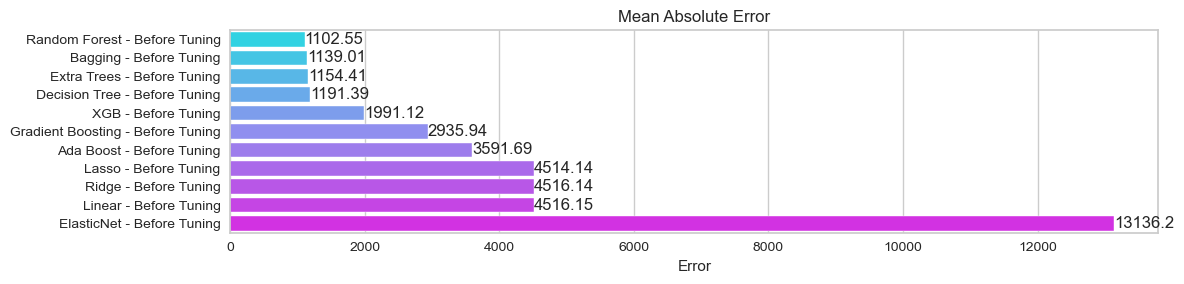

In [174]:
f, ax = plt.subplots(figsize=(12,3))
sns.barplot(data=compareModelBeforeTuningByMae, x='mae', y='model_type', palette='cool')
plt.title('Mean Absolute Error')
plt.xlabel('Error')
plt.ylabel('')
ax.bar_label(ax.containers[0])
plt.tight_layout()

#### **RMSE**

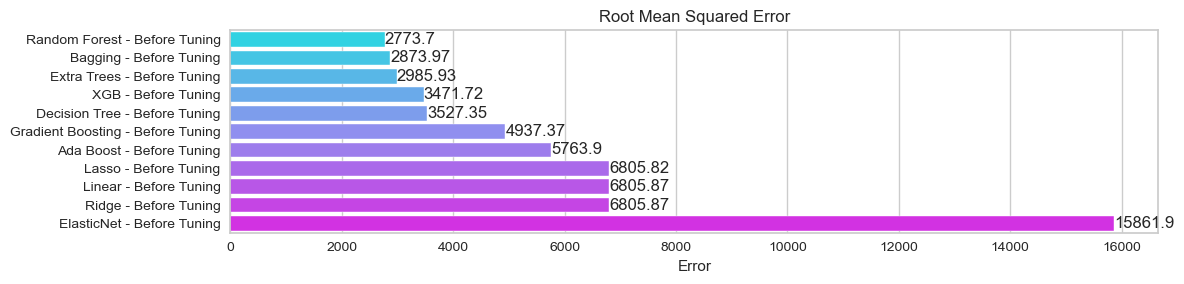

In [175]:
f, ax = plt.subplots(figsize=(12,3))
sns.barplot(data=compareModelBeforeTuningByRmse, x='rmse', y='model_type', palette='cool')
plt.title('Root Mean Squared Error')
plt.xlabel('Error')
plt.ylabel('')
ax.bar_label(ax.containers[0])
plt.tight_layout()

#### **R2 Score**

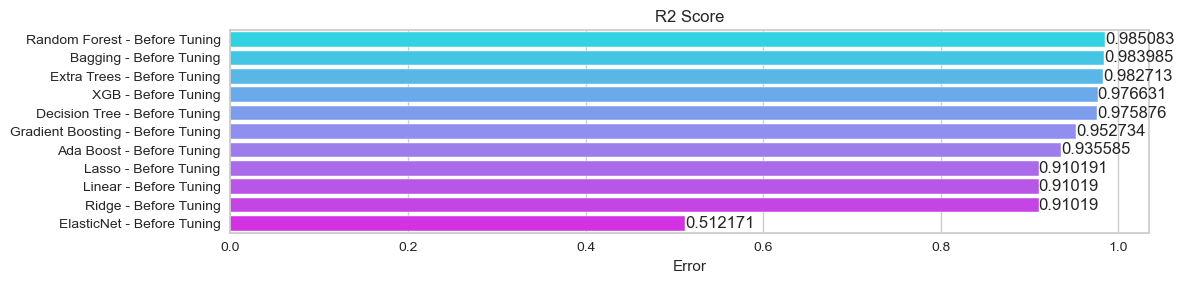

In [176]:
f, ax = plt.subplots(figsize=(12, 3))
sns.barplot(data=compareModelBeforeTuningByR2Score, x='r2_score', y='model_type', palette='cool')
plt.title('R2 Score')
plt.xlabel('Error')
plt.ylabel('')
ax.bar_label(ax.containers[0])
plt.tight_layout()

#### **Conclusion Evaluation Metrics --Best Model Before Tuning**
Tiga Model terbaik berdasarkan Evaluation Metrics di atas adalah:
  - Random Forest
  - Bagging
  - Extra Trees

### **K-Fold Cross Validation**

In [58]:
from sklearn.model_selection import ShuffleSplit, KFold, cross_val_score

def kFold(k=numOfFold): return KFold(n_splits=k, random_state=randomState_, shuffle=isShuffle)
def shuffleSplit(k=numOfFold): return ShuffleSplit(n_splits=k, test_size=testSize, random_state=randomState_)

def modelCVScore(x, y, mdl, cv): 
  cvScore = cross_val_score(mdl[1], x, y, cv=cv, scoring='neg_mean_absolute_error')
  cvScore = np.absolute(cvScore.mean())
  return pd.DataFrame([[mdl[0], cvScore]], columns=['model', 'mean_of_mae_5_Fold'])

In [59]:
modelRandomForestCVScore = modelCVScore(x_train, y_train, modelRandomForest, cv=kFold())
modelBaggingCVScore = modelCVScore(x_train, y_train, modelBagging, cv=kFold())
modelExtraTreesCVScore = modelCVScore(x_train, y_train, modelExtraTrees, cv=kFold())

In [60]:
compareModelCVScoreBeforeTuning = pd.concat([modelRandomForestCVScore, 
                                             modelExtraTreesCVScore, 
                                             modelBaggingCVScore]).reset_index(drop=True)
compareModelCVScoreBeforeTuning = compareModelCVScoreBeforeTuning.sort_values(['mean_of_mae_5_Fold'], ascending=True)
compareModelCVScoreBeforeTuning.reset_index(drop=True)

model  mean_of_mae_5_Fold
0  Random Forest         1142.841514
1        Bagging         1174.446199
2    Extra Trees         1192.551310

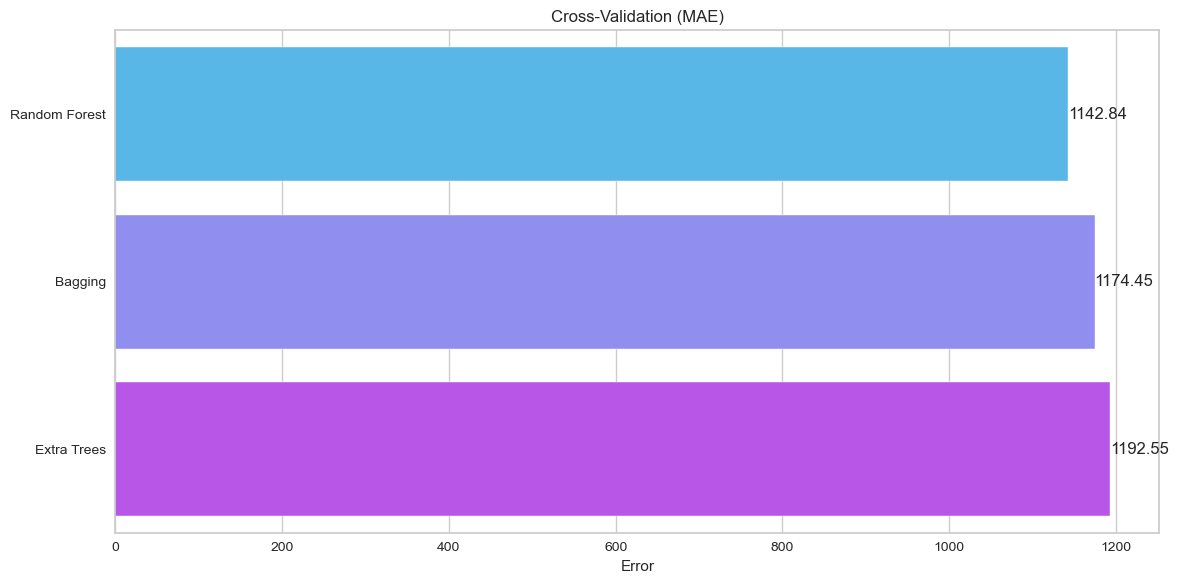

In [180]:
f, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=compareModelCVScoreBeforeTuning, x='mean_of_mae_5_Fold', y='model', palette='cool')
plt.title('Cross-Validation (MAE)')
plt.xlabel('Error')
plt.ylabel('')
ax.bar_label(ax.containers[0])
plt.tight_layout()

### **Conclusion Best Model**
Berdasarkan hasil Cross-Validation pada chart di atas, model Random Forest menunjukkan performa terbaik.

# **MODEL TUNING**

## **Feature Engineering**

In [62]:
dfModelT = data.copy()
dfModelT.drop(['Unnamed: 0','flight'], axis=1, inplace=True)
dfModelT['source_destination_city'] = dfModelT.source_city + '-' + dfModelT.destination_city

categoryColumns = []
for x in dfModelT.columns:
  if dfModelT[x].dtype == 'object':
    dfModelT[x] = dfModelT[x].astype('category')
    categoryColumns.append(x)

#preprocessing
dfModelT = dfPreprocessing1Func(dfModelT, categoryColumns)

#feature encoding
oneHotColumns = []
labelColumns = []
for x in categoryColumns:
  if x in ['stops', 'class']: labelColumns.append(x)
  else: oneHotColumns.append(x)

#label encoding
mappingLabel = [
  {
    'col': 'stops', 
    'mapping': {
      'zero': 0, 
      'one': 1, 
      'twoormore': 2
  }}, {
    'col': 'class', 
    'mapping': {
      'economy': 0,
      'business': 1
  }}]
dfModelT = ordinalEncoderFunc(dfModelT, labelColumns, mappingLabel)

#one-hot encoding
dfModelT = oheFunc(dfModelT, oneHotColumns)

print(f'Dimensions: {dfModelT.shape}')
dfModelT

Dimensions: (300153, 65)


duration  days_left  price  stops  class  airline_airasia  \
0           2.17          1   5953      0      0              0.0   
1           2.33          1   5953      0      0              0.0   
2           2.17          1   5956      0      0              1.0   
3           2.25          1   5955      0      0              0.0   
4           2.33          1   5955      0      0              0.0   
...          ...        ...    ...    ...    ...              ...   
300148     10.08         49  69265      1      1              0.0   
300149     10.42         49  77105      1      1              0.0   
300150     13.83         49  79099      1      1              0.0   
300151     10.00         49  81585      1      1              0.0   
300152     10.08         49  81585      1      1              0.0   

        airline_airindia  airline_gofirst  airline_indigo  airline_spicejet  \
0                    0.0              0.0             0.0               1.0   
1                    0.0              0.0             0.0               1.0   
2                    0.0              0.0             0.0               0.0   
3                    0.0              0.0             0.0               0.0   
4                    0.0              0.0             0.0               0.0   
...                  ...              ...             ...               ...   
300148               0.0              0.0             0.0               0.0   
300149               0.0              0.0             0.0               0.0   
300150               0.0              0.0             0.0               0.0   
300151               0.0              0.0             0.0               0.0   
300152               0.0              0.0             0.0               0.0   

        ...  source_destination_city_kolkata-bangalore  \
0       ...                                        0.0   
1       ...                                        0.0   
2       ...                                        0.0   
3       ...                                        0.0   
4       ...                                        0.0   
...     ...                                        ...   
300148  ...                                        0.0   
300149  ...                                        0.0   
300150  ...                                        0.0   
300151  ...                                        0.0   
300152  ...                                        0.0   

        source_destination_city_kolkata-chennai  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
...                                         ...   
300148                                      0.0   
300149                                      0.0   
300150                                      0.0   
300151                                      0.0   
300152                                      0.0   

        source_destination_city_kolkata-delhi  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
300148                                    0.0   
300149                                    0.0   
300150                                    0.0   
300151                                    0.0   
300152                                    0.0   

        source_destination_city_kolkata-hyderabad  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...          

## **Remove Outliers**

In [63]:
print('Dimension before remove outliers:', dfModelT.shape)
dfModelAfterTuningRmOutliers = dfModelT[((dfModelT.price > priceOutliers['lowerWhisker']) & (dfModelT.price < priceOutliers['upperWhisker'])) &
                    ((dfModelT.duration > durationOutliers['lowerWhisker']) & (dfModelT.duration < durationOutliers['upperWhisker'])) &
                    ((dfModelT.days_left > daysLeftOurliers['lowerWhisker']) & (dfModelT.days_left < daysLeftOurliers['upperWhisker']))].reset_index(drop=True)
print('Dimension after remove outliers:', dfModelAfterTuningRmOutliers.shape)

# dfModelAfterTuningRmOutliers.to_csv(index=False, path_or_buf='./db/clean-data-only-remove-outliers.csv')
dfModelAfterTuningRmOutliers

Dimension before remove outliers: (300153, 65)
Dimension after remove outliers: (297920, 65)


duration  days_left  price  stops  class  airline_airasia  \
0           2.17          1   5953      0      0              0.0   
1           2.33          1   5953      0      0              0.0   
2           2.17          1   5956      0      0              1.0   
3           2.25          1   5955      0      0              0.0   
4           2.33          1   5955      0      0              0.0   
...          ...        ...    ...    ...    ...              ...   
297915     10.08         49  69265      1      1              0.0   
297916     10.42         49  77105      1      1              0.0   
297917     13.83         49  79099      1      1              0.0   
297918     10.00         49  81585      1      1              0.0   
297919     10.08         49  81585      1      1              0.0   

        airline_airindia  airline_gofirst  airline_indigo  airline_spicejet  \
0                    0.0              0.0             0.0               1.0   
1                    0.0              0.0             0.0               1.0   
2                    0.0              0.0             0.0               0.0   
3                    0.0              0.0             0.0               0.0   
4                    0.0              0.0             0.0               0.0   
...                  ...              ...             ...               ...   
297915               0.0              0.0             0.0               0.0   
297916               0.0              0.0             0.0               0.0   
297917               0.0              0.0             0.0               0.0   
297918               0.0              0.0             0.0               0.0   
297919               0.0              0.0             0.0               0.0   

        ...  source_destination_city_kolkata-bangalore  \
0       ...                                        0.0   
1       ...                                        0.0   
2       ...                                        0.0   
3       ...                                        0.0   
4       ...                                        0.0   
...     ...                                        ...   
297915  ...                                        0.0   
297916  ...                                        0.0   
297917  ...                                        0.0   
297918  ...                                        0.0   
297919  ...                                        0.0   

        source_destination_city_kolkata-chennai  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
...                                         ...   
297915                                      0.0   
297916                                      0.0   
297917                                      0.0   
297918                                      0.0   
297919                                      0.0   

        source_destination_city_kolkata-delhi  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
297915                                    0.0   
297916                                    0.0   
297917                                    0.0   
297918                                    0.0   
297919                                    0.0   

        source_destination_city_kolkata-hyderabad  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...          

## **Feature Scaling**

In [64]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def minMaxScalerFunc(data, cols):
  for value in cols:
    data[value] = MinMaxScaler().fit_transform(data[[value]])
  return data

def standardScalerFunc(data, cols):
  for value in cols:
    data[value] = StandardScaler().fit_transform(data[[value]])
  return data

In [65]:
dfModelAfterTuningRmOutliersScaling = dfModelAfterTuningRmOutliers.copy()

# standard = days_left
dfModelAfterTuningRmOutliersScaling = standardScalerFunc(dfModelAfterTuningRmOutliersScaling, ['days_left'])
# normalize = duration
dfModelAfterTuningRmOutliersScaling = minMaxScalerFunc(dfModelAfterTuningRmOutliersScaling, ['duration'])

dfModelAfterTuningRmOutliersScaling

duration  days_left  price  stops  class  airline_airasia  \
0       0.045671  -1.847975   5953      0      0              0.0   
1       0.051125  -1.847975   5953      0      0              0.0   
2       0.045671  -1.847975   5956      0      0              1.0   
3       0.048398  -1.847975   5955      0      0              0.0   
4       0.051125  -1.847975   5955      0      0              0.0   
...          ...        ...    ...    ...    ...              ...   
297915  0.315269   1.694558  69265      1      1              0.0   
297916  0.326858   1.694558  77105      1      1              0.0   
297917  0.443081   1.694558  79099      1      1              0.0   
297918  0.312543   1.694558  81585      1      1              0.0   
297919  0.315269   1.694558  81585      1      1              0.0   

        airline_airindia  airline_gofirst  airline_indigo  airline_spicejet  \
0                    0.0              0.0             0.0               1.0   
1                    0.0              0.0             0.0               1.0   
2                    0.0              0.0             0.0               0.0   
3                    0.0              0.0             0.0               0.0   
4                    0.0              0.0             0.0               0.0   
...                  ...              ...             ...               ...   
297915               0.0              0.0             0.0               0.0   
297916               0.0              0.0             0.0               0.0   
297917               0.0              0.0             0.0               0.0   
297918               0.0              0.0             0.0               0.0   
297919               0.0              0.0             0.0               0.0   

        ...  source_destination_city_kolkata-bangalore  \
0       ...                                        0.0   
1       ...                                        0.0   
2       ...                                        0.0   
3       ...                                        0.0   
4       ...                                        0.0   
...     ...                                        ...   
297915  ...                                        0.0   
297916  ...                                        0.0   
297917  ...                                        0.0   
297918  ...                                        0.0   
297919  ...                                        0.0   

        source_destination_city_kolkata-chennai  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
...                                         ...   
297915                                      0.0   
297916                                      0.0   
297917                                      0.0   
297918                                      0.0   
297919                                      0.0   

        source_destination_city_kolkata-delhi  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
297915                                    0.0   
297916                                    0.0   
297917                                    0.0   
297918                                    0.0   
297919                                    0.0   

        source_destination_city_kolkata-hyderabad  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...          

In [66]:
# export dataset
# dfModelAfterTuningRmOutliersScaling.to_csv(index=False, path_or_buf='./db/clean-data-scaling-remove-outliers.csv')

In [67]:
x = dfModelAfterTuningRmOutliersScaling.drop(['price'], axis=1)
y = dfModelAfterTuningRmOutliersScaling.price
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=testSize, random_state=randomState_)

modelRandomForestAfterTuning = modelEvaluation(x_train,x_test,y_train,y_test,modelRandomForest)

In [68]:
modelRandomForestAfterTuning['model_type'] = modelRandomForestAfterTuning.model + ' - After Tuning (Scaling & Outliers & Feature Engineering)'
modelRandomForestBeforeTuning['model_type'] = modelRandomForestBeforeTuning.model + ' - Before Tuning'
compareModelBeforeAfterTuning = pd.concat([modelRandomForestAfterTuning, 
                                           modelRandomForestBeforeTuning]).reset_index(drop=True)
compareModelBeforeAfterTuning

model          mae         rmse  r2_score  \
0  Random Forest  1083.966963  2722.810746  0.985571   
1  Random Forest  1102.548382  2773.698040  0.985083   

                                          model_type  
0  Random Forest - After Tuning (Scaling & Outlie...  
1                      Random Forest - Before Tuning

## **Random Forest Manual Tuning**

### **max_depth**

In [69]:
maxDepth_ = [10, 20, 30, 40]
trainAccMaxDepth = []
testAccMaxDepth = []
for value in maxDepth_: 
  rf = RandomForestRegressor(random_state = randomState_, max_depth = value, n_jobs=-1, oob_score=True)
  rf.fit(x_train, y_train)
  yPredTrain = rf.predict(x_train)
  yPredTest = rf.predict(x_test)
  trainScore = r2_score(y_train, yPredTrain)
  testScore = r2_score(y_test, yPredTest)
  trainAccMaxDepth.append(trainScore)
  testAccMaxDepth.append(testScore)
  print(f'max_depth: {value} \t acc: {testScore}')

max_depth: 10 	 acc: 0.9618223514498889
max_depth: 20 	 acc: 0.9801851190884275
max_depth: 30 	 acc: 0.9856995395861552
max_depth: 40 	 acc: 0.9856597763793482


Text(0.5, 66.24999999999999, 'max_depth')

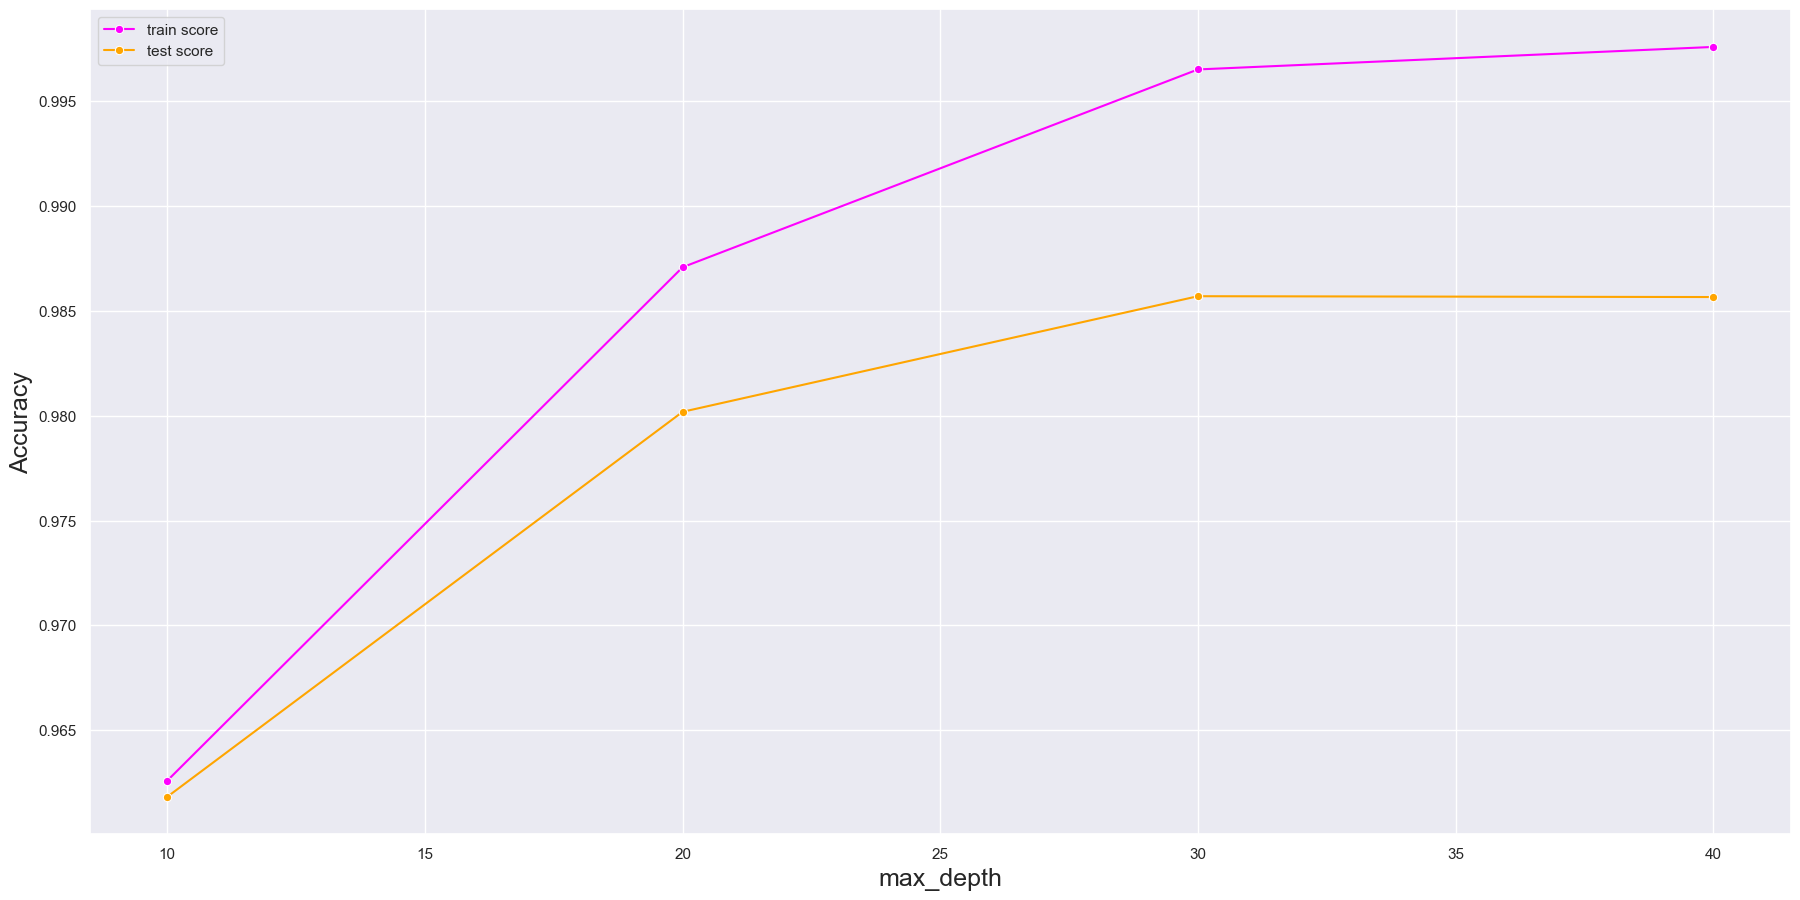

In [70]:
f, ax = plt.subplots(figsize=(18,9))
sns.lineplot(x=maxDepth_, y=trainAccMaxDepth, color='magenta', label='train score', marker='o')
sns.lineplot(x=maxDepth_, y=testAccMaxDepth, color='orange', label='test score', marker='o')
plt.tight_layout()
plt.ylabel('Accuracy')
plt.xlabel('max_depth')

### **min_samples_leaf**

In [71]:
minSamplesLeaf_ = [1,2,3,4]
trainAccMinSamplesLeaf = []
testAccMinSamplesLeaf = []
for value in minSamplesLeaf_: 
  rf = RandomForestRegressor(random_state = randomState_, min_samples_leaf=value, n_jobs=-1, oob_score=True)
  rf.fit(x_train, y_train)
  yPredTrain = rf.predict(x_train)
  yPredTest = rf.predict(x_test)
  trainScore = r2_score(y_train, yPredTrain)
  testScore = r2_score(y_test, yPredTest)
  trainAccMinSamplesLeaf.append(trainScore)
  testAccMinSamplesLeaf.append(testScore)
  print(f'min_samples_leaf: {value} \t acc: {testScore}')

min_samples_leaf: 1 	 acc: 0.9856250785012634
min_samples_leaf: 2 	 acc: 0.9864701262296699
min_samples_leaf: 3 	 acc: 0.9865705030932108
min_samples_leaf: 4 	 acc: 0.9864435803349333


Text(0.5, 66.24999999999999, 'min_samples_leaf')

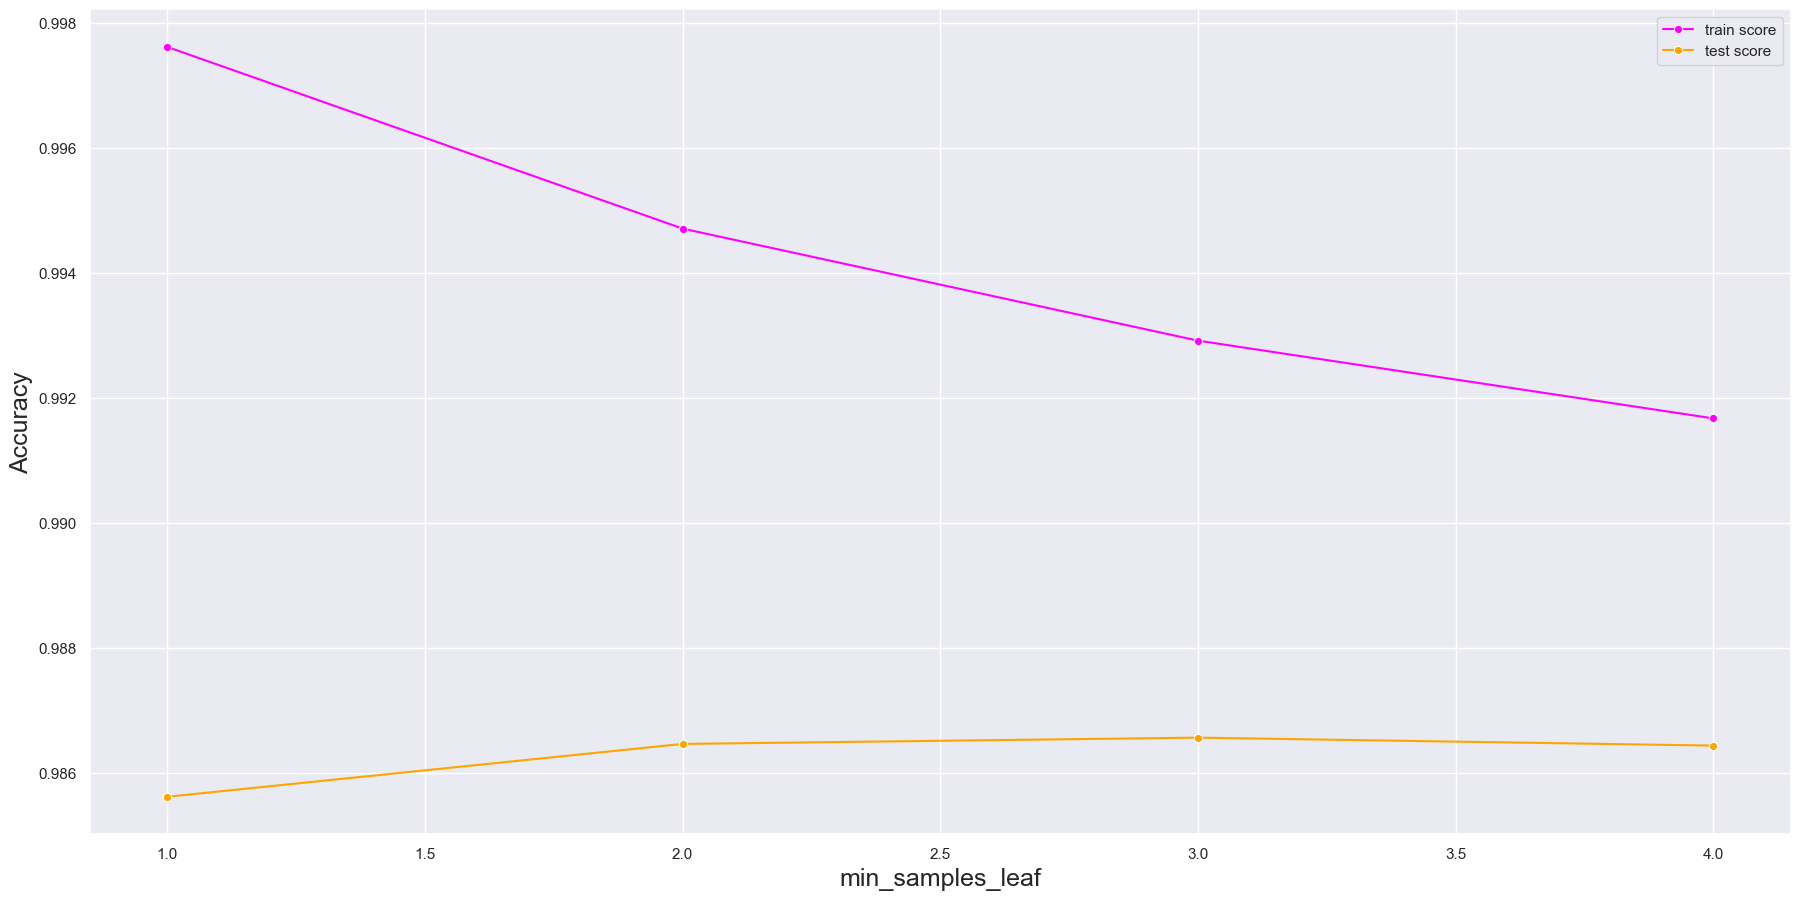

In [72]:
f, ax = plt.subplots(figsize=(18,9))
sns.lineplot(x=minSamplesLeaf_, y=trainAccMinSamplesLeaf, color='magenta', label='train score', marker='o')
sns.lineplot(x=minSamplesLeaf_, y=testAccMinSamplesLeaf, color='orange', label='test score', marker='o')
plt.tight_layout()
plt.ylabel('Accuracy')
plt.xlabel('min_samples_leaf')

### **max_features**

In [73]:
maxFeatures_ = [15,30,45,60]
trainAccMaxFeatures = []
testAccMaxFeatures = []
for value in maxFeatures_: 
  rf = RandomForestRegressor(random_state = randomState_, max_features=value, n_jobs=-1, oob_score=True)
  rf.fit(x_train, y_train)
  yPredTrain = rf.predict(x_train)
  yPredTest = rf.predict(x_test)
  trainScore = r2_score(y_train, yPredTrain)
  testScore = r2_score(y_test, yPredTest)
  trainAccMaxFeatures.append(trainScore)
  testAccMaxFeatures.append(testScore)
  print(f'max_features: {value} \t acc: {testScore}')

max_features: 15 	 acc: 0.9847440926370847
max_features: 30 	 acc: 0.9851887932949109
max_features: 45 	 acc: 0.9854773714666656
max_features: 60 	 acc: 0.9856112213606114


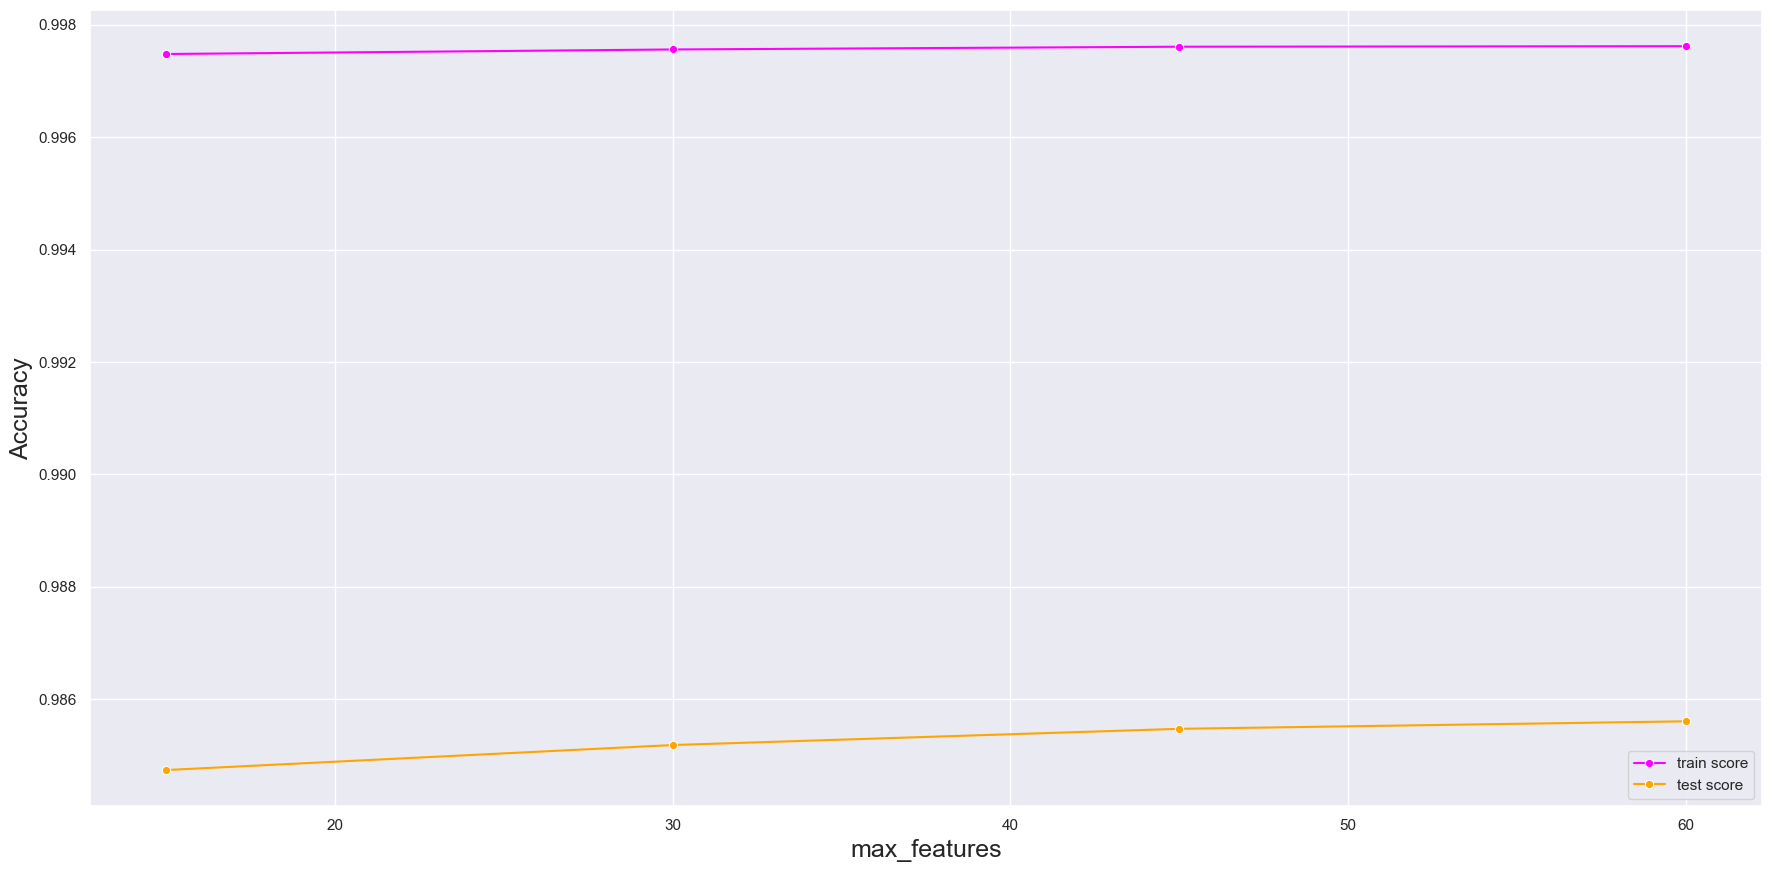

In [74]:
f, ax = plt.subplots(figsize=(18,9))
sns.lineplot(x=maxFeatures_, y=trainAccMaxFeatures, color='magenta', label='train score', marker='o')
sns.lineplot(x=maxFeatures_, y=testAccMaxFeatures, color='orange', label='test score', marker='o')
plt.ylabel('Accuracy')
plt.xlabel('max_features')
# plt.ylim(0.95, 1)
plt.tight_layout()

### **n_estimators**

In [75]:
nEstimators_ = [150,300,450,600]
trainAccNEstimators = []
testAccNEstimators = []
for value in nEstimators_: 
  rf = RandomForestRegressor(random_state=randomState_, n_estimators=value, n_jobs=-1, oob_score=True)
  rf.fit(x_train, y_train)
  yPredTrain = rf.predict(x_train)
  yPredTest = rf.predict(x_test)
  trainScore = r2_score(y_train, yPredTrain)
  testScore = r2_score(y_test, yPredTest)
  trainAccNEstimators.append(trainScore)
  testAccNEstimators.append(testScore)
  print(f'n_estimators: {value} \t acc: {testScore}')

n_estimators: 150 	 acc: 0.9856703555113598
n_estimators: 300 	 acc: 0.9856994334164197
n_estimators: 450 	 acc: 0.9857100524067676
n_estimators: 600 	 acc: 0.9857182111558075


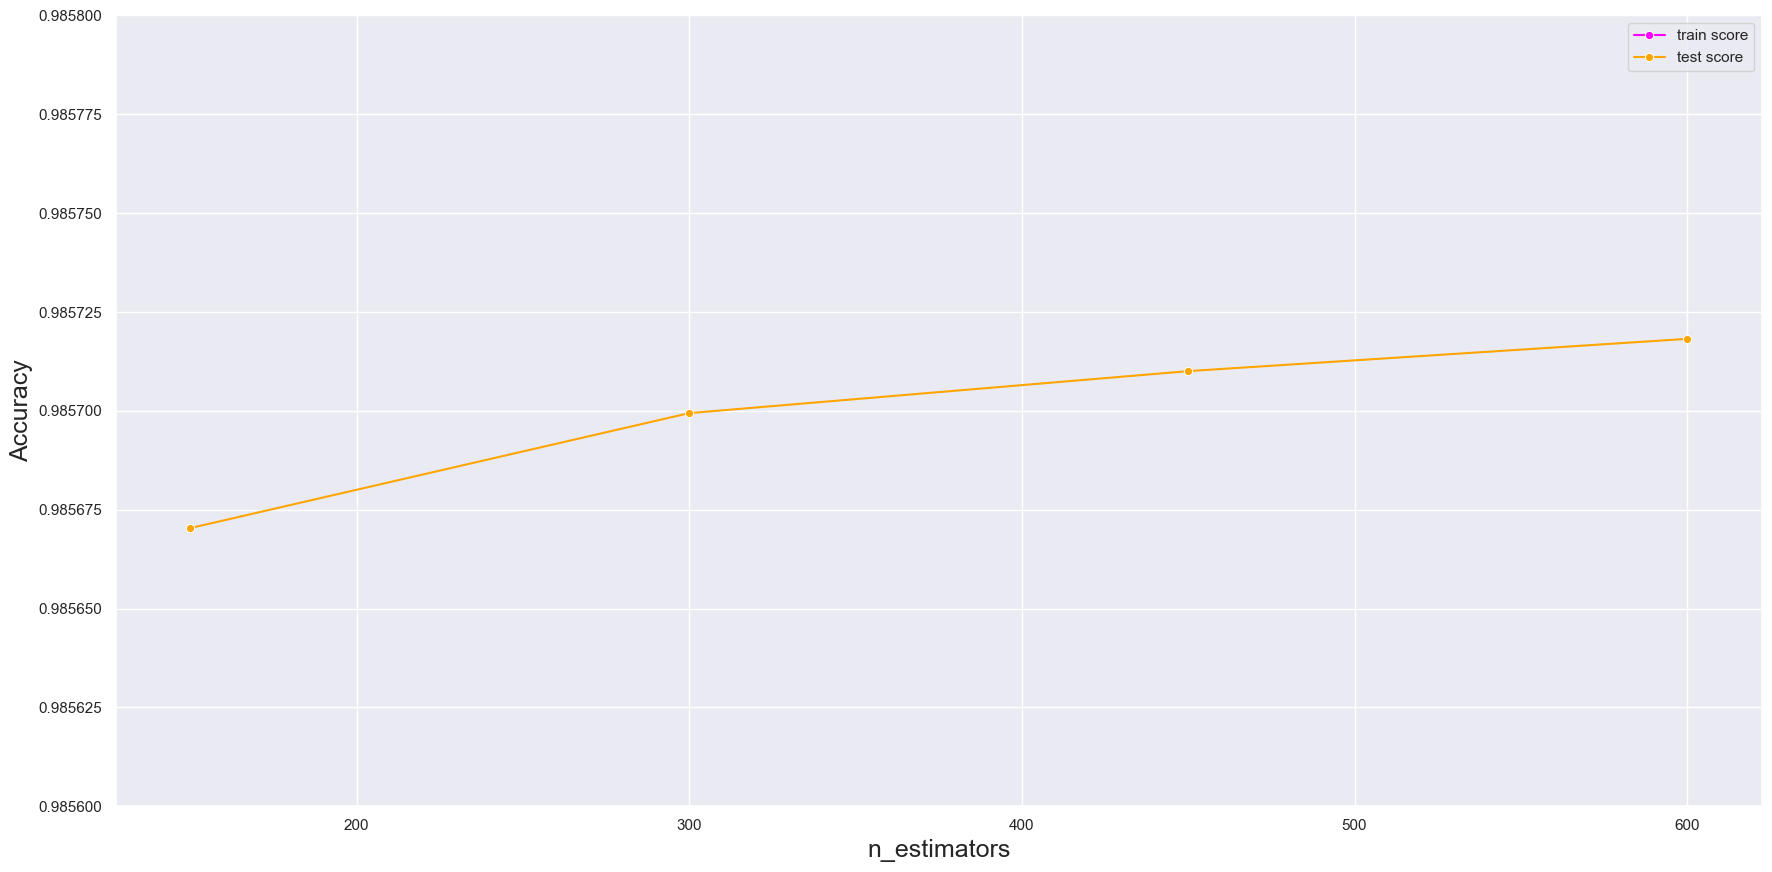

In [76]:
f, ax = plt.subplots(figsize=(18,9))
sns.lineplot(x=nEstimators_, y=trainAccNEstimators, color='magenta', label='train score', marker='o')
sns.lineplot(x=nEstimators_, y=testAccNEstimators, color='orange', label='test score', marker='o')
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.ylim(0.9856, 0.9858)
plt.tight_layout()


### **Best Param Random Forest (Manual)**
  - max_depth = 30
  - min_samples_leaf = 3
  - max_features = 60
  - n_estimators = 600
  - n_jobs = -1
  - random_state
  - oob_score = True

## **Hyperparameter**

In [77]:
# !pip install --upgrade scikit-learn
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, KFold

In [78]:
# def kFold(k=numOfFold): return KFold(n_splits=k, random_state=randomState_, shuffle=isShuffle)
# def shuffleSplit(k=numOfFold): return ShuffleSplit(n_splits=k, test_size=testSize, random_state=randomState_)

def bestModelUsingGSCV(xTrain, yTrain):
  scores = []
  for key, value in bestModelAlgorithm.items():
    gscv = GridSearchCV(
      estimator=value['model'],
      param_grid=value['params'], 
      cv=2,
      scoring='neg_mean_absolute_error')
    gscv.fit(xTrain, yTrain)
    scores.append({
      'model': key,
      'gscv_best_score': gscv.best_score_,
      'gscv_best_params': gscv.best_params_
    })
  return pd.DataFrame(scores,columns=['model', 'gscv_best_score', 'gscv_best_params'])
  
def bestModelUsingHGSCV(xTrain, yTrain):
  scores = []
  for key, value in bestModelAlgorithm.items():
    hgscv = HalvingGridSearchCV(
      estimator=value['model'],
      param_grid=value['params'], 
      cv=2,
      scoring='neg_mean_absolute_error')
    hgscv.fit(xTrain, yTrain)
    scores.append({
      'model': key,
      'hgscv_best_score': np.absolute(hgscv.best_score_),
      'hgscv_best_params': hgscv.best_params_
    })
  return pd.DataFrame(scores,columns=['model', 'hgscv_best_score', 'hgscv_best_params'])

nEstimators = [150, 600]
maxFeatures = [10, 30]
maxDepth = [15, 60]
minSamplesLeaf = [2, 3, 4]

bestModelAlgorithm = {
  'randomForestRegression': {
    'model': RandomForestRegressor(),
    'params': {
      'n_estimators': nEstimators,
      'max_features': maxFeatures,
      'max_depth': maxDepth,
      'min_samples_leaf': minSamplesLeaf,
      'random_state': [randomState_],
      'n_jobs': [-1],
      'oob_score': [True]
      }}
}

In [79]:
modelRandomForestHyperTuning = bestModelUsingHGSCV(x_train, y_train)

In [80]:
modelRandomForestHyperTuning

model  hgscv_best_score  \
0  randomForestRegression       1318.927018   

                                   hgscv_best_params  
0  {'max_depth': 60, 'max_features': 30, 'min_sam...

In [81]:
for key, value in modelRandomForestHyperTuning.hgscv_best_params.to_list()[0].items():
  print(f'{key}: {value}')
  exec(f'{key} = value') #all key and value to variable

max_depth: 60
max_features: 30
min_samples_leaf: 2
n_estimators: 600
n_jobs: -1
oob_score: True
random_state: 0


In [82]:
randomForestManualParam = ['Random Forest', RandomForestRegressor(
  max_depth=60,
  max_features= 30,
  min_samples_leaf=3,
  n_estimators=600,
  n_jobs=-1,
  oob_score=True,
  random_state=randomState_
)]
randomForestHyperparameter = ['Random Forest', RandomForestRegressor(
  max_depth=max_depth,
  max_features=max_features,
  min_samples_leaf=min_samples_leaf,
  n_estimators=n_estimators,
  n_jobs=n_jobs,
  oob_score=oob_score,
  random_state=random_state
)]

In [83]:
modelRandomForestAfterManualParam = modelEvaluation(x_train,x_test,y_train,y_test,randomForestManualParam)
modelRandomForestAfterHyperparameter = modelEvaluation(x_train,x_test,y_train,y_test,randomForestHyperparameter)

## **Comparing**

In [84]:
modelRandomForestAfterManualParam['model_type'] = modelRandomForestAfterManualParam.model + ' - After Tuning+ (Manual Param)'
modelRandomForestAfterHyperparameter['model_type'] = modelRandomForestAfterHyperparameter.model + ' - After Tuning+ (HGSCV)'

compareBestModel = pd.concat([modelRandomForestAfterManualParam, 
                              modelRandomForestAfterHyperparameter,
                              modelRandomForestAfterTuning,
                              modelRandomForestBeforeTuning]).reset_index(drop=True)

compareBestModelByMae = compareBestModel.sort_values(['mae'], ascending=True)
compareBestModelByRmse = compareBestModel.sort_values(['rmse'], ascending=True)
compareBestModelByR2Score = compareBestModel.sort_values(['r2_score'], ascending=False)

compareBestModel

model          mae         rmse  r2_score  \
0  Random Forest  1197.625913  2654.706770  0.986284   
1  Random Forest  1153.821347  2650.823483  0.986324   
2  Random Forest  1083.966963  2722.810746  0.985571   
3  Random Forest  1102.548382  2773.698040  0.985083   

                                          model_type  
0       Random Forest - After Tuning+ (Manual Param)  
1              Random Forest - After Tuning+ (HGSCV)  
2  Random Forest - After Tuning (Scaling & Outlie...  
3                      Random Forest - Before Tuning

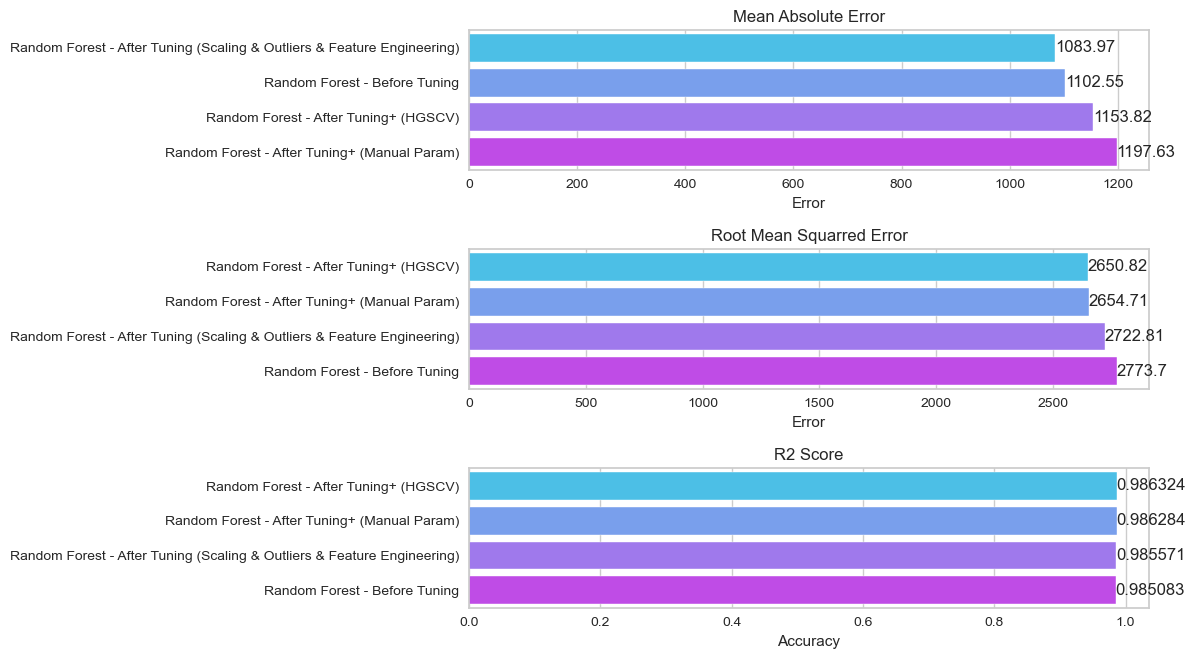

In [181]:
f, ax = plt.subplots(3, 1, figsize=(12,6.75))
sns.barplot(ax=ax[0], data=compareBestModelByMae, x='mae', y='model_type', palette='cool')
sns.barplot(ax=ax[1], data=compareBestModelByRmse, x='rmse', y='model_type', palette='cool')
sns.barplot(ax=ax[2], data=compareBestModelByR2Score, x='r2_score', y='model_type', palette='cool')
ax[0].set_title('Mean Absolute Error')
ax[1].set_title('Root Mean Squarred Error')
ax[2].set_title('R2 Score')
ax[0].set_xlabel('Error')
ax[1].set_xlabel('Error')
ax[2].set_xlabel('Accuracy')
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])
ax[2].bar_label(ax[2].containers[0])
plt.tight_layout()

## **Conclusion Best Random Forest Model**
Berdasarkan chart score di atas, model dengan performa terbaik adalah model **Random Forest Manual Parameter - After Tuning+ (HGSCV)**. Walaupun mempunyai MAE yang lebih besar, model ini memiliki RMSE dan R2 (Accuracy) terbaik.

# **MODEL BUILDING**

In [86]:
x = dfModelAfterTuningRmOutliersScaling.drop(['price'], axis=1)
y = dfModelAfterTuningRmOutliersScaling.price
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=testSize, random_state=randomState_)

In [87]:
bestModelScore = modelEvaluation(x_train,x_test,y_train,y_test,randomForestHyperparameter)
bestModelScore


model          mae         rmse  r2_score
0  Random Forest  1153.821347  2650.823483  0.986324

In [88]:
model = RandomForestRegressor(
  max_depth=max_depth,
  max_features=max_features,
  min_samples_leaf=min_samples_leaf,
  n_estimators=n_estimators,
  n_jobs=n_jobs,
  oob_score=oob_score,
  random_state=random_state
)

model.fit(x_train, y_train)

RandomForestRegressor(max_depth=60, max_features=30, min_samples_leaf=2,
                      n_estimators=600, n_jobs=-1, oob_score=True,
                      random_state=0)

## **Overfit Test**

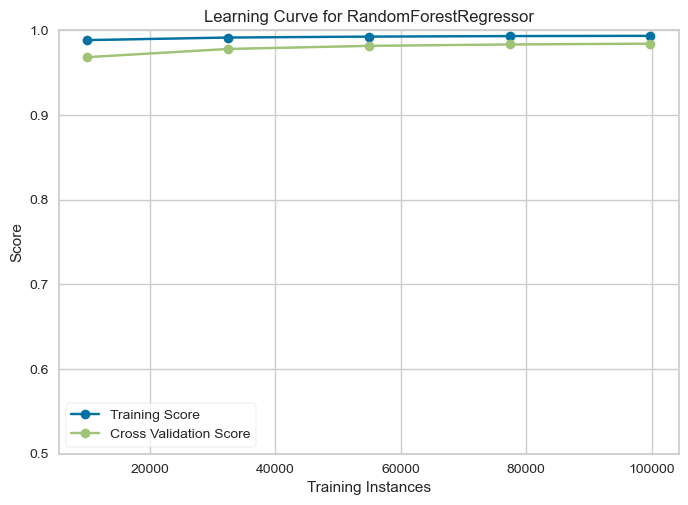

<AxesSubplot: title={'center': 'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [89]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
                model, 
                scoring='r2', 
                n_jobs=-1, 
                random_state=randomState_,
                cv=kFold(2))
visualizer.fit(x_train, y_train)        # Fit the data to the visualizer
visualizer.ax.set_ylim(0.5,1)
visualizer.show()

# **MODEL WITHOUT SOURCE_DESTINATION**

In [128]:
dfModel_0 = data.copy()
dfModel_0.drop(['Unnamed: 0','flight'], axis=1, inplace=True)
categoryColumns_0 = []
for x in dfModel_0.columns:
  if dfModel_0[x].dtype == 'object':
    dfModel_0[x] = dfModel_0[x].astype('category')
    categoryColumns_0.append(x)
dfModel_0 = dfPreprocessing1Func(dfModel_0, categoryColumns_0)
oneHotColumns_0 = []
labelColumns_0 = []
for x in categoryColumns_0:
  if x in ['stops', 'class']: labelColumns_0.append(x)
  else: oneHotColumns_0.append(x)
mappingLabel = [
  {
    'col': 'stops', 
    'mapping': {
      'zero': 0, 
      'one': 1, 
      'twoormore': 2
  }}, {
    'col': 'class', 
    'mapping': {
      'economy': 0,
      'business': 1
  }}]
dfModel_0 = ordinalEncoderFunc(dfModel_0, labelColumns, mappingLabel)
dfModel_0 = oheFunc(dfModel_0, oneHotColumns_0)
dfModelAfterTuningRmOutliers_0 = dfModel_0[((dfModel_0.price > priceOutliers['lowerWhisker']) & (dfModel_0.price < priceOutliers['upperWhisker'])) &
                    ((dfModel_0.duration > durationOutliers['lowerWhisker']) & (dfModel_0.duration < durationOutliers['upperWhisker'])) &
                    ((dfModel_0.days_left > daysLeftOurliers['lowerWhisker']) & (dfModel_0.days_left < daysLeftOurliers['upperWhisker']))].reset_index(drop=True)

dfModelAfterTuningRmOutliersScaling_0 = dfModelAfterTuningRmOutliers_0.copy()
dfModelAfterTuningRmOutliersScaling_0.days_left = StandardScaler().fit_transform(dfModelAfterTuningRmOutliersScaling_0[['days_left']])
dfModelAfterTuningRmOutliersScaling_0.duration = MinMaxScaler().fit_transform(dfModelAfterTuningRmOutliersScaling_0[['duration']])

In [242]:
len(dfModelAfterTuningRmOutliersScaling_0.columns)

35

In [222]:
# export dataset yang ini untuk model funtion di paling bawah outline
dfModel_15 = data.copy()
dfModel_15.drop(['Unnamed: 0','flight'], axis=1, inplace=True)
categoryColumns_15 = []
for x in dfModel_15.columns:
  if dfModel_15[x].dtype == 'object':
    dfModel_15[x] = dfModel_15[x].astype('category')
    categoryColumns_15.append(x)
dfModel_15 = dfPreprocessing1Func(dfModel_15, categoryColumns_15)
dfModelAfterTuningRmOutliers_15 = dfModel_15[((dfModel_15.price > priceOutliers['lowerWhisker']) & (dfModel_15.price < priceOutliers['upperWhisker'])) &
                    ((dfModel_15.duration > durationOutliers['lowerWhisker']) & (dfModel_15.duration < durationOutliers['upperWhisker'])) &
                    ((dfModel_15.days_left > daysLeftOurliers['lowerWhisker']) & (dfModel_15.days_left < daysLeftOurliers['upperWhisker']))].reset_index(drop=True)
dfModelAfterTuningRmOutliers_15.to_csv(index=False, path_or_buf='./db/clean-data-only-remove-outliers-without-encoding-scaling-feature-engineering.csv')


In [244]:
len(dfModelAfterTuningRmOutliers_15.columns)

10

In [194]:
dfModelAfterTuningRmOutliersScaling_0.to_csv(index=False, path_or_buf='./db/clean-data-scaling-remove-outliers-without-feature-engineering.csv')
dfModelAfterTuningRmOutliers_0.to_csv(index=False, path_or_buf='./db/clean-data-remove-outliers-without-scaling-feature-engineering.csv')

In [129]:
x_0 = dfModelAfterTuningRmOutliersScaling_0.drop(['price'], axis=1)
y_0 = dfModelAfterTuningRmOutliersScaling_0.price
x_train_0, x_test_0, y_train_0, y_test_0=train_test_split(x_0, y_0, test_size=testSize, random_state=randomState_)

model_0 = RandomForestRegressor(
  max_depth=max_depth,
  max_features=max_features,
  min_samples_leaf=min_samples_leaf,
  n_estimators=n_estimators,
  n_jobs=n_jobs,
  oob_score=oob_score,
  random_state=random_state
)

model_0.fit(x_train_0, y_train_0)

RandomForestRegressor(max_depth=60, max_features=30, min_samples_leaf=2,
                      n_estimators=600, n_jobs=-1, oob_score=True,
                      random_state=0)

## **Overfit Test**

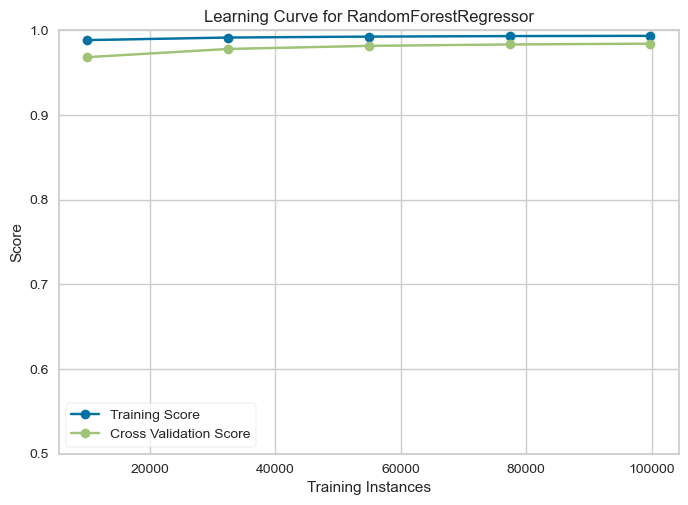

<AxesSubplot: title={'center': 'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [130]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
                model_0, 
                scoring='r2', 
                n_jobs=-1, 
                random_state=randomState_,
                cv=kFold(2))
visualizer.fit(x_train, y_train)        # Fit the data to the visualizer
visualizer.ax.set_ylim(0.5,1)
visualizer.show()

In [131]:
bestModelScore_0 = modelEvaluation(x_train_0,x_test_0,y_train_0,y_test_0,randomForestHyperparameter)

# **COMPARING BEST MODEL**

In [133]:
bestModelScore['model_type'] = bestModelScore.model + ' - (source_destination_feature)'
bestModelScore_0['model_type'] = bestModelScore_0.model + ' - (without_additional_feature)'

compareBestModelScoreFeature = pd.concat([bestModelScore_0, bestModelScore]).reset_index(drop=True)
compareBestModelScoreFeatureByMae = compareBestModelScoreFeature.sort_values(['mae'], ascending=True)
compareBestModelScoreFeatureByRmse = compareBestModelScoreFeature.sort_values(['rmse'], ascending=True)
compareBestModelScoreFeatureByR2Score = compareBestModelScoreFeature.sort_values(['r2_score'], ascending=False)

compareBestModelScoreFeature

model          mae         rmse  r2_score  \
0  Random Forest  1097.622623  2622.595178  0.986614   
1  Random Forest  1153.821347  2650.823483  0.986324   

                                     model_type  
0  Random Forest - (without_additional_feature)  
1  Random Forest - (source_destination_feature)

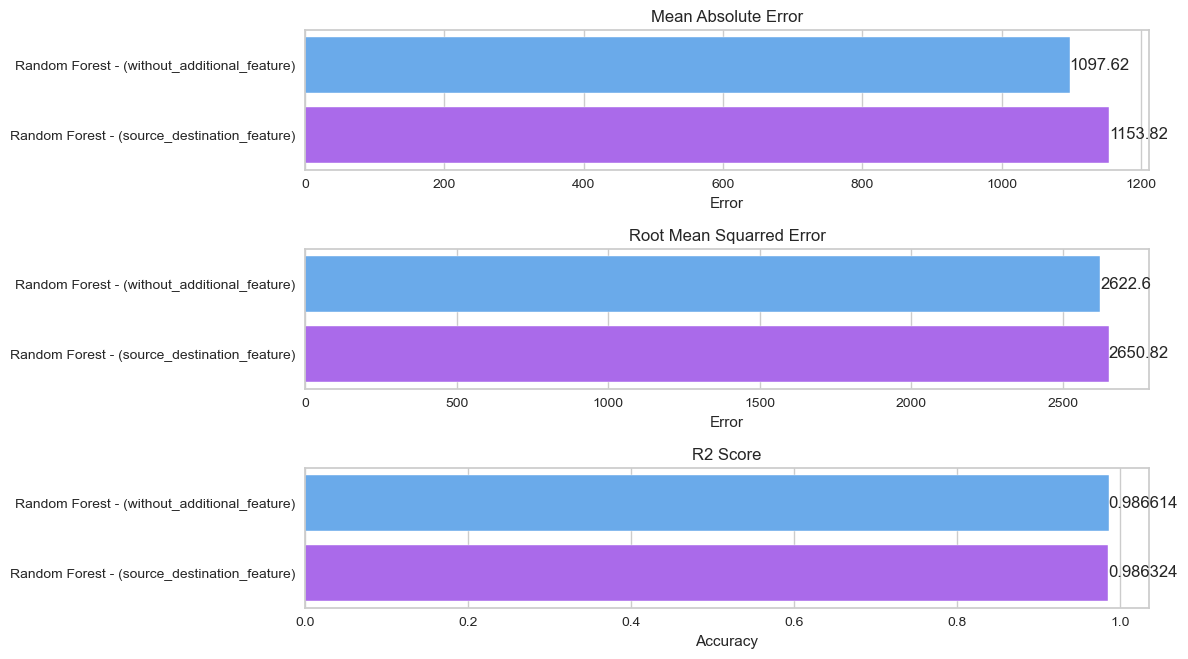

In [182]:
f, ax = plt.subplots(3, 1, figsize=(12,6.75))
sns.barplot(ax=ax[0], data=compareBestModelScoreFeatureByMae, x='mae', y='model_type', palette='cool')
sns.barplot(ax=ax[1], data=compareBestModelScoreFeatureByRmse, x='rmse', y='model_type', palette='cool')
sns.barplot(ax=ax[2], data=compareBestModelScoreFeatureByR2Score, x='r2_score', y='model_type', palette='cool')
ax[0].set_title('Mean Absolute Error')
ax[1].set_title('Root Mean Squarred Error')
ax[2].set_title('R2 Score')
ax[0].set_xlabel('Error')
ax[1].set_xlabel('Error')
ax[2].set_xlabel('Accuracy')
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])
ax[2].bar_label(ax[2].containers[0])
plt.tight_layout()

## **Conclusion Best Random Forest Model**
Berdasarkan chart score di atas, model dengan performa terbaik adalah model **Random Forest Tanpa Feature Tambahan (source_destination_city)**. Model ini memiliki score MAE, RMSE, dan R2 (Accuracy) yang lebih baik.

# **PICKLE**

In [230]:
import pickle

pickle.dump(model_0, open('./model/rf-best-model.pkl', 'wb'))

# **FEATURE IMPORTANCE**

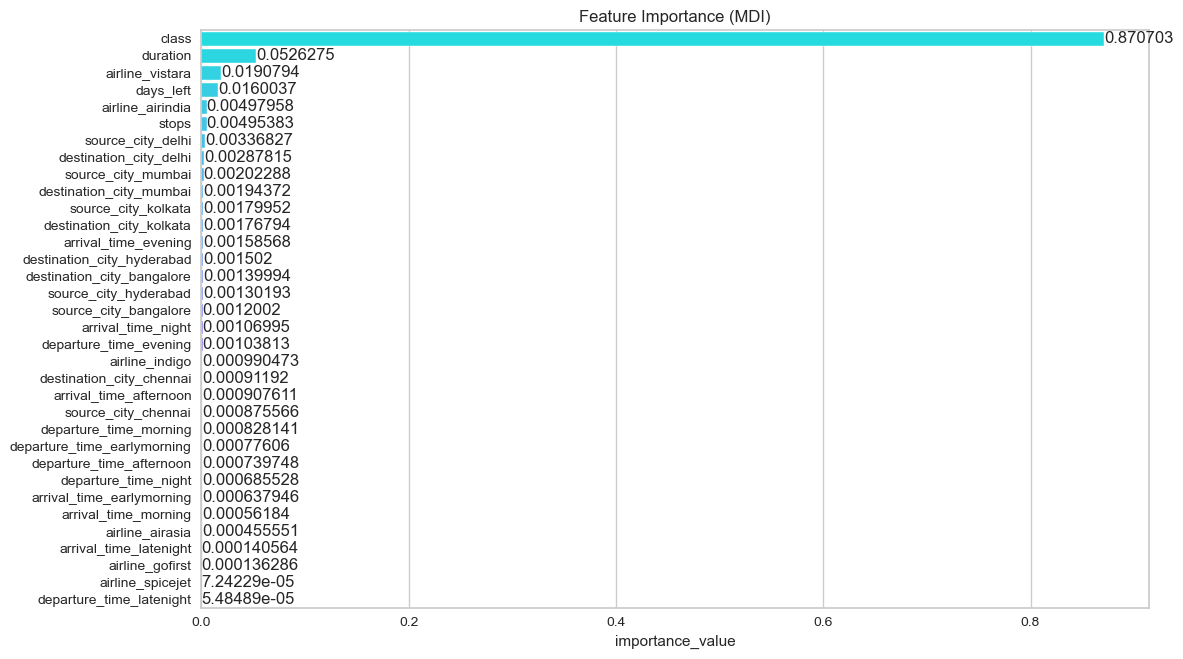

In [183]:
importanceIndex_0 = dfModelAfterTuningRmOutliersScaling_0.columns.to_list()
importanceIndex_0.remove('price')
importances_0 = model_0.feature_importances_
featureImportanceMDI_0 = pd.DataFrame(list(zip(importanceIndex_0, importances_0)), columns=['feature_name', 'importance_value'])

f, ax = plt.subplots(figsize=(12,6.75))

sns.barplot(y='feature_name', 
            x='importance_value', 
            data=featureImportanceMDI_0.sort_values('importance_value', ascending=False), 
            palette='cool')

ax.bar_label(ax.containers[0])
plt.title('Feature Importance (MDI)')
plt.ylabel('')
plt.tight_layout()

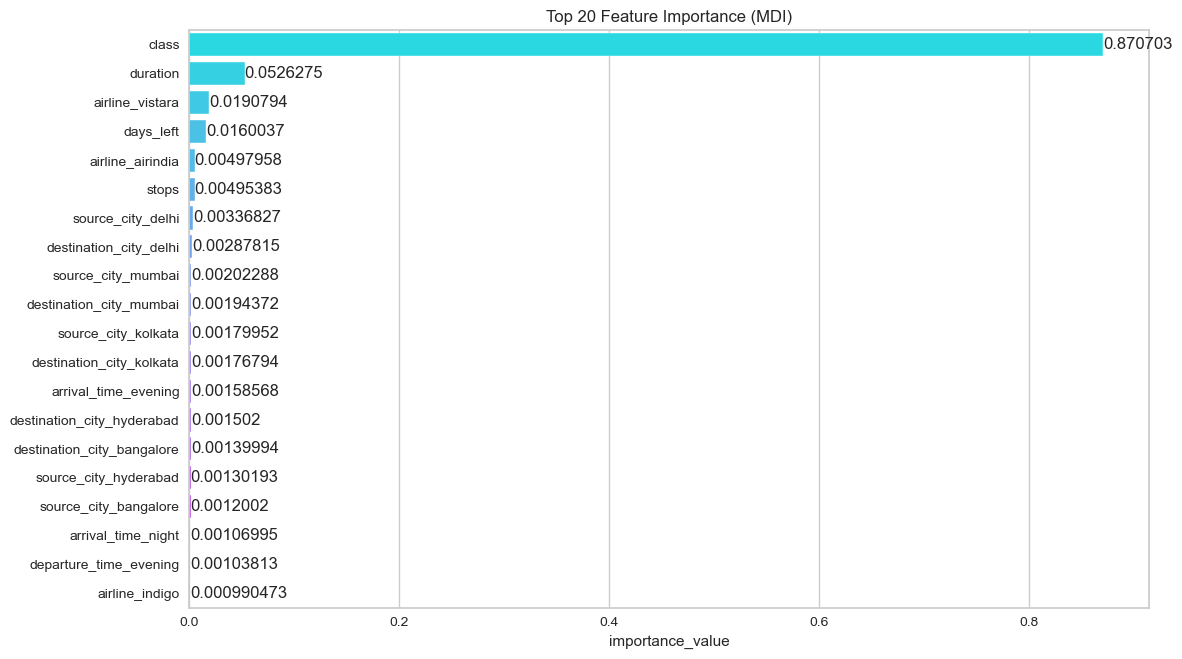

In [185]:
importanceIndex_0 = dfModelAfterTuningRmOutliersScaling_0.columns.to_list()
importanceIndex_0.remove('price')
importances_0 = model_0.feature_importances_
featureImportanceMDI_0 = pd.DataFrame(list(zip(importanceIndex_0, importances_0)), columns=['feature_name', 'importance_value'])

f, ax = plt.subplots(figsize=(12,6.75))

sns.barplot(y='feature_name', 
            x='importance_value', 
            data=featureImportanceMDI_0.sort_values('importance_value', ascending=False).head(20), 
            palette='cool')

ax.bar_label(ax.containers[0])
plt.title('Top 20 Feature Importance (MDI)')
plt.ylabel('')
plt.tight_layout()

# **MODEL FUNCTION**

In [287]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import OrdinalEncoder

def oheFunc(data, cols):
  ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
  ohe.fit(data[cols])
  dfOhe = pd.DataFrame(ohe.transform(data[cols]), columns=ohe.get_feature_names_out())
  data = pd.concat([data.reset_index(drop=True), dfOhe], axis=1).drop(columns=cols)
  return data

def ordinalEncoderFunc(data, cols, mapping):
  oe = OrdinalEncoder(cols=cols, mapping=mapping)
  oe.fit(data[cols])
  dfOe = pd.DataFrame(oe.transform(data[cols]), columns=oe.get_feature_names())
  data = data.drop(columns=cols)
  data = pd.concat([data.reset_index(drop=True), dfOe.reset_index(drop=True)], axis=1)
  return data


def dataPrediction(dataTrain, actual=False):
  base = pd.read_csv('./db/clean-data-only-remove-outliers-without-encoding-scaling-feature-engineering.csv')
  train = dataTrain.copy()
  if actual: actualPrice = train.price
  train.drop(['Unnamed: 0','flight','price'], axis=1, inplace=True, errors='ignore')
  labelColumns = ['stops', 'class']
  oheColumns = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time']
  categoryColumns = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops', 'class']

  duration = pd.concat([base.duration, train.duration])
  daysLeft = pd.concat([base.days_left, train.days_left])
  durationScale = (((train.duration-duration.min())/(duration.max()-duration.min()))).to_list()
  daysLeftScale = ((train.days_left-daysLeft.mean())/daysLeft.std()).to_list()
  train.duration = durationScale[0]
  train.days_left = daysLeftScale[0]

  train = dfPreprocessing1Func(train, categoryColumns)

  mappingLabel = [{
    'col': 'stops', 
    'mapping': {
      'zero': 0, 
      'one': 1, 
      'twoormore': 2
  }}, {
    'col': 'class', 
    'mapping': {
      'economy': 0,
      'business': 1
  }}]
  #
  oe = OrdinalEncoder(cols=labelColumns, mapping=mappingLabel)
  #
  oe.fit(base[labelColumns])
  baseOe = pd.DataFrame(oe.transform(base[labelColumns]), columns=oe.get_feature_names())
  base.drop(columns=labelColumns, inplace=True)
  base = pd.concat([base.reset_index(drop=True), baseOe.reset_index(drop=True)], axis=1)  
  #
  oe.transform(train[labelColumns])
  trainOe = pd.DataFrame(oe.transform(train[labelColumns]), columns=oe.get_feature_names())
  train.drop(columns=labelColumns, inplace=True)
  train = pd.concat([train.reset_index(drop=True), trainOe.reset_index(drop=True)], axis=1)
  #
  ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
  #
  ohe.fit(base[oheColumns])
  baseOhe = pd.DataFrame(ohe.transform(base[oheColumns]), columns=ohe.get_feature_names_out())
  base = pd.concat([base.reset_index(drop=True), baseOhe.reset_index(drop=True)], axis=1).drop(columns=oheColumns)
  #
  ohe.transform(train[oheColumns])
  trainOhe = pd.DataFrame(ohe.transform(train[oheColumns]), columns=ohe.get_feature_names_out())
  train = pd.concat([train.reset_index(drop=True), trainOhe.reset_index(drop=True)], axis=1).drop(columns=oheColumns)
  
  with open('./model/rf-best-model.pkl', 'rb') as file:
    mdl = pickle.load(file)
  prediction = mdl.predict(train)
  prediction = pd.Series((prediction), name='prediction_price')
  prediction = prediction.apply(lambda x: round(x, 0))
  if actual:
    dataTrain.drop(['price'], inplace=True, errors='ignore')
    actualPrice = pd.Series(actualPrice, name='actual_price')
    return pd.concat([dataTrain.reset_index(drop=True), 
                      actualPrice.reset_index(drop=True),
                      prediction.reset_index(drop=True)], axis=1)
  return pd.concat([dataTrain.reset_index(drop=True), 
                    prediction.reset_index(drop=True)], axis=1)

In [288]:
dtTrain = data.sample(50)

In [289]:
dm = dataPrediction(dtTrain, actual=True)
dm

Unnamed: 0    airline   flight source_city departure_time        stops  \
0       183057     Indigo   6E-591     Chennai        Morning          one   
1       141598    Vistara   UK-720     Kolkata  Early_Morning  two_or_more   
2         3732  Air_India   AI-411       Delhi  Early_Morning          one   
3        94648    Vistara   UK-816   Bangalore        Morning          one   
4        46567    Vistara   UK-827      Mumbai          Night          one   
5       269534    Vistara   UK-772     Kolkata        Morning          one   
6       200455    Vistara   UK-826     Chennai      Afternoon          one   
7       139557   SpiceJet   SG-679     Kolkata      Afternoon          one   
8       209846    Vistara   UK-705       Delhi  Early_Morning          one   
9       162753  Air_India   AI-508   Hyderabad      Afternoon          one   
10       40033     Indigo  6E-2331       Delhi  Early_Morning          one   
11       19876   GO_FIRST   G8-143       Delhi  Early_Morning          one   
12       38665    AirAsia   I5-550       Delhi        Evening          one   
13       88904  Air_India  AI-9547   Bangalore        Evening          one   
14      103911    AirAsia  I5-1426   Bangalore      Afternoon  two_or_more   
15      129780   SpiceJet  SG-5088     Kolkata          Night         zero   
16       78576    Vistara   UK-944      Mumbai      Afternoon          one   
17      131067    Vistara   UK-720     Kolkata  Early_Morning          one   
18      247489    Vistara   UK-657   Bangalore        Morning          one   
19      182075   SpiceJet   SG-612     Chennai          Night          one   
20      273364    Vistara   UK-774     Kolkata          Night          one   
21        5187  Air_India   AI-837       Delhi        Evening          one   
22      270008    Vistara   UK-738     Kolkata        Evening          one   
23       10067  Air_India   AI-459       Delhi  Early_Morning          one   
24       79057  Air_India   AI-888      Mumbai        Evening          one   
25      169724    Vistara   UK-876   Hyderabad          Night          one   
26       81648  Air_India   AI-675      Mumbai  Early_Morning          one   
27      227202    Vistara   UK-853      Mumbai      Afternoon          one   
28      266088    Vistara   UK-776     Kolkata        Evening         zero   
29      224873  Air_India   AI-423       Delhi  Early_Morning          one   
30      266822  Air_India   AI-402     Kolkata        Morning          one   
31      208232  Air_India   AI-544       Delhi        Evening          one   
32      143518     Indigo   6E-139     Kolkata  Early_Morning          one   
33       12729     Indigo  6E-2331       Delhi  Early_Morning          one   
34      276146  Air_India   AI-541   Hyderabad        Evening         zero   
35      280635  Air_India   AI-525   Hyderabad  Early_Morning          one   
36      163805  Air_India  AI-9891   Hyderabad        Evening  two_or_more   
37      126447   SpiceJet  SG-8130     Kolkata  Early_Morning         zero   
38       54813    Vistara   UK-928      Mumbai  Early_Morning          one   
39      102298   GO_FIRST   G8-285   Bangalore      Afternoon          one   
40       66963    Vistara   UK-852      Mumbai      Afternoon  two_or_more   
41      235178  Air_India   AI-806      Mumbai  Early_Morning          one   
42      142941    Vistara   UK-738     Kolkata        Evening          one   
43      130434    Vistara   UK-708     Kolkata          Night          one   
44      137409     Indigo  6E-6172     Kolkata          Night          one   
45       13288    Vistara   UK-963       Delhi        Morning          one   
46       56488    Vistara   UK-902      Mumbai      Afternoon          one   
47       44362    Vistara   UK-771      Mumbai  Early_Morning          one   
48      232940    Vistara   UK-960      Mumbai        Morning          one   
49      281734    Vistara   UK-876   Hyderabad          Night          one   

     arrival_time destina

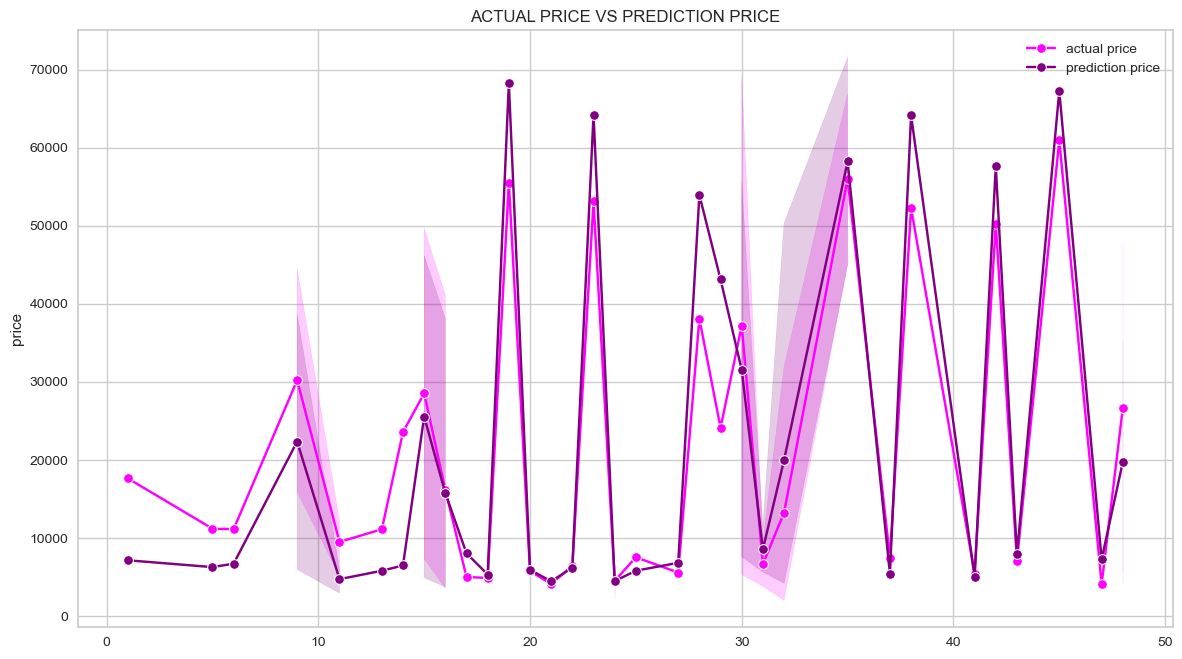

In [290]:
f, ax = plt.subplots(figsize=(12,6.75))

sns.lineplot(data=dm, y='actual_price', x='days_left', marker='o', color='magenta', label='actual price')
sns.lineplot(data=dm, y='prediction_price', x='days_left', marker='o', color='purple', label='prediction price')

plt.ylabel('price')
plt.xlabel('')
plt.title('ACTUAL PRICE VS PREDICTION PRICE')
plt.tight_layout()


# **ADDITIONAL**

## **MODEL ONLY ECONOMY**

In [146]:
dfModel_1 = data[data['class'] == 'Economy'].copy()
dfModel_1.drop(['Unnamed: 0','flight','class'], axis=1, inplace=True)
categoryColumns_1 = []
for x in dfModel_1.columns:
  if dfModel_1[x].dtype == 'object':
    dfModel_1[x] = dfModel_1[x].astype('category')
    categoryColumns_1.append(x)
dfModel_1 = dfPreprocessing1Func(dfModel_1, categoryColumns_1)
oneHotColumns_1 = []
labelColumns_1 = []
for x in categoryColumns_1:
  if x in ['stops', 'class']: labelColumns_1.append(x)
  else: oneHotColumns_1.append(x)
mappingLabel = [
  {
    'col': 'stops', 
    'mapping': {
      'zero': 0, 
      'one': 1, 
      'twoormore': 2
  }}]
dfModel_1 = ordinalEncoderFunc(dfModel_1, labelColumns_1, mappingLabel) 
dfModel_1 = oheFunc(dfModel_1, oneHotColumns_1)
dfModelAfterTuningRmOutliers_1 = dfModel_1[((dfModel_1.price > priceOutliers['lowerWhisker']) & (dfModel_1.price < priceOutliers['upperWhisker'])) &
                    ((dfModel_1.duration > durationOutliers['lowerWhisker']) & (dfModel_1.duration < durationOutliers['upperWhisker'])) &
                    ((dfModel_1.days_left > daysLeftOurliers['lowerWhisker']) & (dfModel_1.days_left < daysLeftOurliers['upperWhisker']))].reset_index(drop=True)

dfModelAfterTuningRmOutliersScaling_1 = dfModelAfterTuningRmOutliers_1.copy()
dfModelAfterTuningRmOutliersScaling_1.days_left = StandardScaler().fit_transform(dfModelAfterTuningRmOutliersScaling_1[['days_left']])
dfModelAfterTuningRmOutliersScaling_1.duration = MinMaxScaler().fit_transform(dfModelAfterTuningRmOutliersScaling_1[['duration']])

In [144]:
x_1 = dfModelAfterTuningRmOutliersScaling_1.drop(['price'], axis=1)
y_1 = dfModelAfterTuningRmOutliersScaling_1.price
x_train_1, x_test_1, y_train_1, y_test_1=train_test_split(x_1, y_1, test_size=testSize, random_state=randomState_)

model_1 = RandomForestRegressor(
  max_depth=max_depth,
  max_features=max_features,
  min_samples_leaf=min_samples_leaf,
  n_estimators=n_estimators,
  n_jobs=n_jobs,
  oob_score=oob_score,
  random_state=random_state
)

model_1.fit(x_train_1, y_train_1)

RandomForestRegressor(max_depth=60, max_features=30, min_samples_leaf=2,
                      n_estimators=600, n_jobs=-1, oob_score=True,
                      random_state=0)

In [147]:
bestModelScore_1 = modelEvaluation(x_train_1,x_test_1,y_train_1,y_test_1,randomForestHyperparameter)
bestModelScore_1

model         mae         rmse  r2_score
0  Random Forest  653.588579  1409.036172  0.855469

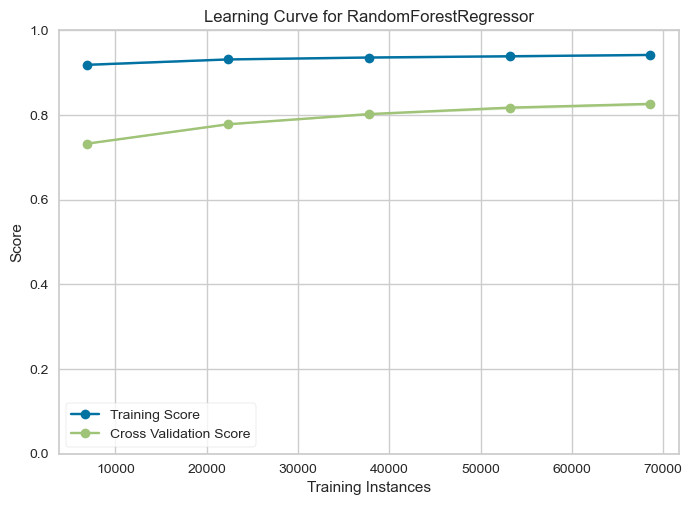

<AxesSubplot: title={'center': 'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [153]:
visualizer_1 = LearningCurve(
                model_1, 
                scoring='r2', 
                n_jobs=-1, 
                random_state=randomState_,
                cv=kFold(2))
visualizer_1.fit(x_train_1, y_train_1)        # Fit the data to the visualizer_1
visualizer_1.ax.set_ylim(0,1)
visualizer_1.show()

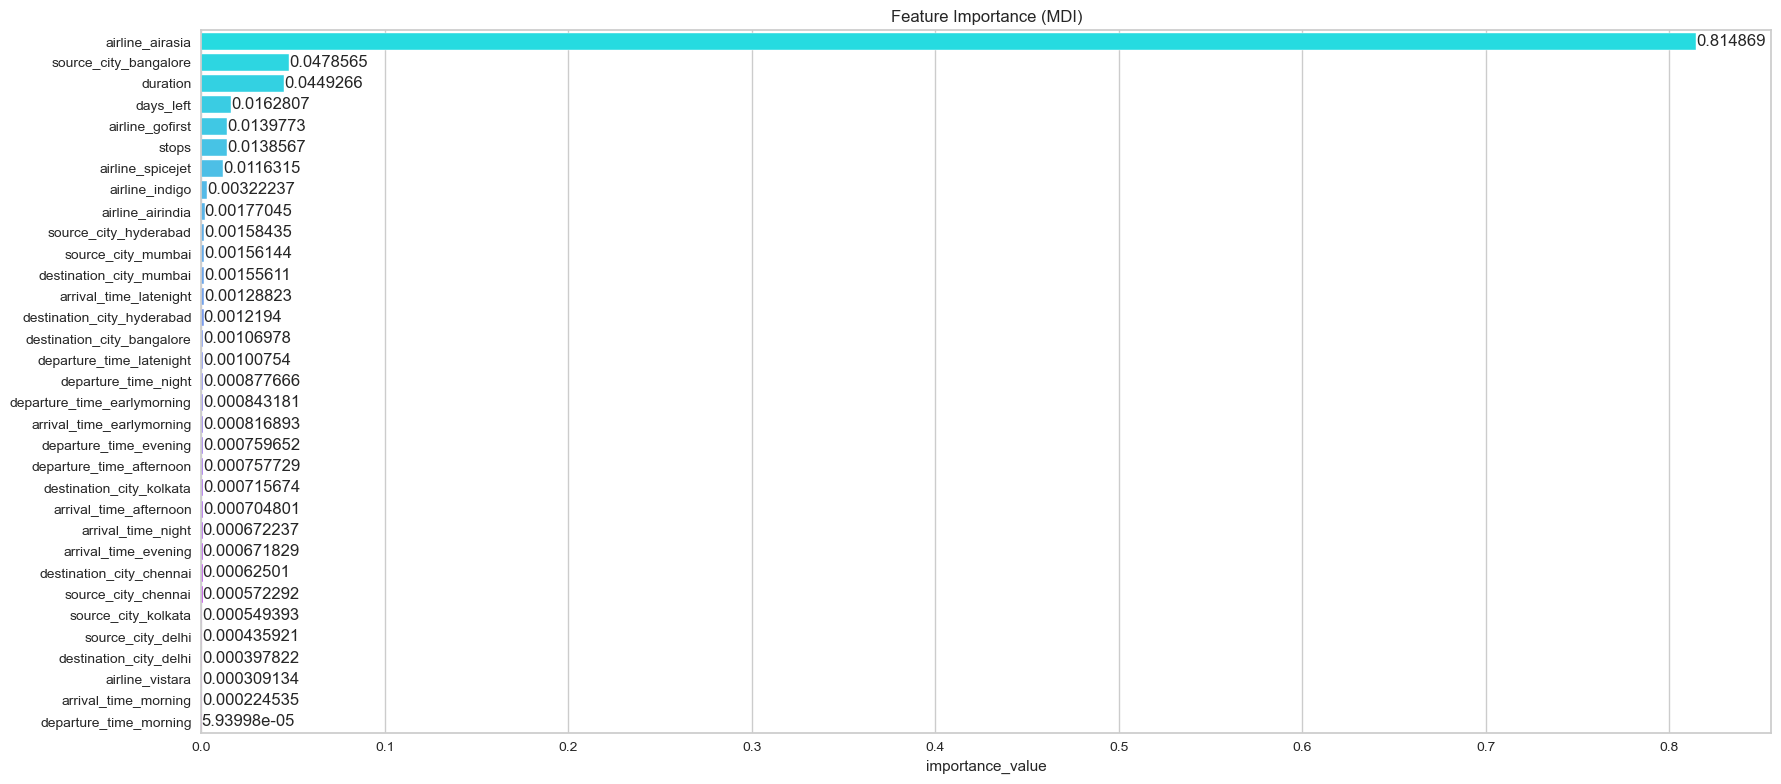

In [148]:
importanceIndex_1 = dfModelAfterTuningRmOutliersScaling_1.columns.to_list()
importanceIndex_1.remove('price')
importances_1 = model.feature_importances_
featureImportanceMDI_1 = pd.DataFrame(list(zip(importanceIndex_1, importances_1)), columns=['feature_name', 'importance_value'])

f, ax = plt.subplots(figsize=(18,8))

sns.barplot(y='feature_name', 
            x='importance_value', 
            data=featureImportanceMDI_1.sort_values('importance_value', ascending=False), 
            palette='cool')

ax.bar_label(ax.containers[0])
plt.title('Feature Importance (MDI)')
plt.ylabel('')
plt.tight_layout()

## **MODEL ONLY BUSINESS**

In [149]:
dfModel_2 = data[data['class'] == 'Business'].copy()
dfModel_2.drop(['Unnamed: 0','flight','class'], axis=1, inplace=True)
categoryColumns_2 = []
for x in dfModel_2.columns:
  if dfModel_2[x].dtype == 'object':
    dfModel_2[x] = dfModel_2[x].astype('category')
    categoryColumns_2.append(x)
dfModel_2 = dfPreprocessing1Func(dfModel_2, categoryColumns_2)
oneHotColumns_2 = []
labelColumns_2 = []
for x in categoryColumns_2:
  if x in ['stops', 'class']: labelColumns_2.append(x)
  else: oneHotColumns_2.append(x)
mappingLabel = [
  {
    'col': 'stops', 
    'mapping': {
      'zero': 0, 
      'one': 1, 
      'twoormore': 2
  }}]
dfModel_2 = ordinalEncoderFunc(dfModel_2, labelColumns_2, mappingLabel) 
dfModel_2 = oheFunc(dfModel_2, oneHotColumns_2)
dfModelAfterTuningRmOutliers_2 = dfModel_2[((dfModel_2.price > priceOutliers['lowerWhisker']) & (dfModel_2.price < priceOutliers['upperWhisker'])) &
                    ((dfModel_2.duration > durationOutliers['lowerWhisker']) & (dfModel_2.duration < durationOutliers['upperWhisker'])) &
                    ((dfModel_2.days_left > daysLeftOurliers['lowerWhisker']) & (dfModel_2.days_left < daysLeftOurliers['upperWhisker']))].reset_index(drop=True)

dfModelAfterTuningRmOutliersScaling_2 = dfModelAfterTuningRmOutliers_2.copy()
dfModelAfterTuningRmOutliersScaling_2.days_left = StandardScaler().fit_transform(dfModelAfterTuningRmOutliersScaling_2[['days_left']])
dfModelAfterTuningRmOutliersScaling_2.duration = MinMaxScaler().fit_transform(dfModelAfterTuningRmOutliersScaling_2[['duration']])
# dfModelAfterTuningRmOutliersScaling_2.to_csv(index=False, path_or_buf='./db/clean-data-scaling-remove-outliers.csv')

In [150]:
x_2 = dfModelAfterTuningRmOutliersScaling_2.drop(['price'], axis=1)
y_2 = dfModelAfterTuningRmOutliersScaling_2.price
x_train_2, x_test_2, y_train_2, y_test_2=train_test_split(x_2, y_2, test_size=testSize, random_state=randomState_)

model_2 = RandomForestRegressor(
  max_depth=max_depth,
  max_features=max_features,
  min_samples_leaf=min_samples_leaf,
  n_estimators=n_estimators,
  n_jobs=n_jobs,
  oob_score=oob_score,
  random_state=random_state
)

model_2.fit(x_train_2, y_train_2)

RandomForestRegressor(max_depth=60, max_features=30, min_samples_leaf=2,
                      n_estimators=600, n_jobs=-1, oob_score=True,
                      random_state=0)

In [151]:
bestModelScore_2 = modelEvaluation(x_train_2,x_test_2,y_train_2,y_test_2,randomForestHyperparameter)
bestModelScore_2

model          mae         rmse  r2_score
0  Random Forest  2093.597035  4248.368247  0.890168

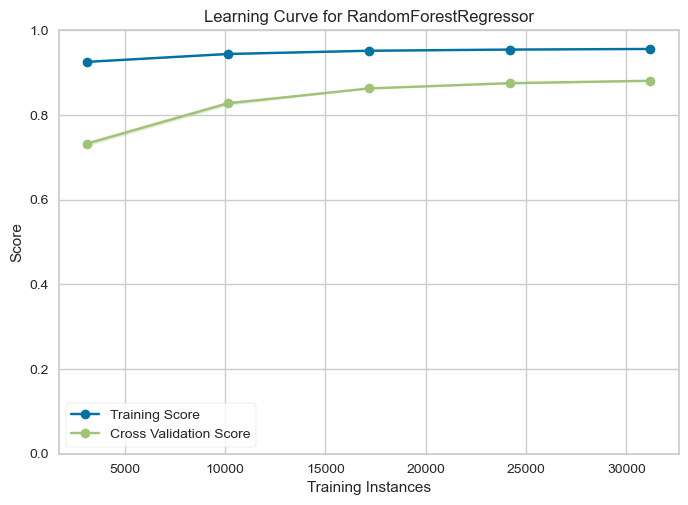

<AxesSubplot: title={'center': 'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [154]:
visualizer_2 = LearningCurve(
                model_2, 
                scoring='r2', 
                n_jobs=-1, 
                random_state=randomState_,
                cv=kFold(2))
visualizer_2.fit(x_train_2, y_train_2)        # Fit the data to the visualizer_2
visualizer_2.ax.set_ylim(0,1)
visualizer_2.show()

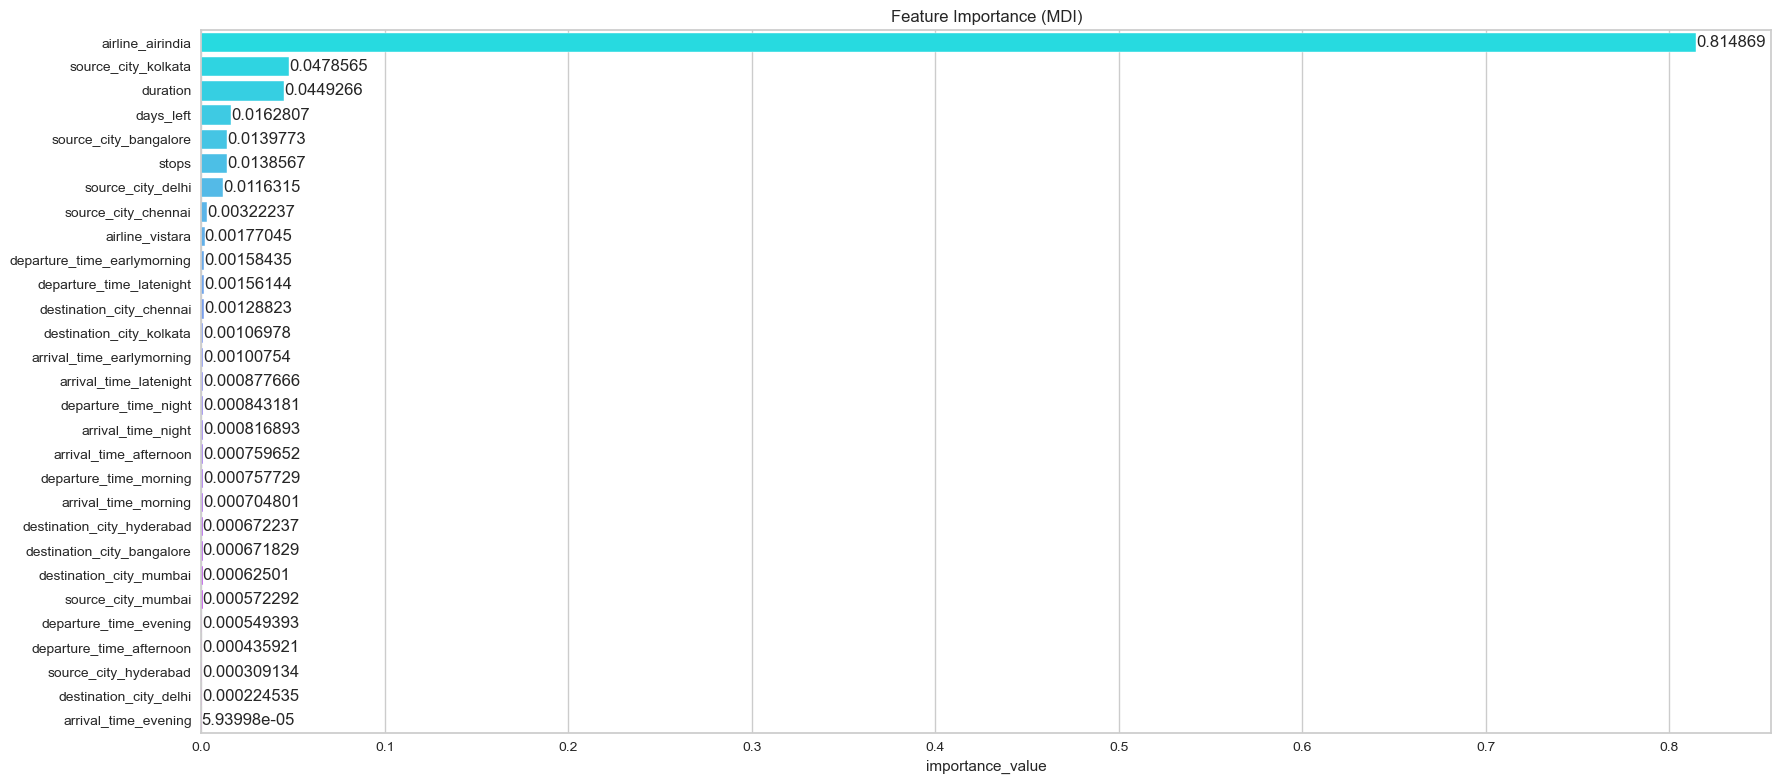

In [152]:
importanceIndex_2 = dfModelAfterTuningRmOutliersScaling_2.columns.to_list()
importanceIndex_2.remove('price')
importances_2 = model.feature_importances_
featureImportanceMDI_2 = pd.DataFrame(list(zip(importanceIndex_2, importances_2)), columns=['feature_name', 'importance_value'])

f, ax = plt.subplots(figsize=(18,8))

sns.barplot(y='feature_name', 
            x='importance_value', 
            data=featureImportanceMDI_2.sort_values('importance_value', ascending=False), 
            palette='cool')

ax.bar_label(ax.containers[0])
plt.title('Feature Importance (MDI)')
plt.ylabel('')
plt.tight_layout()